# MACHINE LEARNING - PRÁCTICA 1

Ignacio Ruiz Chicano, Juan Jesús Torralba Mateos, Ana Gil Molina

In [2]:
import os

ruta_agua = './Datasets/'

os.makedirs(ruta_agua, exist_ok=True)

In [4]:
!pip install scikit-multilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.1 MB/s eta 0:00:00


In [5]:
# Librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import seaborn as sns
import scipy.stats as stats
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, hamming_loss, make_scorer
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import learning_curve
from scipy import stats

In [6]:
# Establecemos una semilla
semilla = 123
np.random.seed(semilla)

In [7]:
import platform
import importlib.metadata as imp

print(f'Python Version == {platform.python_version()}')

paquetes =['matplotlib','numpy','pandas','seaborn','scikit-learn','scipy','xgboost','scikit-multilearn']
for paq in paquetes:
    print(f'{paq} == {imp.version(paq)}')

Python Version == 3.10.12
matplotlib == 3.8.0
numpy == 1.26.4
pandas == 2.2.2
seaborn == 0.13.2
scikit-learn == 1.5.2
scipy == 1.13.1
xgboost == 2.1.2
scikit-multilearn == 0.2.0


# Ejercicio Multi-Etiqueta



## Descripción del dataset

El dataset recoge datos sobre la calidad del agua en los ríos. Cada muestra incluye los valores medidos de dieciséis parámetros diferentes:

-  temperatura del agua (temp)
-  alcalinidad (pH)
-  conductividad eléctrica (conductividad)
-  oxígeno disuelto (O2)
-  saturación de oxígeno (o2sat)
-  concentración de CO2 (co2)
-  dureza del agua (dureza)
-  dinitrogeno(no2)
-  amoniaco (no3)
-  amonio (nh4)
-  otrofosfato(po4)
-  concentración de cloro (cl)
-  Cantidad de sílice (sio2)
-  Permanganato de Potasio (mno4)
-  dicromato de potasio (k2cr2o7)
-  demanda biológica de oxígeno (bod)

En cada muestra se identifican un total de 14 taxones que pueden estar presentes. Así cada muestra  tiene un valor multi-etiqueta que identifica la presencia (1) o ausencia de cada uno de los 14 taxones. Los taxones están enumerados del 1 al 14 (t1, .., t14).

 El objetivo de este dataset es clasificar partiendo de las variables de entrada e identificar qué taxones están o no presentes según las características de las muestra.

## Preprocesamiento

### Estudio inicial de los datos

In [8]:
# Cargamos los datos como un dataframe
agua = pd.read_csv(ruta_agua + 'agua.csv')

agua.head()

temp         pH  conductividad        o2     o2sat       co2    dureza  \
0  0.662303  23.722053       2.973241  5.343706  4.446809  0.000000  3.546433   
1  2.025867  23.722053       3.298439  4.100984  4.072903  0.155396  3.388814   
2  3.253074  23.421773       2.740956  3.645319  4.157477  0.699283  2.955361   
3  3.759541  24.022332       2.657334  3.231078  3.877047  0.000000  3.034170   
4  1.928469  23.121494       2.332136  4.515224  4.429004  0.699283  3.112980   

        no2       no3       nh4  ...  t5  t6  t7  t8  t9  t10  t11  t12  t13  \
0  0.403047  2.362222  0.232044  ...   0   1   1   0   1    1    1    1    1   
1  0.345469  2.178153  0.210949  ...   1   1   1   0   1    1    1    1    1   
2  0.460625  3.098499  0.097036  ...   1   0   1   0   1    1    1    0    1   
3  6.966957  1.932727  0.147664  ...   1   1   1   1   1    1    1    1    0   
4  0.633360  2.147475  0.189854  ...   0   1   0   0   1    0    0    1    0   

   t14  
0    1  
1    0  
2    1  
3    0  
4    1  

[5 rows x 30 columns]

In [ ]:
# Examinamos los tipos de las variables
agua.dtypes

temp             float64
pH               float64
conductividad    float64
o2               float64
o2sat            float64
co2              float64
dureza           float64
no2              float64
no3              float64
nh4              float64
po4              float64
cl               float64
sio2             float64
mno4             float64
k2cr2o7          float64
bod              float64
t1                 int64
t2                 int64
t3                 int64
t4                 int64
t5                 int64
t6                 int64
t7                 int64
t8                 int64
t9                 int64
t10                int64
t11                int64
t12                int64
t13                int64
t14                int64
dtype: object

No hay variables categóricas.

In [ ]:
# Para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Analizamos estadísticos
agua.describe()

temp           pH  conductividad           o2        o2sat  \
count  1060.000000  1060.000000    1060.000000  1060.000000  1060.000000   
mean      2.464376    24.170205       3.073956     4.370396     4.509492   
std       1.059541     0.966318       1.037480     1.045264     1.024500   
min       0.058438    21.019540       0.966303     0.041424     0.048964   
25%       1.636277    23.421773       2.406467     3.893863     4.141897   
50%       2.405717    24.322611       2.950012     4.473800     4.553639   
75%       3.233595    24.923169       3.560921     4.970889     4.976508   
max       5.356859    27.925961      12.422572     8.491936    10.580645   

               co2       dureza          no2          no3          nh4  \
count  1060.000000  1060.000000  1060.000000  1060.000000  1060.000000   
mean      0.397726     4.034421     0.463015     1.569769     0.265489   
std       1.009108     1.054268     0.957149     1.052141     0.872142   
min       0.000000     1.694407     0.000000     0.000000     0.012657   
25%       0.000000     3.349409     0.057578     0.920346     0.046409   
50%       0.000000     3.940481     0.172734     1.395858     0.084379   
75%       0.427340     4.689172     0.403047     2.055440     0.147664   
max       9.556867     9.930012     8.751880    18.805741    17.086844   

               po4           cl         sio2         mno4      k2cr2o7  \
count  1060.000000  1060.000000  1060.000000  1060.000000  1060.000000   
mean      0.294657     0.603969     1.223007     0.581876     0.544428   
std       0.743339     0.643723     0.956059     0.875774     0.750472   
min       0.000000     0.062108     0.069305     0.013513     0.062164   
25%       0.042102     0.238080     0.554441     0.256748     0.205618   
50%       0.105256     0.372647     0.970272     0.351339     0.349073   
75%       0.273665     0.745294     1.559366     0.624978     0.635982   
max      12.314930     6.562724     6.618643    19.107427    14.967098   

               bod           t1           t2           t3           t4  \
count  1060.000000  1060.000000  1060.000000  1060.000000  1060.000000   
mean      0.349620     0.430189     0.266981     0.287736     0.205660   
std       0.544120     0.495336     0.442591     0.452921     0.404374   
min       0.017704     0.000000     0.000000     0.000000     0.000000   
25%       0.115076     0.000000     0.000000     0.000000     0.000000   
50%       0.185892     0.000000     0.000000     0.000000     0.000000   
75%       0.354079     1.000000     1.000000     1.000000     0.000000   
max       7.081589     1.000000     1.000000     1.000000     1.000000   

                t5           t6          t7           t8           t9  \
count  1060.000000  1060.000000  1060.00000  1060.000000  1060.000000   
mean      0.471698     0.558491     0.24717     0.282075     0.584906   
std       0.499434     0.496801     0.43157     0.450222     0.492971   
min       0.000000     0.000000     0.00000     0.000000     0.000000   
25%       0.000000     0.000000     0.00000     0.000000     0.000000   
50%       0.000000     1.000000     0.00000     0.000000     1.000000   
75%       1.000000     1.000000     0.00000     1.000000     1.000000   
max       1.000000     1.000000     1.00000     1.000000     1.000000   

               t10          t11          t12          t13          t14  
count  1060.000000  1060.000000  1060.000000  1060.000000  1060.000000  
mean      0.323585     0.438679     0.315094     0.366981     0.293396  
std       0.468065     0.496460     0.464773     0.482209     0.455533  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       1.000000     1.000000     1.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [ ]:
# Verificamos si hay valores missing en cada columna
agua.isnull().sum()

temp             0
pH               0
conductividad    0
o2               0
o2sat            0
co2              0
dureza           0
no2              0
no3              0
nh4              0
po4              0
cl               0
sio2             0
mno4             0
k2cr2o7          0
bod              0
t1               0
t2               0
t3               0
t4               0
t5               0
t6               0
t7               0
t8               0
t9               0
t10              0
t11              0
t12              0
t13              0
t14              0
dtype: int64

No hay valores missing.

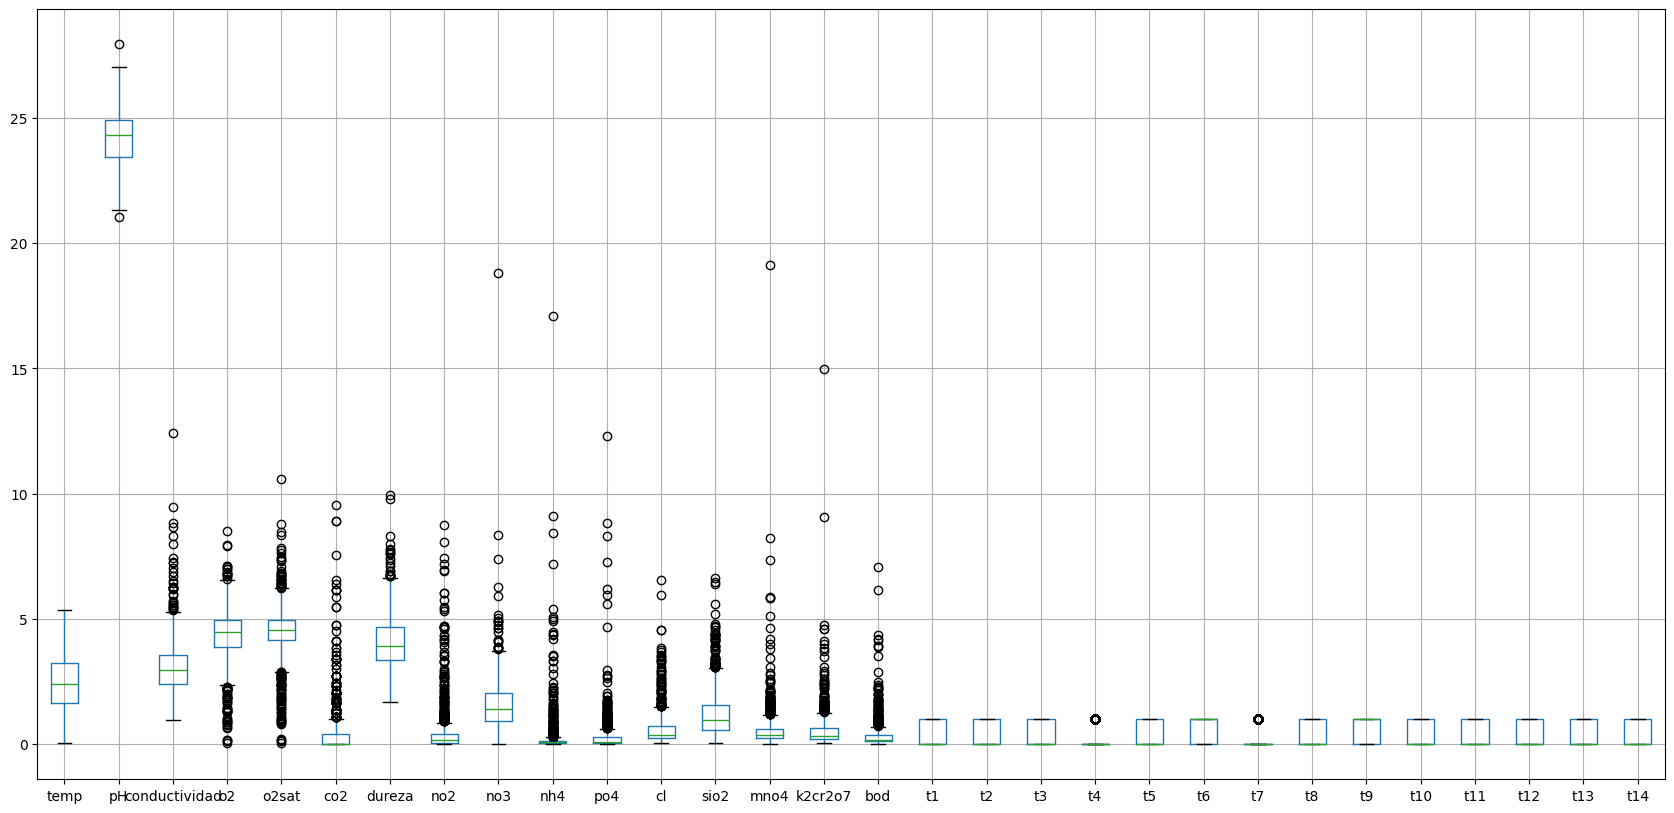

In [ ]:
# Mostramos un boxplot
plt.figure(figsize=(21, 10))
agua.boxplot()
plt.show()

Algunas conclusiones que se pueden deducir del boxplot son:

- Muchos de los parámetros presentan una cantidad considerable de outliers.
- Algunos parámetros tienen rangos muy diferentes entre sí, lo cual sugiere la necesidad de normalizar los datos.

Como hay muchos outliers, no vamos a eliminarlos todos porque podrían representar información importante a tener en cuenta. Sin embargo, sí vamos a eliminar aquellos outliers que toman valores demasiado extremos y alejados del resto, ya que podrían ser errores de medición.

In [ ]:
z_scores = np.abs(stats.zscore(agua))
outliers = (z_scores > 7)  # Un valor Z-score mayor a 7 es considerado outlier

# Mostrar los índices de outliers
outlier_indices = np.where(outliers.any(axis=1))[0]
print(f"Número de outliers detectados: {len(outlier_indices)}")

# Opcional: Eliminar outliers
agua = agua.drop(agua.index[outlier_indices])

Número de outliers detectados: 21


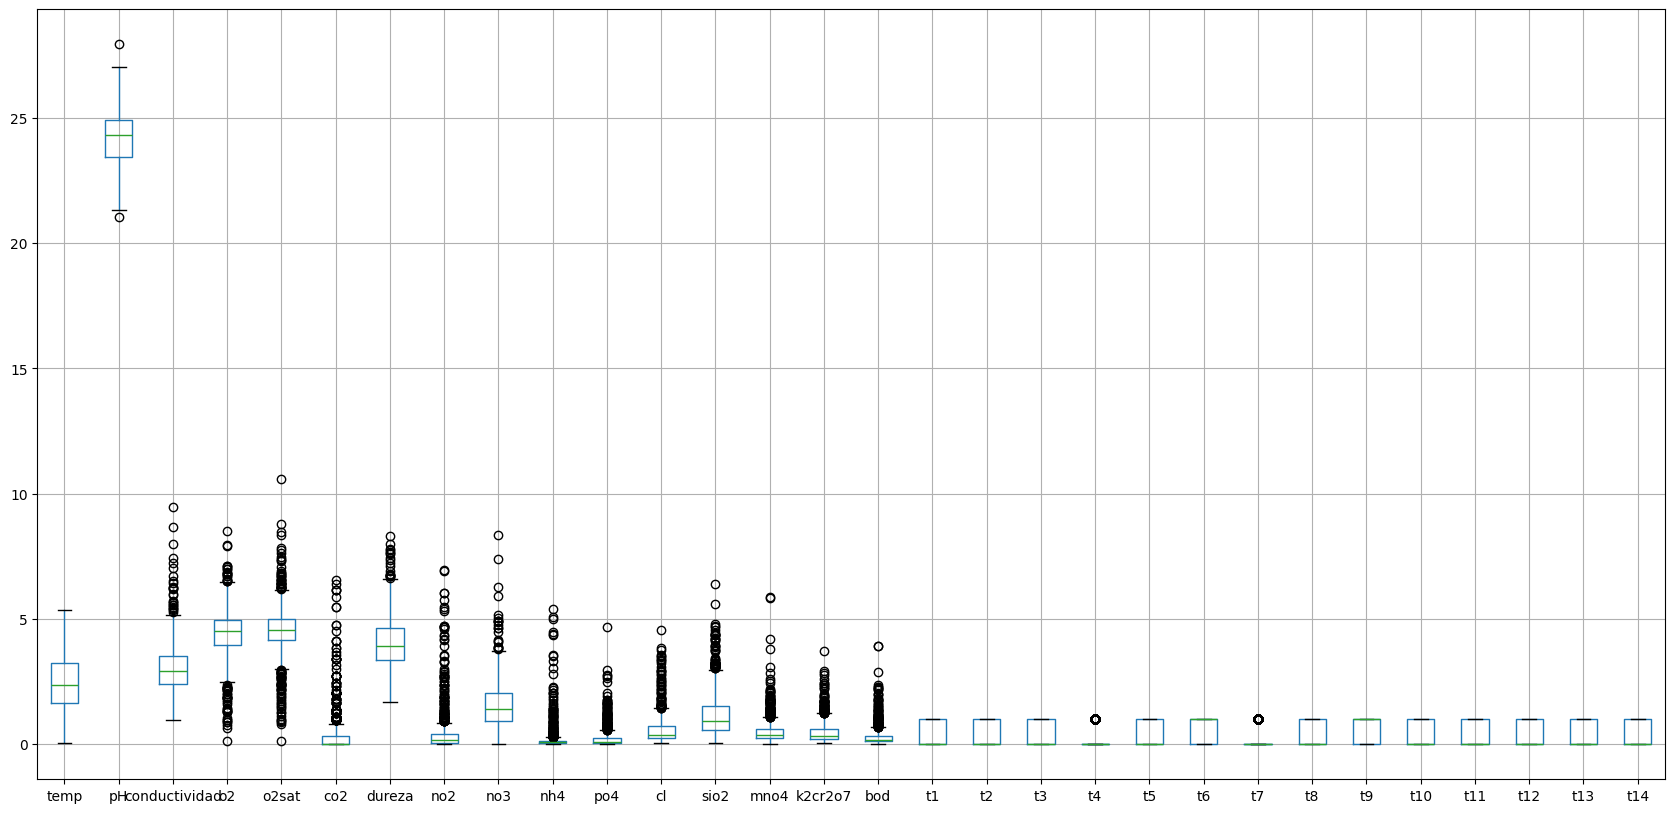

In [ ]:
# Mostramos un boxplot
plt.figure(figsize=(21, 10))
agua.boxplot()
plt.show()

Separamos los datos en el conjunto de entrenamiento y de test:

In [ ]:
# Tanto X como Y son matrices de datos
X = agua.drop(columns=['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14'])
Y = agua[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14']]

# Separamos en train y test
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, train_size=0.8, random_state=semilla)

In [ ]:
# Vemos si los datos están desbalanceados
for col in Y_train.columns:
    print(col, "->", Counter(Y_train[col]))

t1 -> Counter({0: 474, 1: 357})
t2 -> Counter({0: 600, 1: 231})
t3 -> Counter({0: 588, 1: 243})
t4 -> Counter({0: 665, 1: 166})
t5 -> Counter({0: 438, 1: 393})
t6 -> Counter({1: 453, 0: 378})
t7 -> Counter({0: 621, 1: 210})
t8 -> Counter({0: 605, 1: 226})
t9 -> Counter({1: 498, 0: 333})
t10 -> Counter({0: 551, 1: 280})
t11 -> Counter({0: 460, 1: 371})
t12 -> Counter({0: 564, 1: 267})
t13 -> Counter({0: 523, 1: 308})
t14 -> Counter({0: 589, 1: 242})


Hay cierto desbalanceo en las clases, pero no es lo suficientemente extremo, por lo que vamos a entrenar y evaluar los modelos sin aplicar técnicas de balanceo.

A la hora de evaluar el modelo, aplicaremos la métrica F1-score para asegurar que el desbalanceo no afecte los resultados, ya que es una métrica adecuada para conjuntos de datos con clases desbalanceadas.

### Normalización

In [ ]:
# Instanciamos el escalador
scaler = StandardScaler()

# Ajustamos el escalador con los datos de entrenamiento y los escalamos
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Aplicamos la misma transformación al conjunto de test
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Selección de características

Como vamos a probar muchos modelos diferentes, vamos a probar una seleccin de características basada en filtros, ya que es independiente del modelo y es más generalizable a cualquier modelo. Como estamos en el caso de un problema multi-label, el método `SelectKBest` no se puede aplicar directamente, por lo que debemos adaptarlo para multi-label dividiendo el problema en subproblemas para cada etiqueta. Esto implica calcular las puntuaciones de cada característica por separado para cada etiqueta y luego combinar las puntuaciones (por ejemplo, sacando la media) para seleccionar las características más relevantes en general.

In [ ]:
# Creamos una lista para almacenar los scores de cada etiqueta
scores_list = []

# Iteramos sobre cada etiqueta de Y_train
for label in Y_train.columns:
    # Selección de características para la etiqueta actual
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X_train_scaled, Y_train[label])
    scores_list.append(selector.scores_)

# Promediamos las puntuaciones de todas las etiquetas
average_scores = np.mean(scores_list, axis=0)

# Creamos un DataFrame con las puntuaciones promediadas
features_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Score": average_scores
}).sort_values(by="Score", ascending=False)

print(features_df)

# Filtramos por umbral
threshold = 5  # Puntuación mínima aceptable
selected_features = features_df[features_df["Score"] > threshold]["Feature"]

# Creamos nuevos conjuntos de datos con las características seleccionadas
# X_train_scaled = X_train_scaled[selected_features]
# X_test_scaled = X_test_scaled[selected_features]

          Feature      Score
14        k2cr2o7  39.424869
11             cl  31.391470
13           mno4  30.372421
15            bod  29.907684
10            po4  26.070853
0            temp  22.040516
2   conductividad  21.292467
8             no3  17.636382
9             nh4  17.282680
12           sio2  16.487474
6          dureza  16.346124
3              o2  15.522078
7             no2  15.433229
1              pH  13.141960
4           o2sat  10.837637
5             co2   9.003439


Como se puede observar, todas las características son considerablemente importantes, por lo que finalmente no eliminamos ninguna característica. De hecho, se puede comprobar (tomando un threshold mayor) que si se elimina alguna característica, el rendimiento de los modelos empeora.

## Modelos

En esta sección, vamos a aplicar diferentes modelos de clasificación a los datos. Para cada modelo, seguiremos el siguiente procedimiento:

1. Entrenamiento y evaluación del modelo con Hold-out, dividiendo en train y test (para tener una idea rápida del rendimiento básico).

A continuación, para los modelos que den mejores resultados al aplicar Hold-out, aplicaremos el siguiente paso:

2. Aplicar validación cruzada para medir la variabilidad del modelo y ver si los resultados son estables.

Recordemos que existen dos enfoques para clasificación multi-etiqueta:

- Transformación: Transforman el problema en varios problemas de clasificación multiclase.
- Adaptación: Adaptan algoritmos para trabajar con conjuntos de clases.

### Algortimos adaptados a multi-etiqueta

Hya técnicas de las ya conocidas que permiten trabajar directamente con multi-etiqueta estableciendo ciertos parámetros. Algunas de estas técnicas son:

-    tree.DecisionTreeClassifier
-    tree.ExtraTreeClassifier
-    ensemble.ExtraTreesClassifier
-    neighbors.KNeighborsClassifier
-    neural_network.MLPClassifier
-    ensemble.RandomForestClassifier
-    linear_model.RidgeClassifierCV

#### DecisionTreeClassifier

Para buscar los parámetros óptimos de este modelo, usamos `GridSearchCV`, que realiza una búsqueda exhaustiva probando todas las combinaciones posibles entre los parámetros indicados. Los rangos de los parámetros los definimos con cuidado para evitar el overfitting, por ejemplo, tomando que la profundidad máxima del árbol posible no sea demasiado elevada.

In [ ]:
# Definimos los rangos de los parámetros
param_grid = {
    "max_depth": [2, 3],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [2, 3, 4]
}

# Definimos el modelo base
modelo = DecisionTreeClassifier(random_state = semilla, criterion = 'entropy')

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos GridSearchCV
grid_cv = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1
)

# Realizamos la búsqueda
grid_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = grid_cv.best_estimator_
print("Best parameters:", grid_cv.best_params_)
print("Best score:", grid_cv.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: -0.31724983767404946


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.302
Hamming Loss test:  0.31


El Hamming Loss es mejor cuanto más bajo sea. En este caso, los valores de Hamming Loss son relativamente bajos. Además, no hay una gran diferencia entre los valores de Hamming Loss en el conjunto de entrenamiento y en el conjunto de prueba, lo cual sugiere que no hay un gran overfitting, y que el modelo generaliza relativamente bien a nuevos datos.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.015643802647412757
Score test: 0.004807692307692308


Los valores obtenidos para el score son muy bajos. Esta métrica, en el contexto de clasificación multi-etiqueta, se refiere al global accuracy, que mide cuán bien el modelo predice las etiquetas correctas para cada ejemplo. Esta se define como:

$$ Acc=\frac{1}{N}\sum_{i=1}^N \delta(c_i', c_i)$$

donde $c_i$ es el vector d-dimensional de las clases y $\delta(c_i', c_i) = 1$ si $c_i' = c_i$ y  $\delta(c_i', c_i) = 0$ en otro caso.

Es una métrica muy estricta, ya que requiere que todas las etiquetas sean correctas para cada muestra. Por lo tanto, el modelo parece estar prediciendo incorrectamente al menos alguna de las etiquetas en cada ejemplo.

Por esta razón, usamos el mean accuracy, que es una métrica más adecuada para problemas multi-label, y se define para $d$ clases como:


$$ Acc_d= \frac{1}{d}\sum_{j=1}^d  \frac{1}{N}\sum_{i=1}^N \delta(c_{ij}', c_{ij})$$

donde $\delta(c_{ij}', c_{ij}) = 1$ si $c_{ij}' = c_{ij}$ y  $\delta(c_{ij}', c_{ij}) = 0$ en otro caso.

In [ ]:
def mean_accuracy(y_true, y_pred):
    correct_per_sample = np.sum(y_true == y_pred, axis=1)
    mean_acc = np.mean(correct_per_sample / y_true.shape[1])
    return mean_acc

In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.698384046759498
Mean accuracy test: 0.6902472527472526


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.534
F1-score (macro): 0.396
F1-score (weighted): 0.454
F1-score (samples): 0.511

Test set F1-scores:
F1-score (micro): 0.521
F1-score (macro): 0.366
F1-score (weighted): 0.436
F1-score (samples): 0.490


Aunque no hay una gran diferencia entre los valores de F1-score en el conjunto de entrenamiento y el de prueba, sí hay una ligera caída, lo que suigiere que puede haber un ligero overfitting, y no generaliza perfectamente en el conjunto de prueba.

El valor bajo en el F1-score macro indica que el modelo tiene problemas clasificando algunas etiquetas de manera precisa. En particular, parece que algunas de las etiquetas más difíciles o menos representadas podrían estar afectando negativamente el rendimiento.

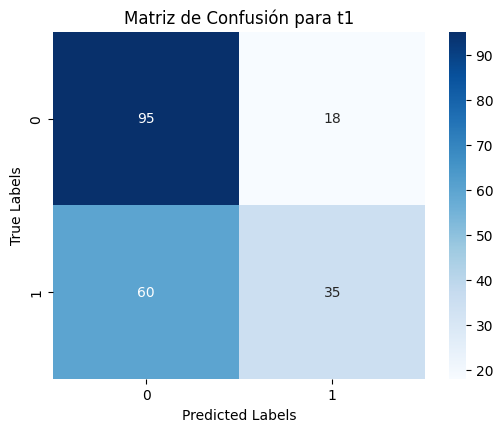

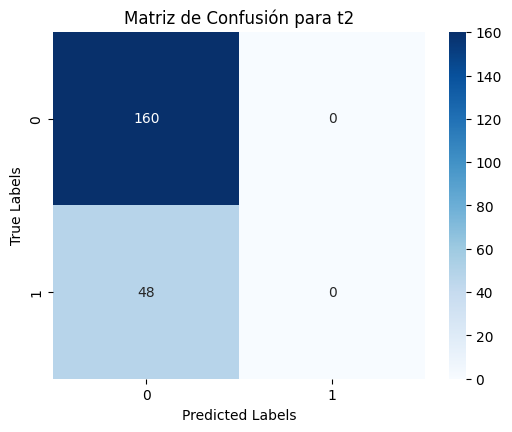

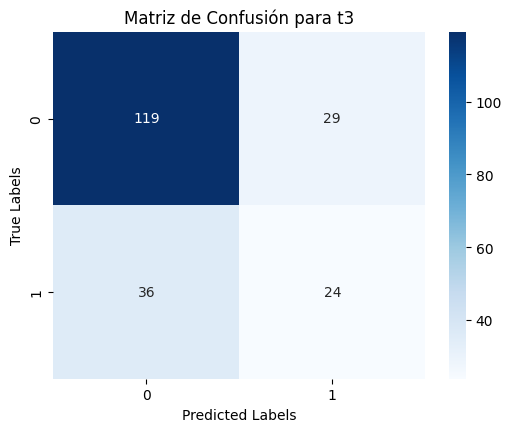

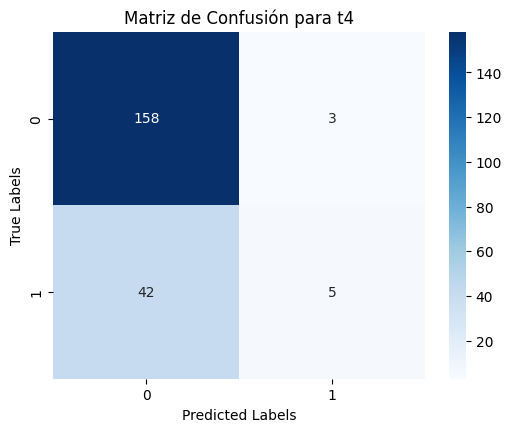

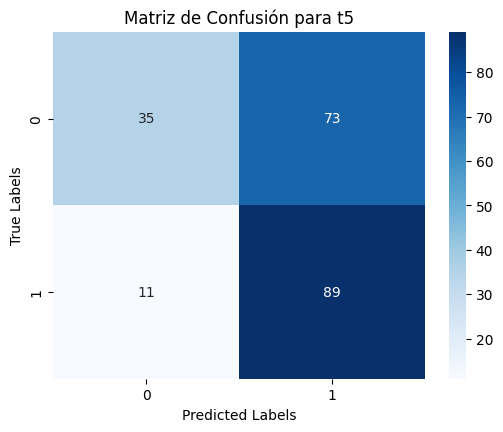

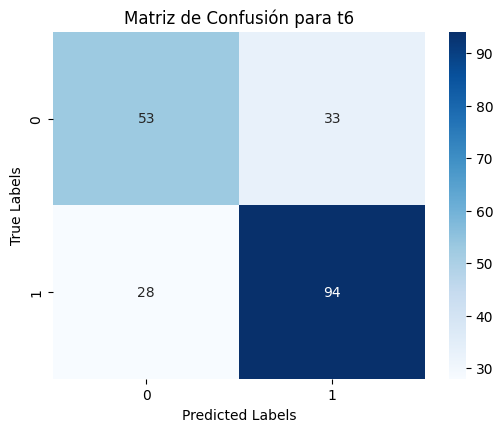

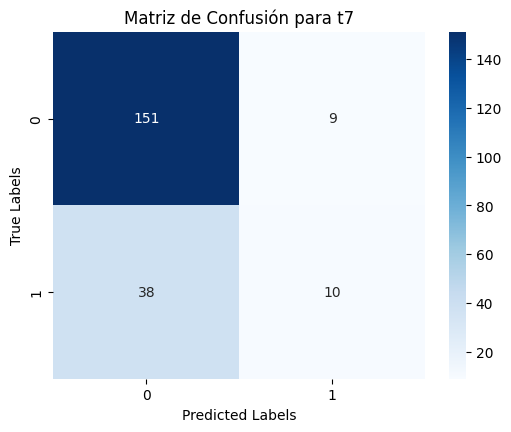

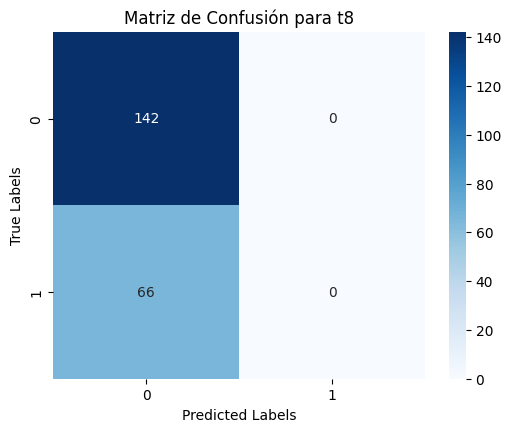

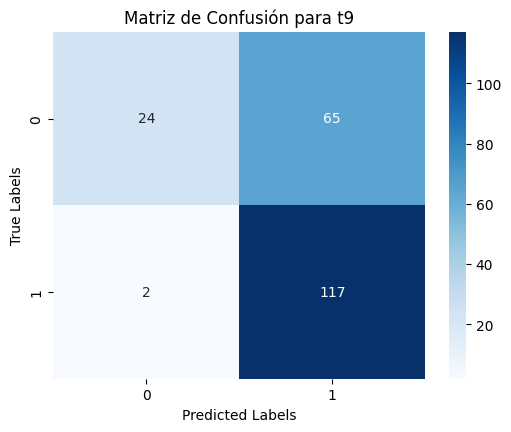

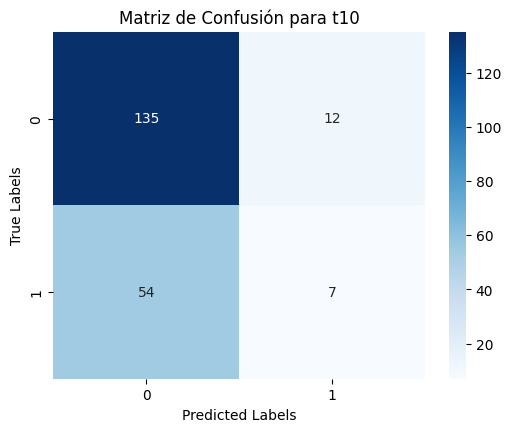

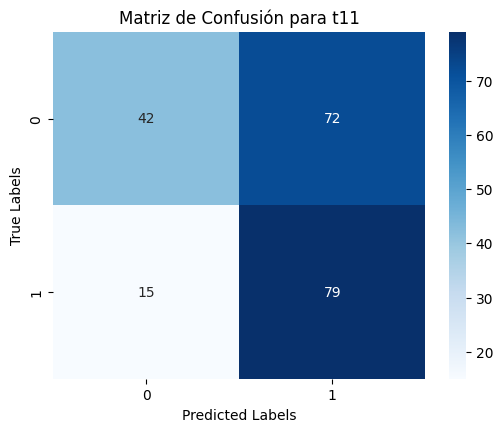

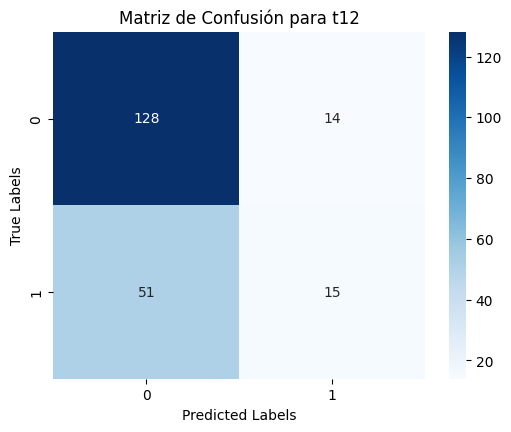

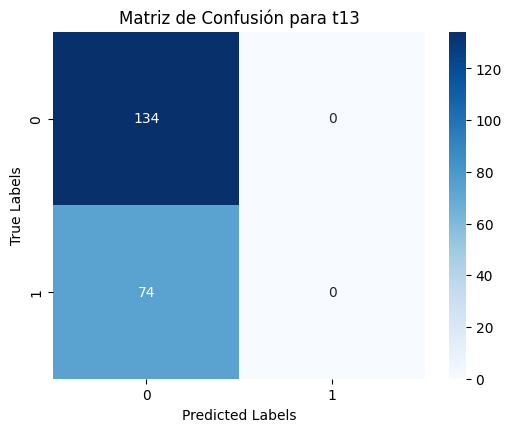

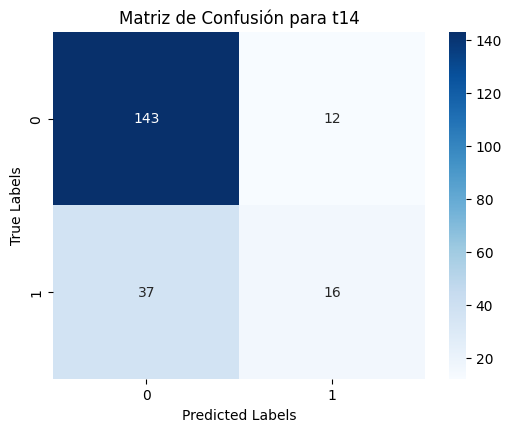

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

Observando las matrices de confusión, se aprecia que en la mayoría de los casos, una de las clases se predice mucho mejor que la otra. Esto podría deberse al leve desbalanceo de las clases. Por ello, vamos a probar a aplicar de nuevo el modelo `DecisionTreeClassifier`, pero esta vez vamos a añadirle el parámetro `class_weight = 'balanced'`, que ayuda a manejar desequilibrios en problemas de clasificación, ajustando unos pesos automáticamente basándose en las frecuencias de clase en los datos de entrada.

In [ ]:
# Definimos los rangos de los parámetros
param_grid = {
    "max_depth": [3, 5],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [4, 5]
}

# Definimos el modelo base
modelo = DecisionTreeClassifier(random_state = semilla, criterion = 'entropy', class_weight = 'balanced')

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos GridSearchCV
grid_cv = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1
)

# Realizamos la búsqueda
grid_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = grid_cv.best_estimator_
print("Best parameters:", grid_cv.best_params_)
print("Best score:", grid_cv.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: -0.42452461685922477


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.385
Hamming Loss test:  0.417


In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.024067388688327317
Score test: 0.0


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.6150936909059652
Mean accuracy test: 0.5831043956043955


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.588
F1-score (macro): 0.572
F1-score (weighted): 0.601
F1-score (samples): 0.559

Test set F1-scores:
F1-score (micro): 0.560
F1-score (macro): 0.542
F1-score (weighted): 0.578
F1-score (samples): 0.522


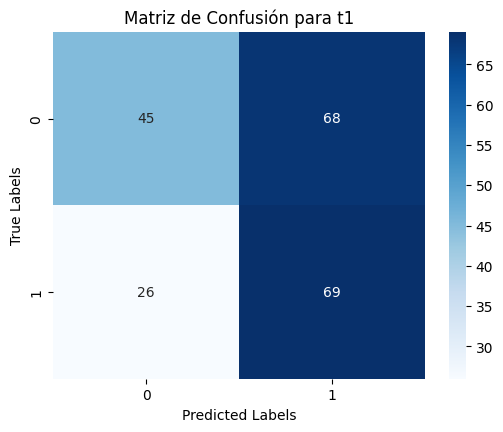

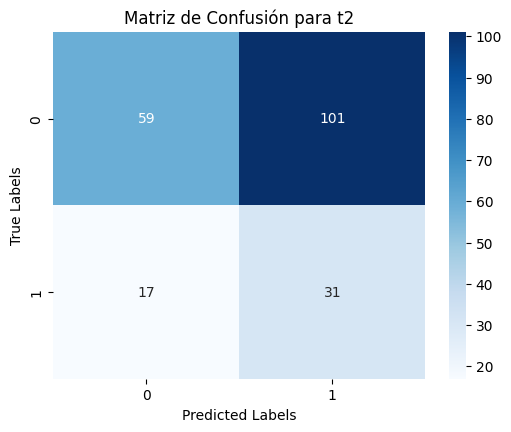

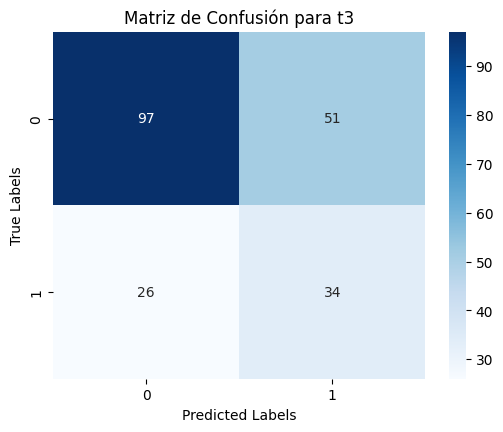

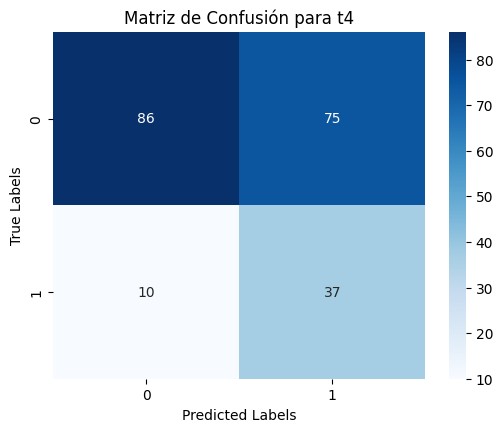

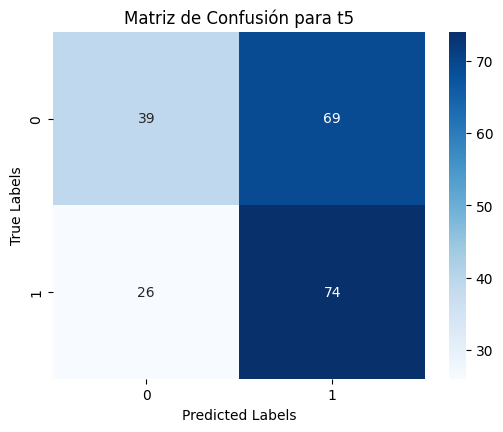

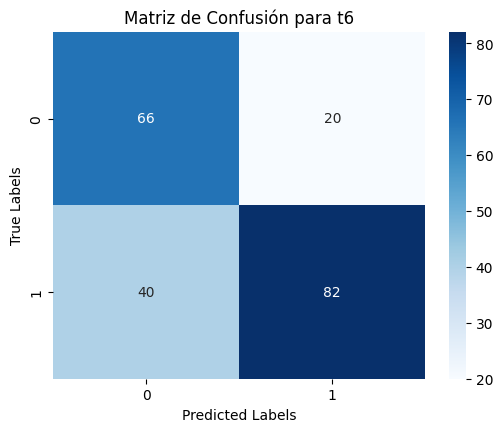

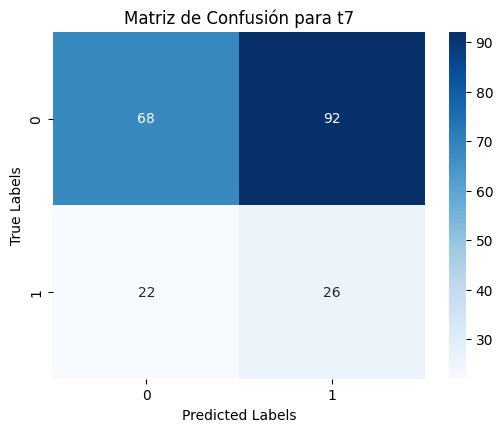

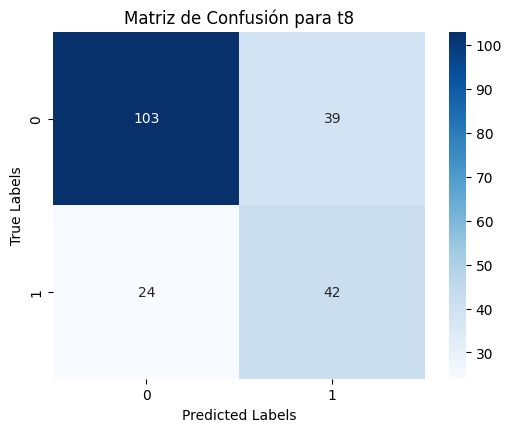

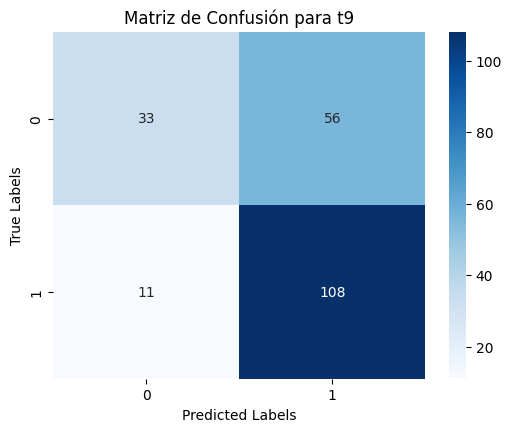

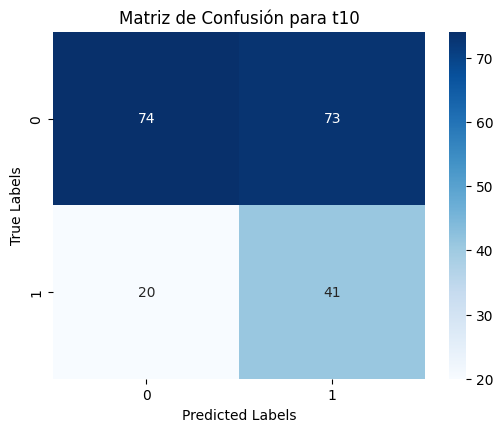

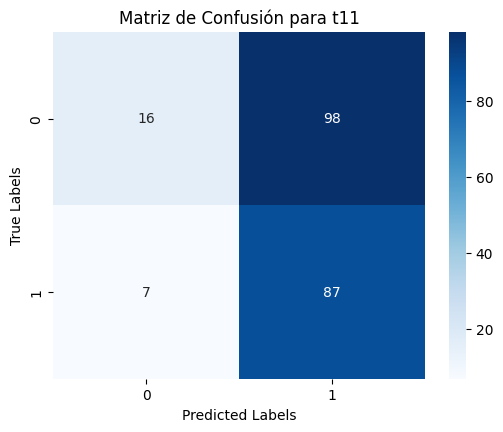

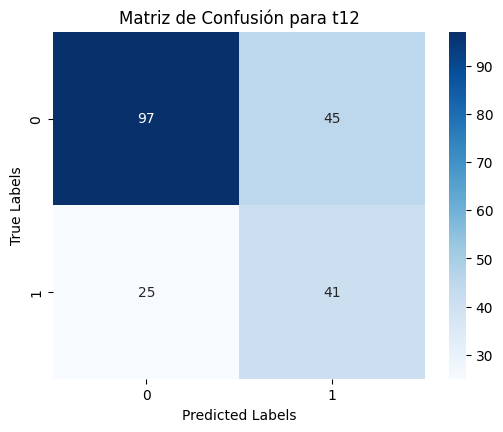

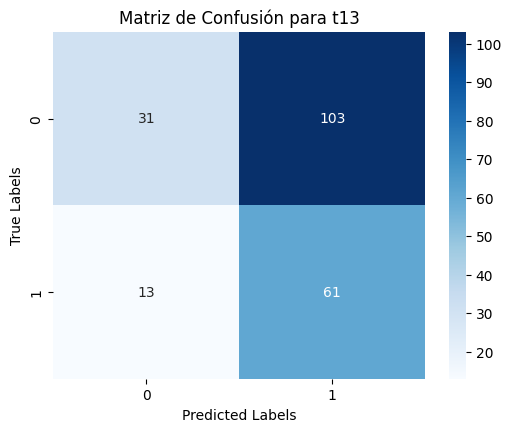

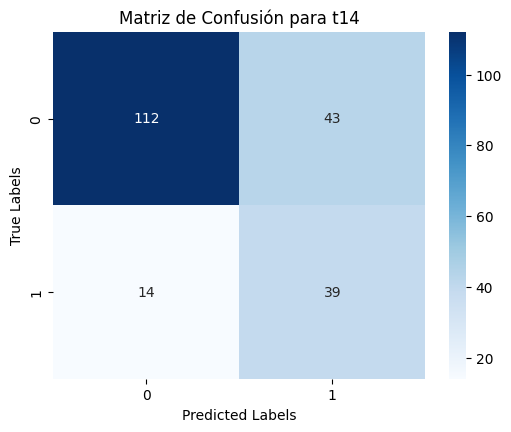

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

Al utilizar el parámetro `class_weight = 'balanced'`, las predicciones están algo más balanceadas para ambas clases, aunque los resultados siguen siendo mejorables.

#### ExtraTreeClassifier

Este modelo es un árbol de decisión entrenado de forma aleatoria, lo que lo hace más rápido y menos propenso al overfitting en comparación con otros árboles de decisión tradicionales. De nuevo, para buscar los parámetros óptimos de este modelo, usamos `GridSearchCV`, que realiza una búsqueda exhaustiva probando todas las combinaciones posibles entre los parámetros indicados.

In [ ]:
# Definimos los rangos de los parámetros
param_grid = {
    "max_depth": [2, 3, 4],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [2, 3, 5]
}

# Definimos el modelo base
modelo = ExtraTreeClassifier(random_state = semilla)

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos GridSearchCV
grid_cv = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1
)

# Realizamos la búsqueda
grid_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = grid_cv.best_estimator_
print("Best parameters:", grid_cv.best_params_)
print("Best score:", grid_cv.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: -0.32549960320323207


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.322
Hamming Loss test:  0.323


En este caso, los valores de Hamming Loss son relativamente bajos. Además, no hay a penas diferencia entre los valores de Hamming Loss en el conjunto de entrenamiento y en el conjunto de prueba, lo cual sugiere que no se está sobreajustando, y que el modelo generaliza bien a los datos no vistos. Es decir, que se disminuye el overfitting con respecto al modelo anterior.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.0048134777376654635
Score test: 0.02403846153846154


De nuevo, los valores del score son muy bajos. Esta es una métrica muy estricta, ya que requiere que todas las etiquetas sean correctas para cada muestra. Por lo tanto, el modelo parece estar prediciendo incorrectamente al menos alguna de las etiquetas en cada ejemplo.

In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.678012721334021
Mean accuracy test: 0.676510989010989


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.415
F1-score (macro): 0.254
F1-score (weighted): 0.321
F1-score (samples): 0.361

Test set F1-scores:
F1-score (micro): 0.419
F1-score (macro): 0.232
F1-score (weighted): 0.315
F1-score (samples): 0.373


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Los resultados obtenidos para el `ExtraTreeClassifier` muestran un rendimiento ligeramente inferior en comparación con el `DecisionTreeClassifier` en términos de F1-score. Los valores de F1-score tanto para el conjunto de entrenamiento como para el de prueba son más bajos.

Aunque los F1-scores del `ExtraTreeClassifier` son más bajos, se puede observar que hay una muy pequeña diferencia entre los scores de entrenamiento y prueba, lo que sugiere una menor tendencia a overfitting en comparación con el `DecisionTreeClassifier`.

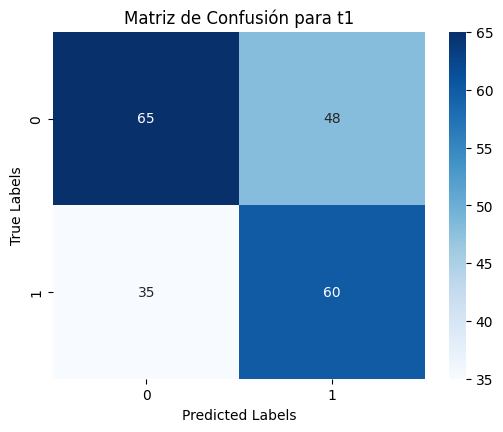

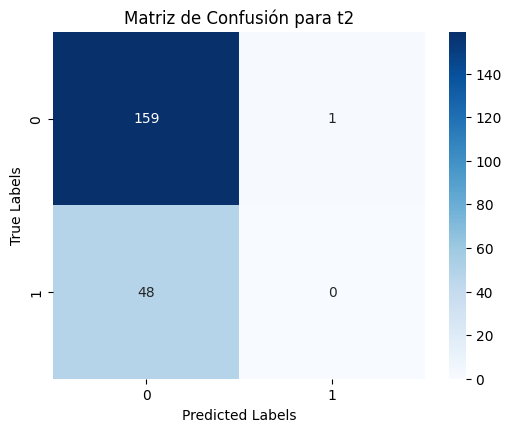

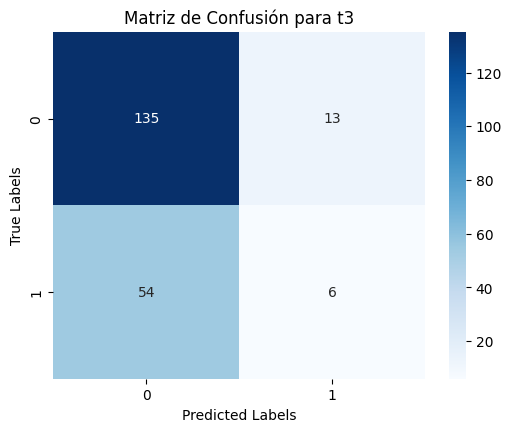

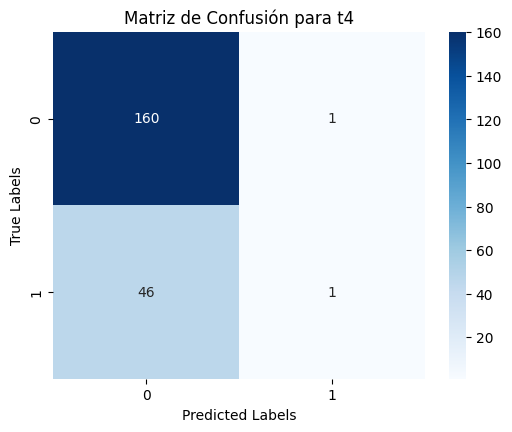

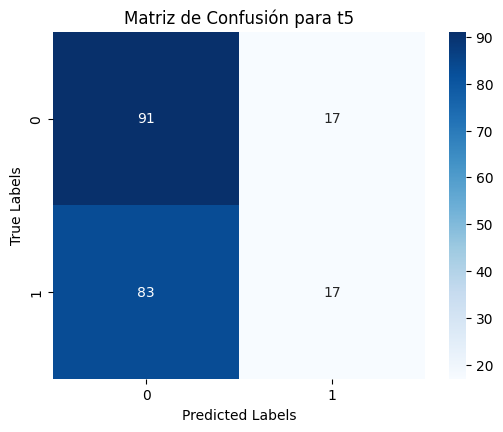

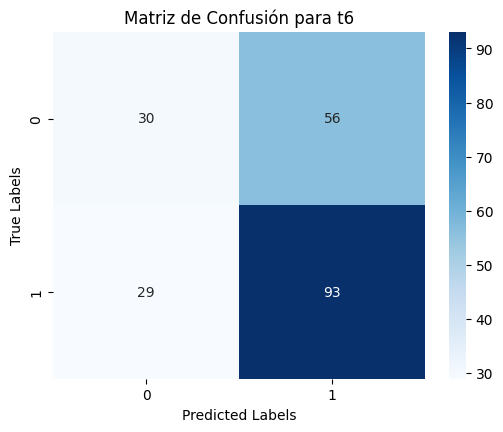

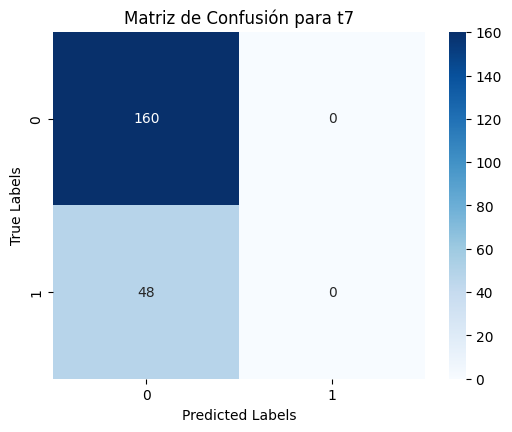

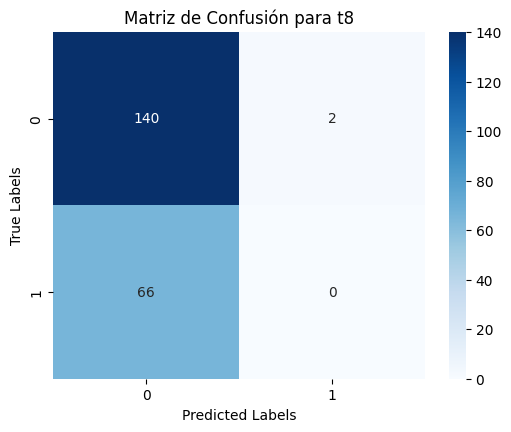

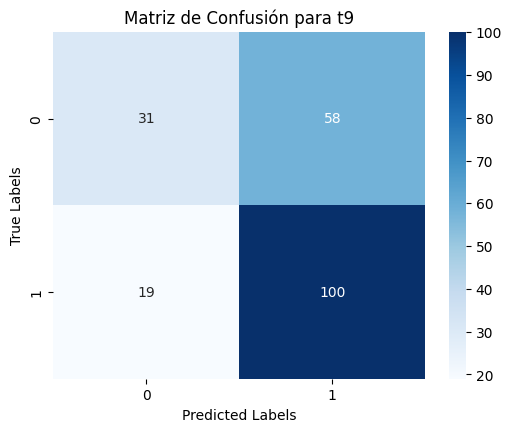

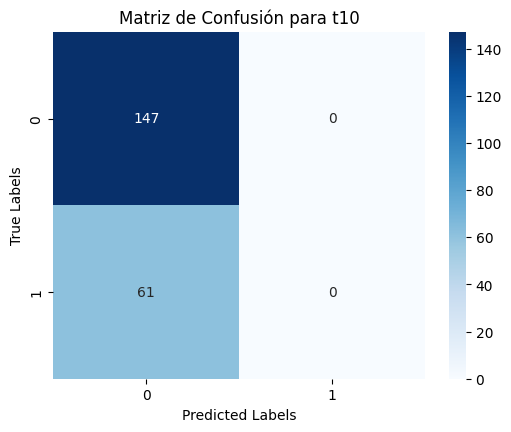

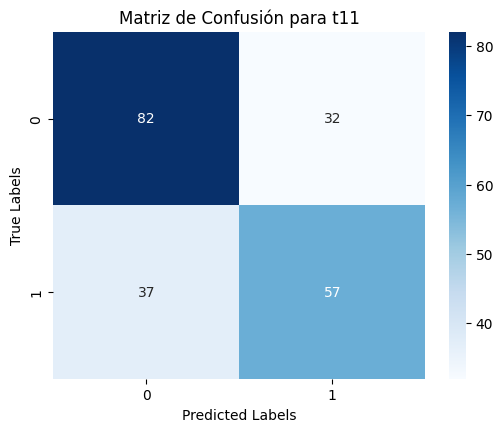

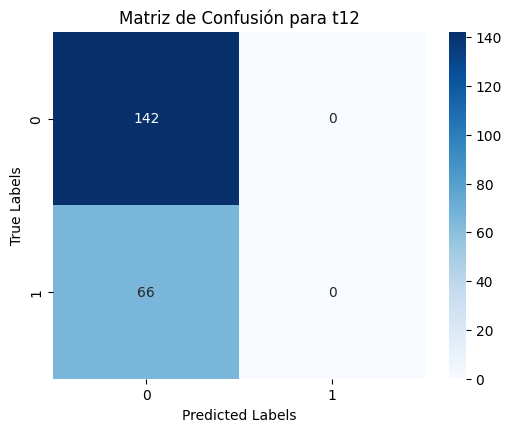

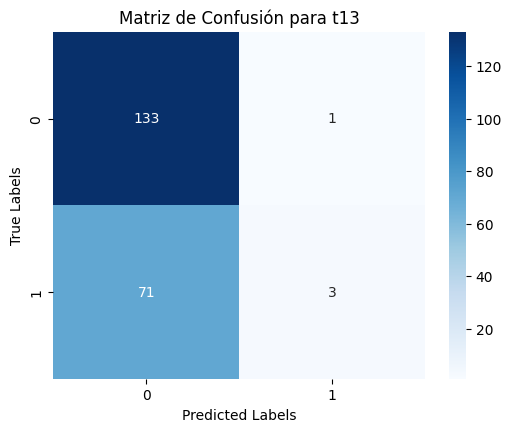

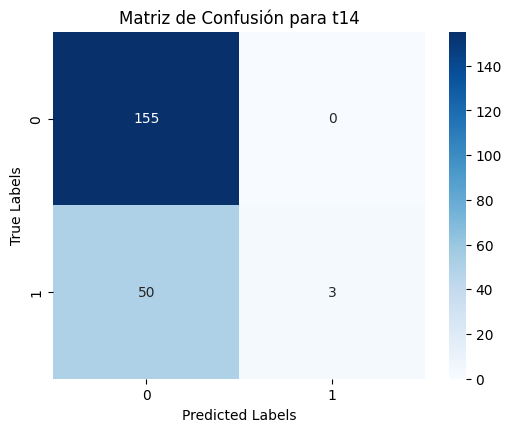

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

De nuevo, observando las matrices de confusión, se aprecia que en la mayoría de los casos, una de las clases se predice mucho mejor que la otra. Esto podría deberse al leve desbalanceo de las clases. Por ello, vamos a probar a aplicar de nuevo el modelo `ExtraTreeClassifier`, pero esta vez vamos a añadirle el parámetro `class_weight = 'balanced'`, que ayuda a manejar desequilibrios en problemas de clasificación, ajustando unos pesos automáticamente basándose en las frecuencias de clase en los datos de entrada.

In [ ]:
# Definimos los rangos de los parámetros
param_grid = {
    "max_depth": [2, 4, 8],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [2, 3]
}

# Definimos el modelo base
modelo = ExtraTreeClassifier(random_state = semilla, class_weight = 'balanced')

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos GridSearchCV
grid_cv = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1
)

# Realizamos la búsqueda
grid_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = grid_cv.best_estimator_
print("Best parameters:", grid_cv.best_params_)
print("Best score:", grid_cv.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score: -0.42774949240932936


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.38
Hamming Loss test:  0.414


Empeoran un poco los valores de Hamming Loss con respecto al anterior modelo.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.027677496991576414
Score test: 0.0


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.620079078562833
Mean accuracy test: 0.586195054945055


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.573
F1-score (macro): 0.548
F1-score (weighted): 0.579
F1-score (samples): 0.543

Test set F1-scores:
F1-score (micro): 0.534
F1-score (macro): 0.504
F1-score (weighted): 0.544
F1-score (samples): 0.500


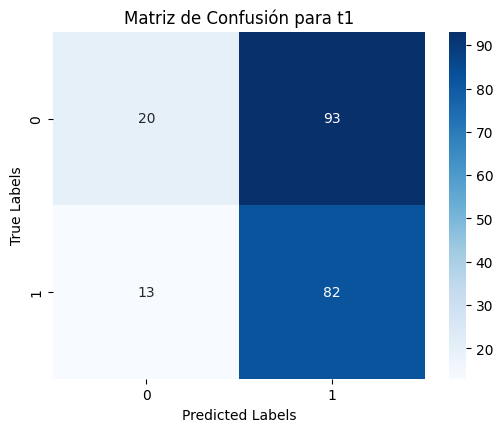

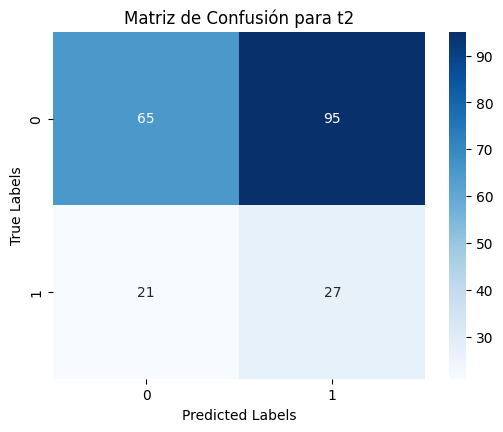

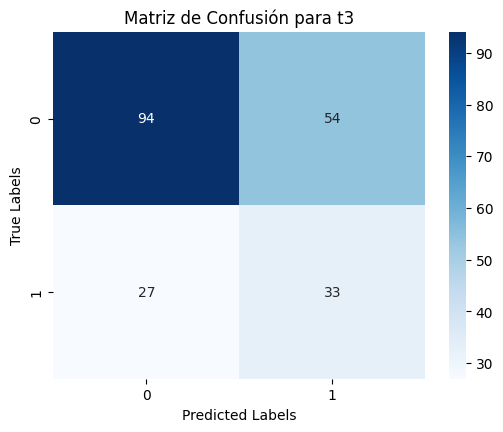

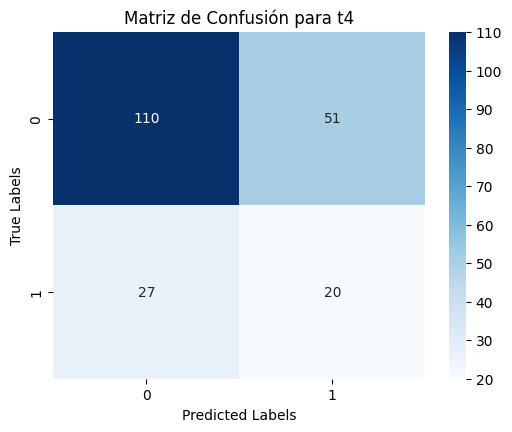

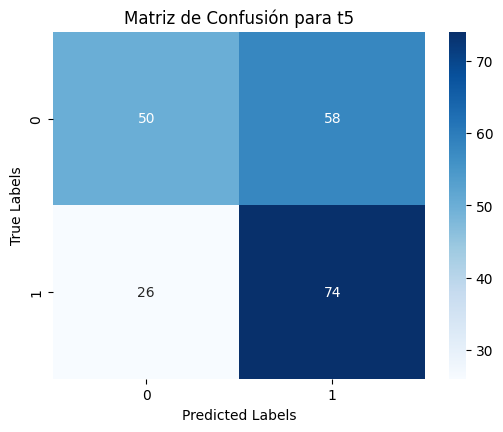

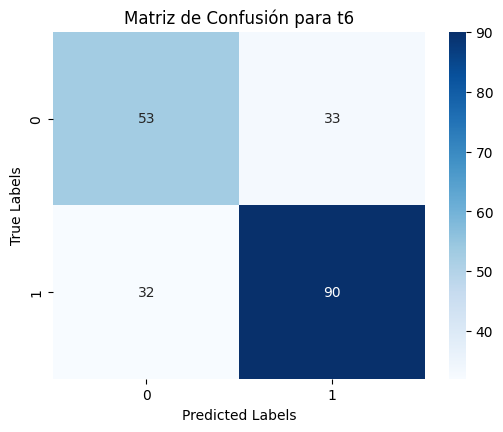

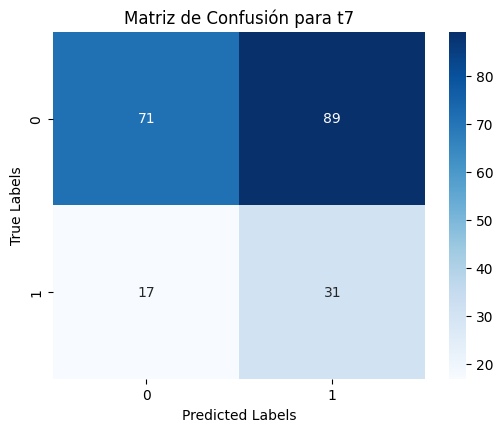

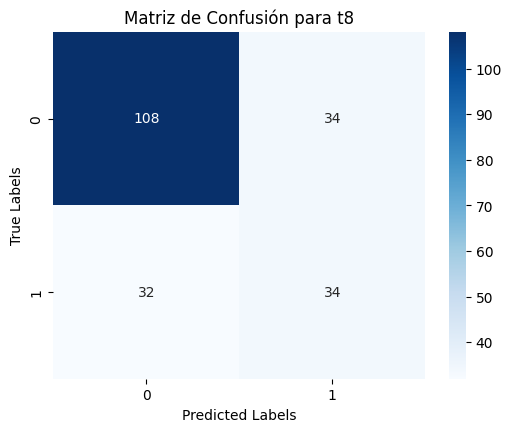

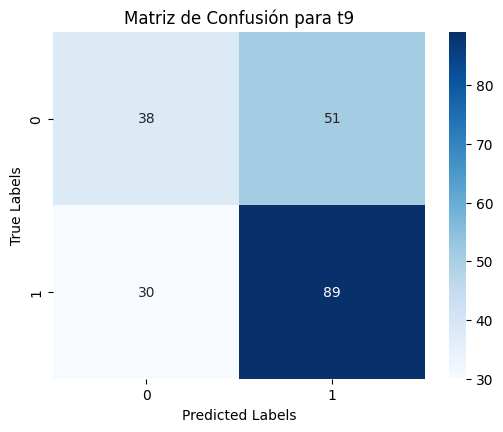

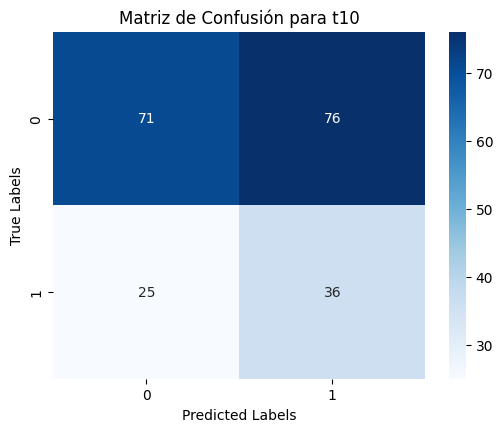

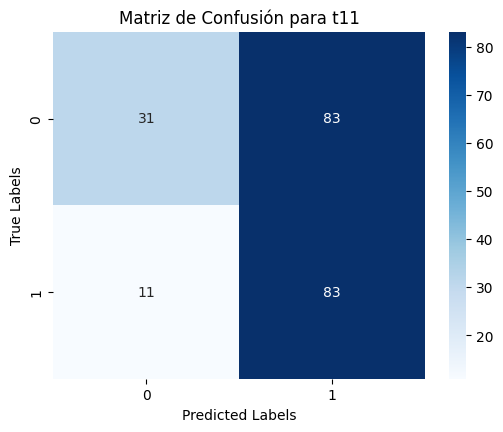

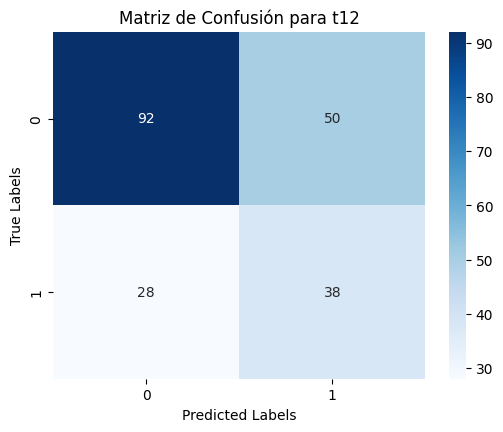

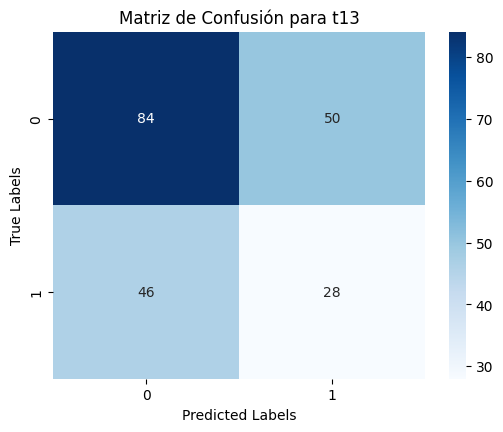

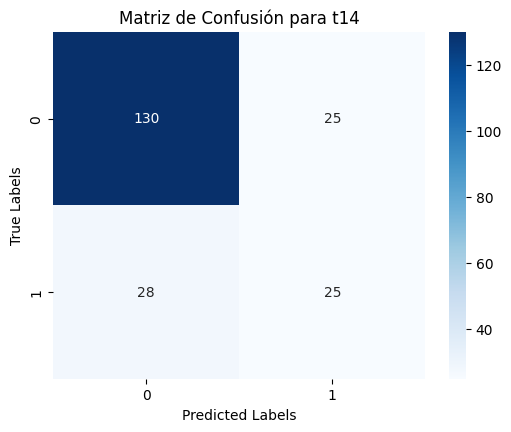

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

Al observar las matrices de confusión, se aprecia que con este modelo las clases predichas están menos desbalanceadas.

#### ExtraTreesClassifier

Este modelo es un conjunto de árboles de decisión entrenados de forma aleatoria. En este caso, para buscar los parámetros óptimos de este modelo, utilizamos `RandomizedSearchCV`, que realiza una búsqueda aleatoria, en lugar de probar todas las combinaciones posibles entre los parámetros indicados. Esto es conveniente para modelos más complejos como `ExtraTreesClassifier`, ya que probar todas las combinaciones posibles puede ser muy costoso computacionalmente.

In [ ]:
# Definimos los rangos de los parámetros
param_dist = {
    "n_estimators": [70, 80],  # Número de árboles en el bosque
    "max_depth": [3, 4, 5],  # Profundidad máxima de los árboles
    "min_samples_split": [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    "min_samples_leaf": [1, 2, 5],  # Número mínimo de muestras por hoja
    "criterion": ["gini", "entropy"]  # Criterio para dividir los nodos
}

# Definimos el modelo base
modelo = ExtraTreesClassifier(random_state = semilla)

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,  # Distribuciones de los parámetros
    n_iter=10,  # Número de iteraciones aleatorias a realizar
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla
)

# Realizamos la búsqueda
random_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
Best score: -0.2991105568553083


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.272
Hamming Loss test:  0.294


En este caso, los valores de Hamming Loss son más bajos que en los dos modelos anteriores. Además, no hay una gran diferencia entre los valores de Hamming Loss en el conjunto de entrenamiento y en el conjunto de prueba, lo cual sugiere que no hay un gran overfitting, y que el modelo tiene un desempeño relativamente bueno en los datos de entrenamiento.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.027677496991576414
Score test: 0.009615384615384616


El score para este modelo sigue siendo demasiado bajo, debido a que el global accuracy es una métrica muy estricta que requiere que todas las etiquetas de una muestra sean correctas, lo cual es bastante difícil de lograr en muchos casos, especialmente si hay muchas etiquetas, como en este caso, que hay 14.

In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.7280385078219013
Mean accuracy test: 0.7063873626373627


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.504
F1-score (macro): 0.338
F1-score (weighted): 0.410
F1-score (samples): 0.470

Test set F1-scores:
F1-score (micro): 0.461
F1-score (macro): 0.267
F1-score (weighted): 0.354
F1-score (samples): 0.431


Los valores de F1-score indican que el modelo está haciendo un trabajo decente prediciendo etiquetas, aunque todavía hay margen de mejora, especialmente en el conjunto de prueba. Sin embargo, el modelo está generalizando razonablemente bien, ya que los F1-scores en el conjunto de prueba no están demasiado alejados de los de entrenamiento.

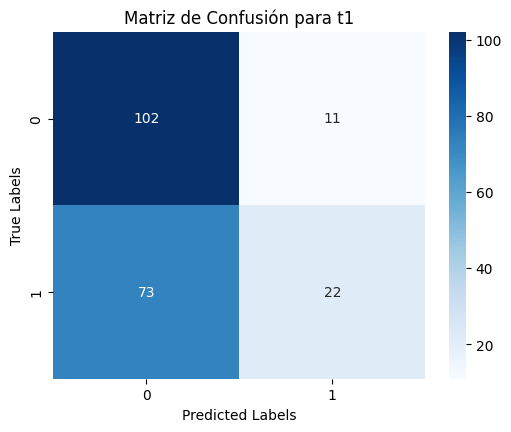

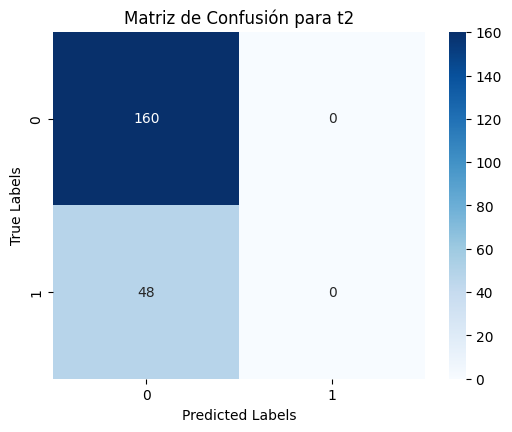

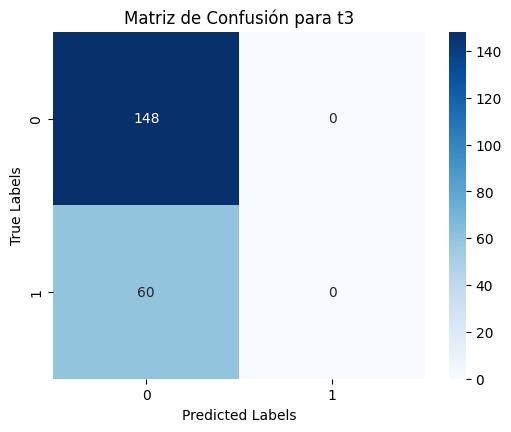

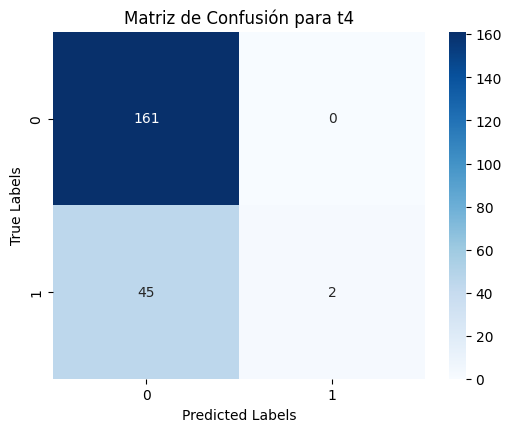

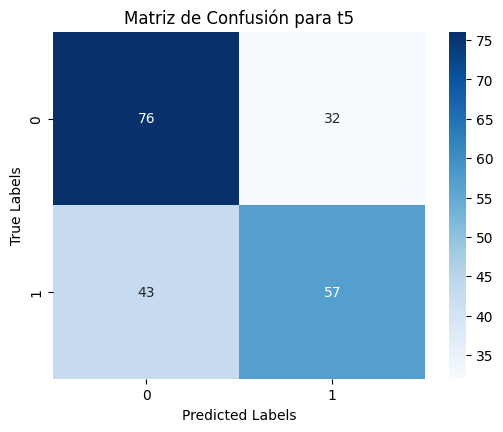

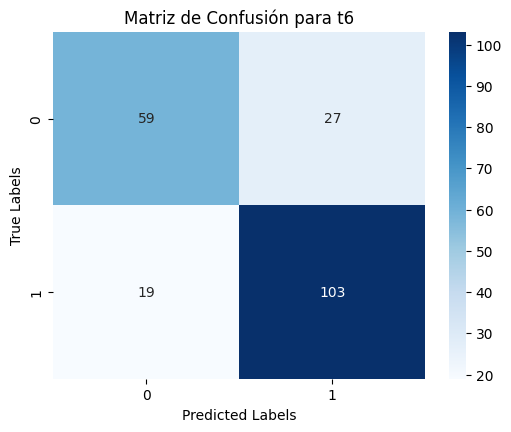

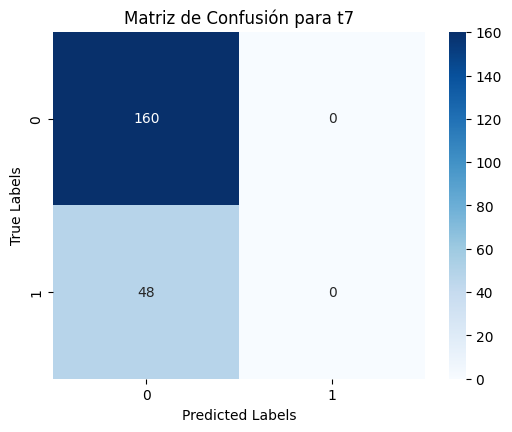

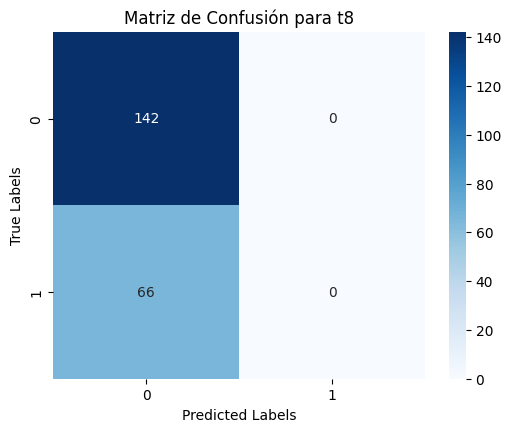

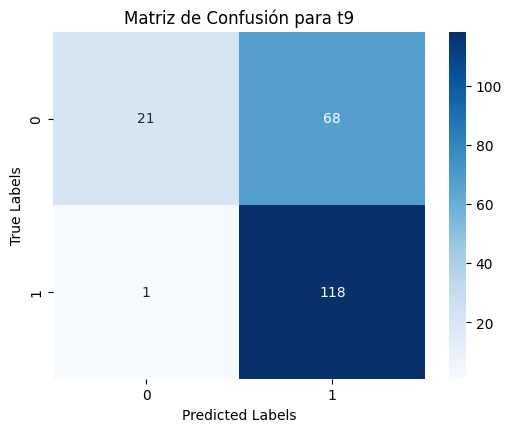

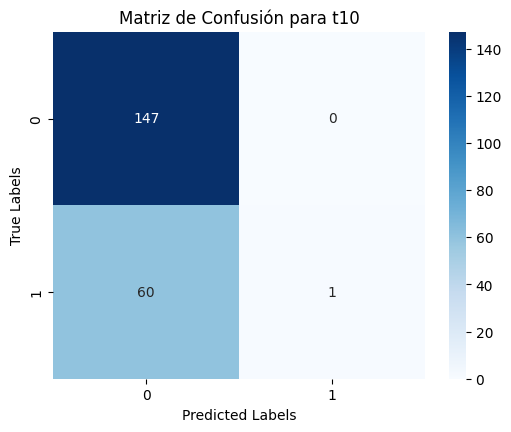

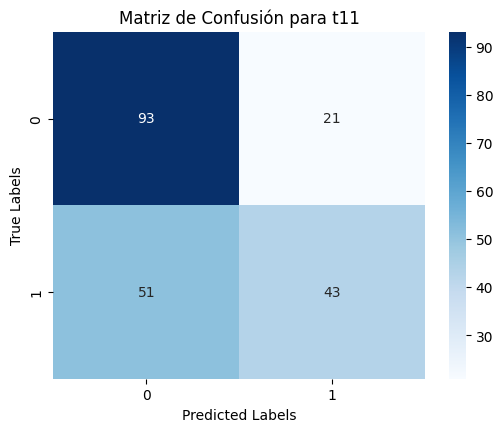

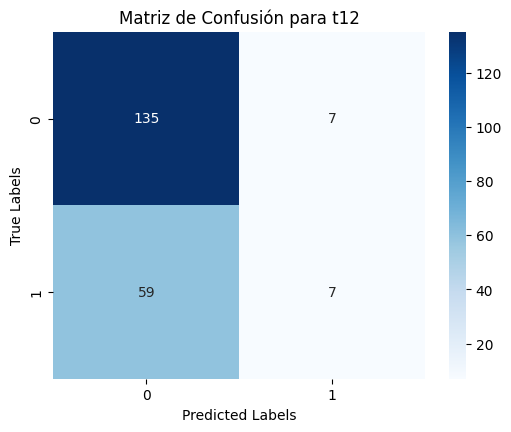

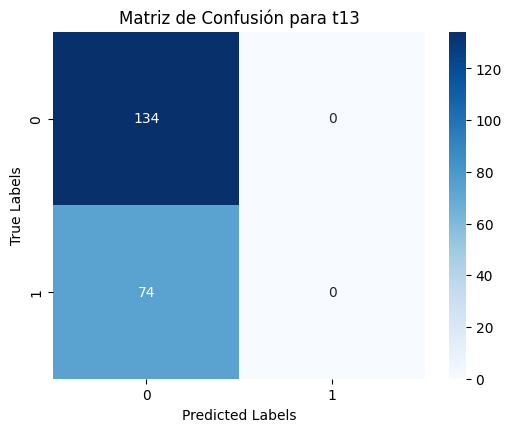

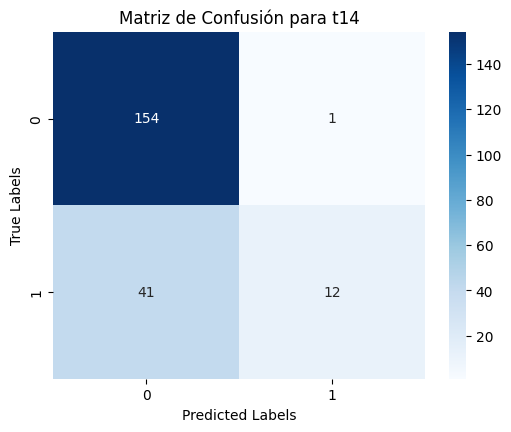

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

Observando las matrices de confusión, se aprecia que en la mayoría de los casos, una de las clases se predice mucho mejor que la otra. Esto podría deberse al leve desbalanceo de las clases. Por ello, vamos a probar a aplicar de nuevo el modelo `ExtraTreesClassifier`, pero esta vez vamos a añadirle el parámetro `class_weight = 'balanced'`, que ayuda a manejar desequilibrios en problemas de clasificación, ajustando unos pesos automáticamente basándose en las frecuencias de clase en los datos de entrada.

In [ ]:
# Definimos los rangos de los parámetros
param_dist = {
    "n_estimators": [50, 70, 80],  # Número de árboles en el bosque
    "max_depth": [3, 6],  # Profundidad máxima de los árboles
    "min_samples_split": [7, 8],  # Número mínimo de muestras requeridas para dividir un nodo
    "min_samples_leaf": [2, 3],  # Número mínimo de muestras por hoja
    "criterion": ["gini", "entropy"]  # Criterio para dividir los nodos
}

# Definimos el modelo base
modelo = ExtraTreesClassifier(random_state = semilla, class_weight = 'balanced')

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,  # Distribuciones de los parámetros
    n_iter=10,  # Número de iteraciones aleatorias a realizar
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla
)

# Realizamos la búsqueda
random_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model_et = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 70, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 6, 'criterion': 'gini'}
Best score: -0.38902882702752845


In [ ]:
Y_train_pred = best_model_et.predict(X_train_scaled)
Y_test_pred = best_model_et.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.346
Hamming Loss test:  0.386


Los valores de Hamming Loss aumentan un poco respecto al modelo anterior, pero no demasiado. La diferencia entre los valores en el conjunto de entrenamiento y el de prueba indican que podría haber un ligero overfitting, aunque no es excesivo.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model_et.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model_et.score(X_test_scaled, Y_test))

Score train: 0.039711191335740074
Score test: 0.0


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.6542031975244971
Mean accuracy test: 0.6136675824175826


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.645
F1-score (macro): 0.630
F1-score (weighted): 0.656
F1-score (samples): 0.617

Test set F1-scores:
F1-score (micro): 0.610
F1-score (macro): 0.592
F1-score (weighted): 0.628
F1-score (samples): 0.575


Los valores de F1-score mejoran con respecto al modelo anterior.

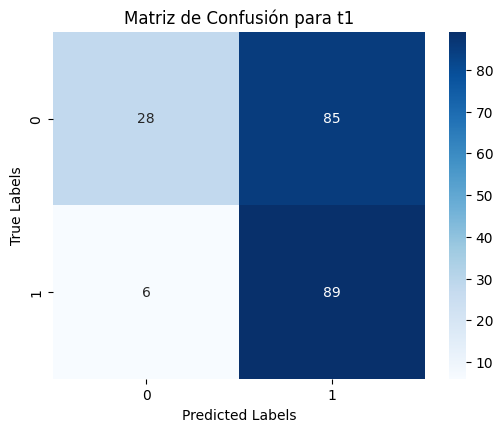

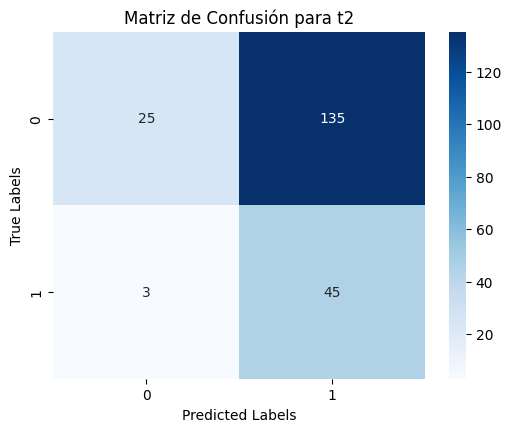

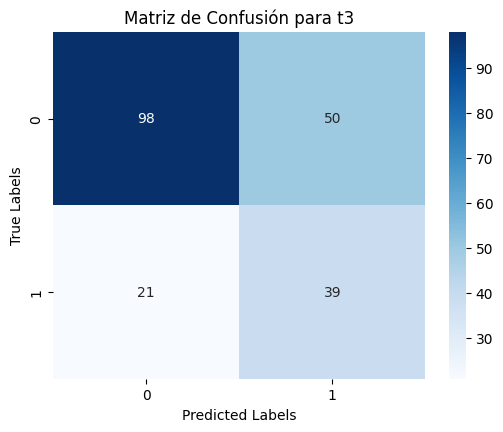

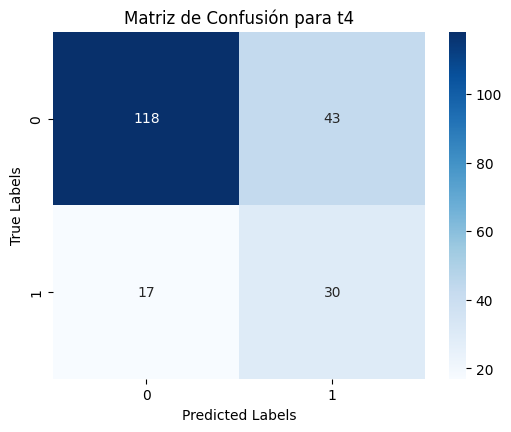

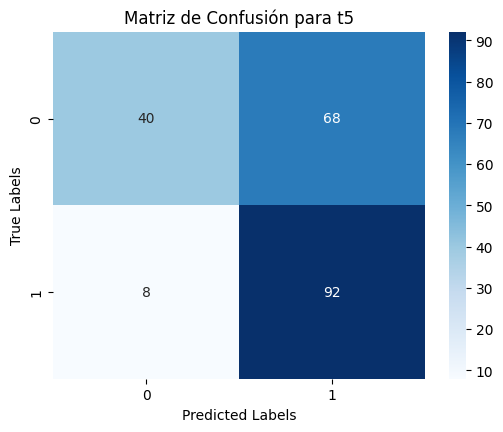

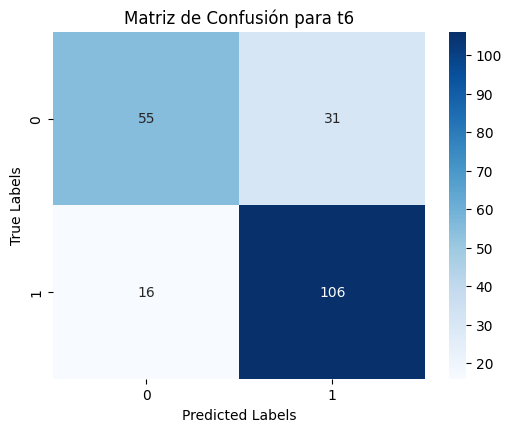

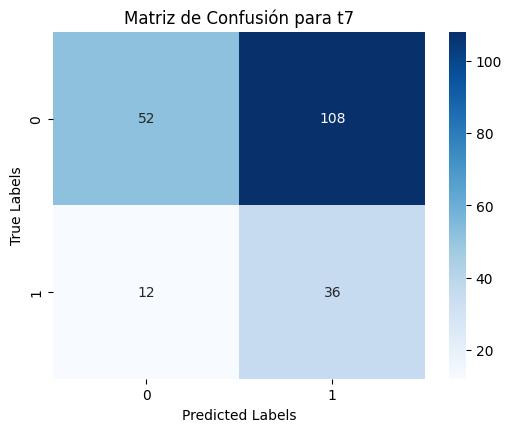

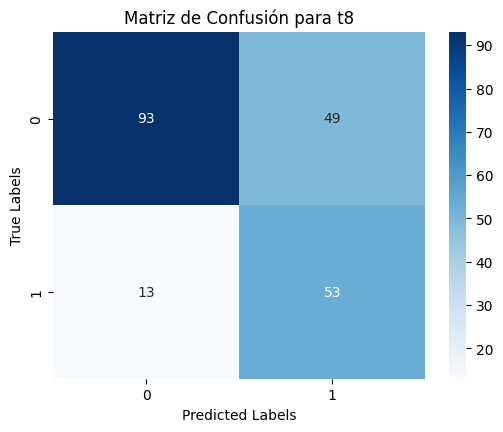

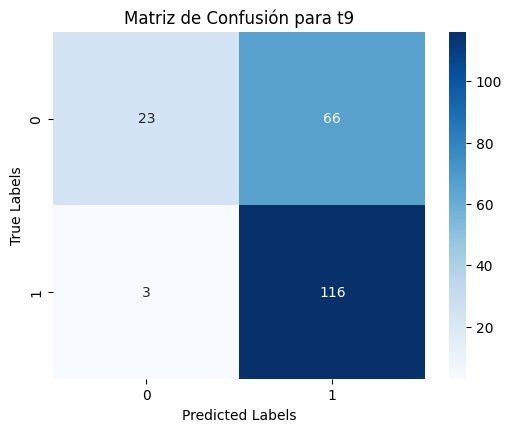

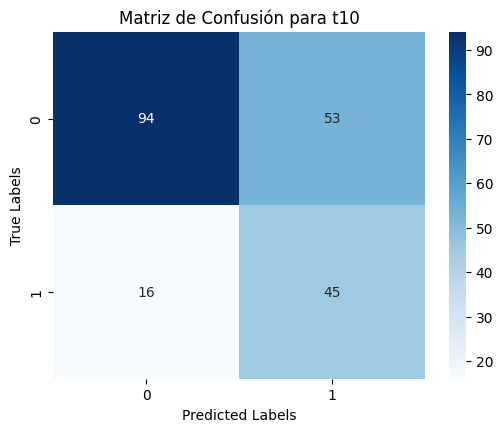

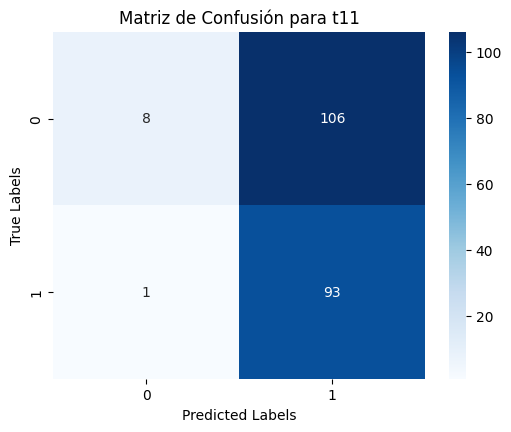

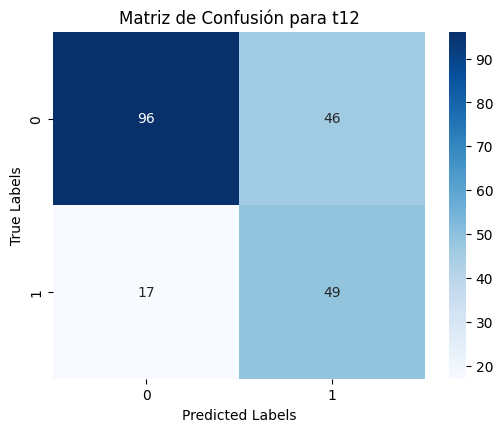

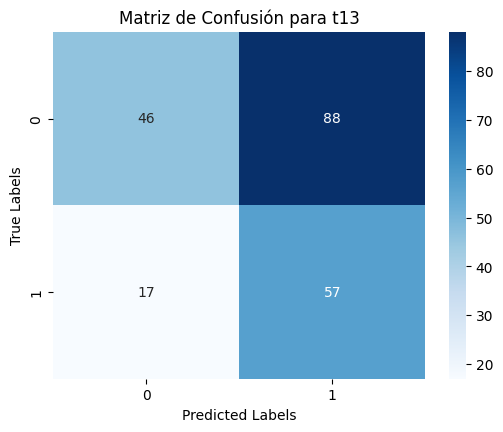

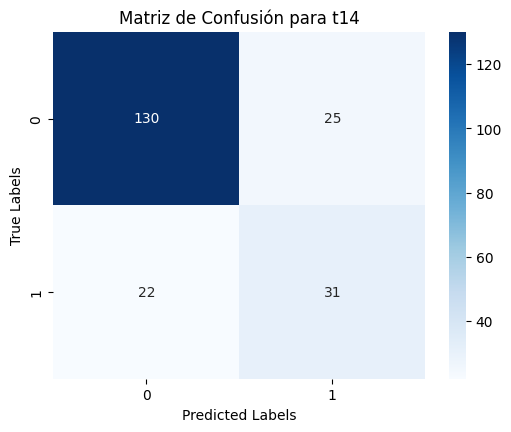

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

Se observa que en este caso, las predicciones para ambas clases no están tan desbalanceadas como con el anterior modelo, aunque sigue habiendo un buen margen de mejora.

#### KNeighborsClassifier

De nuevo, usamos `RandomizedSearchCV` para buscar los parámetros óptimos, ya que en este caso tenemos muchas combinaciones posibles de parámetros, y así ahorramos coste computacional.

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_dist = {
    "n_neighbors": [15, 20, 30],  # Número de vecinos
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # Algoritmos
    "p": [1, 2],  # Distancia Manhattan o Euclidiana
    "leaf_size": [20, 30, 40]  # Tamaño de las hojas
}

# Definimos el modelo base
modelo = KNeighborsClassifier(weights = 'uniform')

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=50,  # Número de iteraciones aleatorias
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla
)

# Realizamos la búsqueda
random_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'p': 1, 'n_neighbors': 15, 'leaf_size': 20, 'algorithm': 'brute'}
Best score: -0.2856204973873252


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.241
Hamming Loss test:  0.281


Para este modelo, se obtienen valores relativamente bajos de Hamming Loss, y además no se aprecia un overfitting excesivo, ya que no hay mucha diferencia entre los valores del conjunto de entrenamiento y el de prueba.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.0421179302045728
Score test: 0.014423076923076924


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.7591542031975246
Mean accuracy test: 0.7190934065934067


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.635
F1-score (macro): 0.569
F1-score (weighted): 0.611
F1-score (samples): 0.606

Test set F1-scores:
F1-score (micro): 0.579
F1-score (macro): 0.499
F1-score (weighted): 0.551
F1-score (samples): 0.531


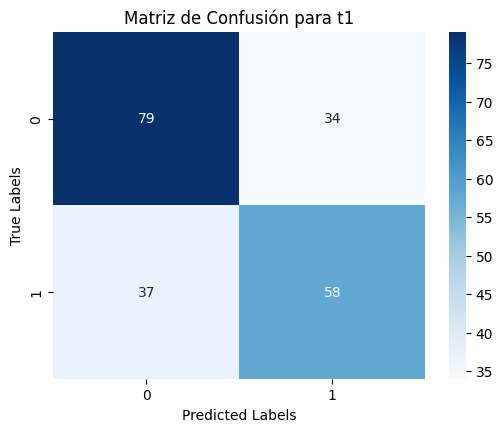

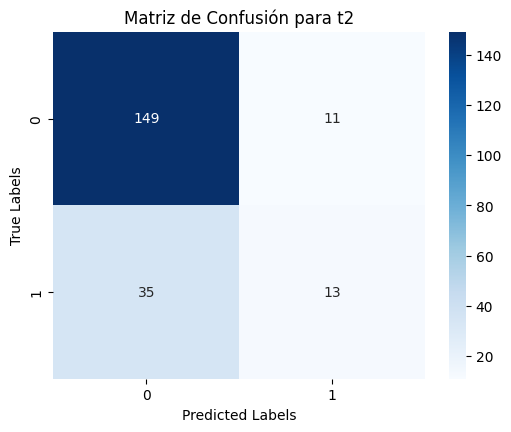

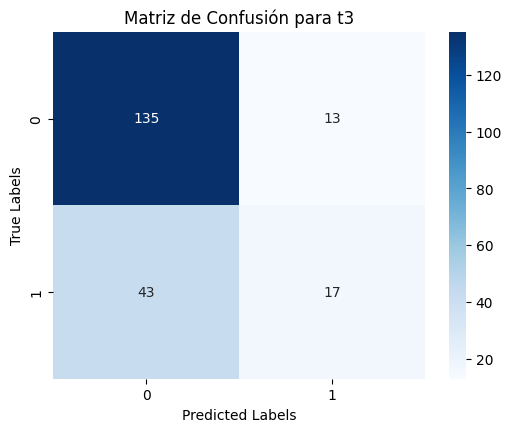

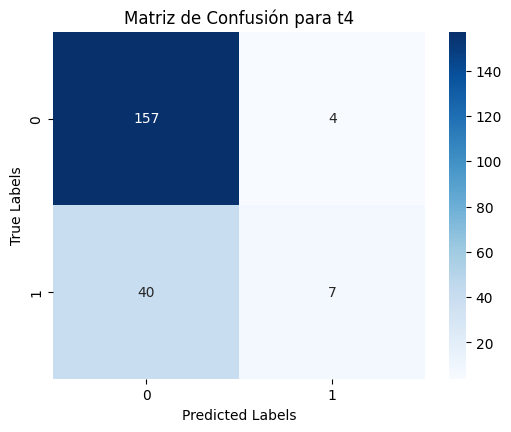

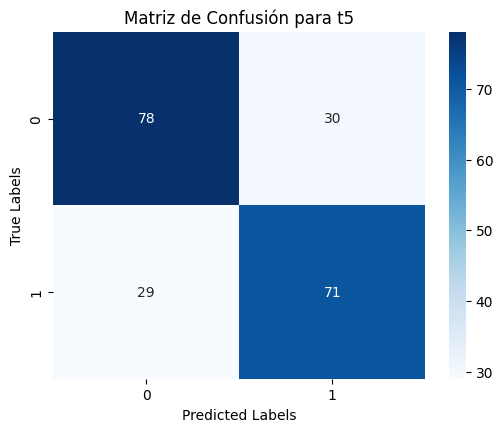

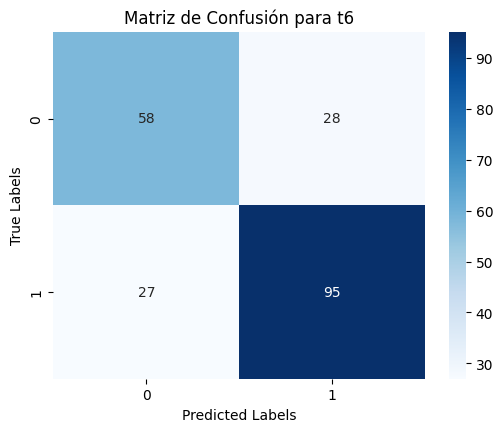

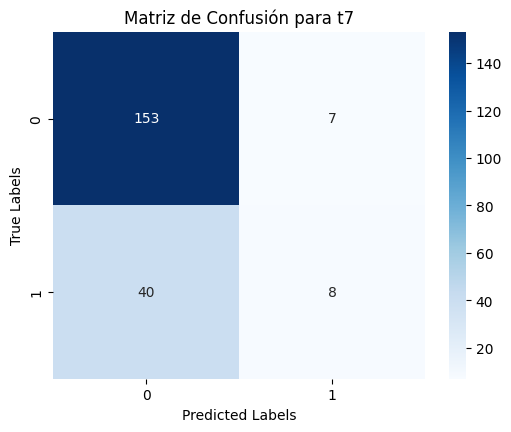

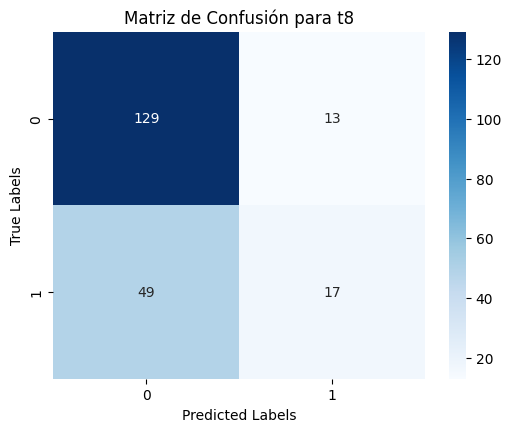

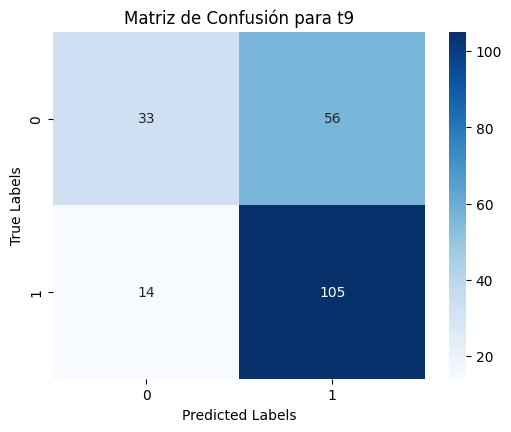

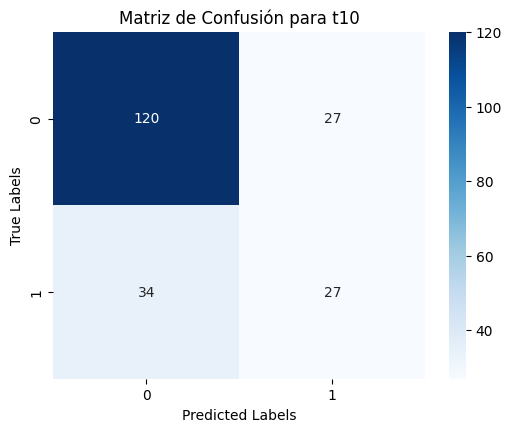

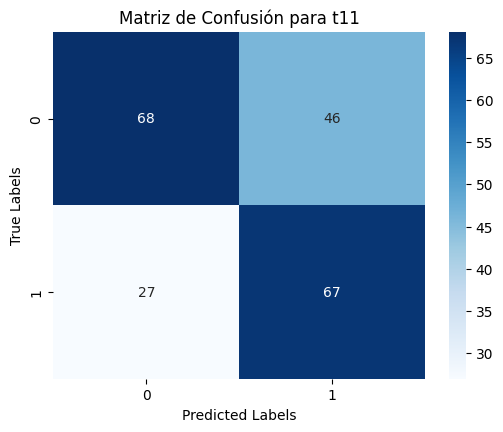

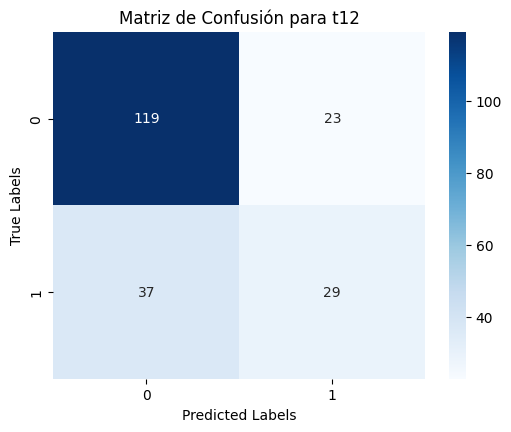

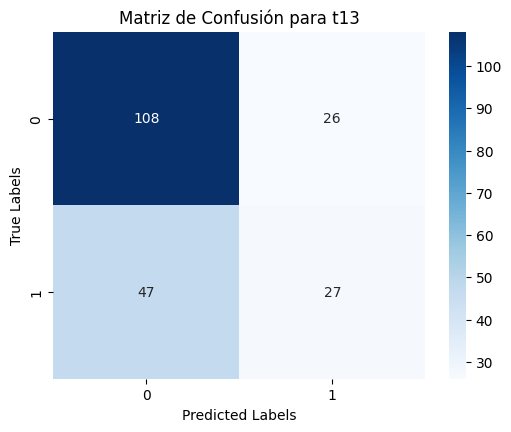

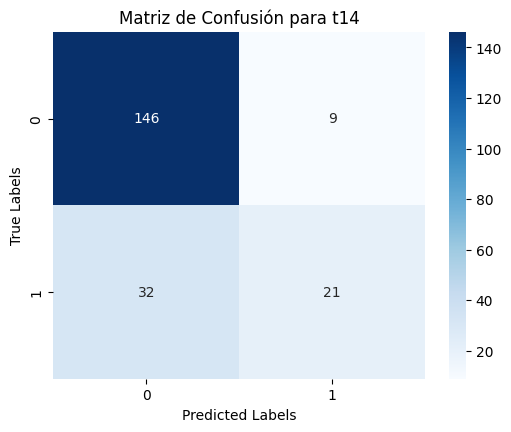

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

Observamos que el modelo `KNeighborsClassifier` no es demasiado adecuado para manejar datos desbalanceados, especialmente en problemas multi-label. Esto se debe a cómo funciona el algoritmo: clasifica cada muestra basándose en la mayoría de las etiquetas de sus vecinos más cercanos. Si hay una desproporción en la cantidad de clases, las etiquetas mayoritarias suelen dominar, lo que lleva a un mal rendimiento para las clases minoritarias. Además, a diferencia de otros modelos, no tiene un parámetro equivalente a `class_weight` para penalizar las clases mayoritarias o dar más importancia a las minoritarias.

#### MLPClassifier

El modelo `MLPClassifier` es una implementación de redes neuronales que se encuentra en `scikit-learn`. Más concretamente, consiste en un perceptrón multicapa, el cual incluye capas ocultas y funciones de activación no lineales, lo que le permite modelar relaciones complejas. Usamos el `RandomizedSearchCV` para buscar los parámetros óptimos, llevando cuidado para evitar el overfitting.

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_dist = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 50)],  # Número de neuronas en las capas ocultas
    "activation": ["relu", "tanh"],  # Función de activación
    "solver": ["adam", "sgd"],  # Algoritmo de optimización
    "alpha": [0.0001, 0.001, 0.01],  # Regularización L2
    "learning_rate": ["constant", "adaptive"],  # Tasa de aprendizaje
    "max_iter": [100, 200, 300],  # Número máximo de iteraciones
}

# Definimos el modelo base
modelo = MLPClassifier(random_state=semilla)

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=5,  # Número de iteraciones aleatorias
    scoring=hamming_scorer,  # Métrica
    cv=2,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla
)

# Realizamos la búsqueda
random_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters: {'solver': 'adam', 'max_iter': 100, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'relu'}
Best score: -0.2959428372831987


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.258
Hamming Loss test:  0.273


Para este modelo, se obtienen valores relativamente bajos de Hamming Loss, y además no hay mucha diferencia entre los valores del conjunto de entrenamiento y el de prueba, por lo que no se aprecia un overfitting excesivo.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.031287605294825514
Score test: 0.014423076923076924


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.7417053463984873
Mean accuracy test: 0.7269917582417583


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.602
F1-score (macro): 0.539
F1-score (weighted): 0.578
F1-score (samples): 0.559

Test set F1-scores:
F1-score (micro): 0.580
F1-score (macro): 0.499
F1-score (weighted): 0.552
F1-score (samples): 0.531


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


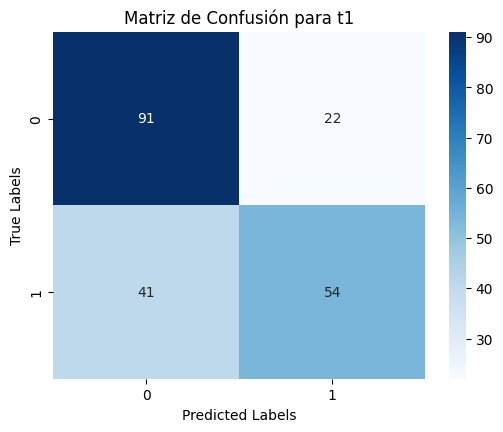

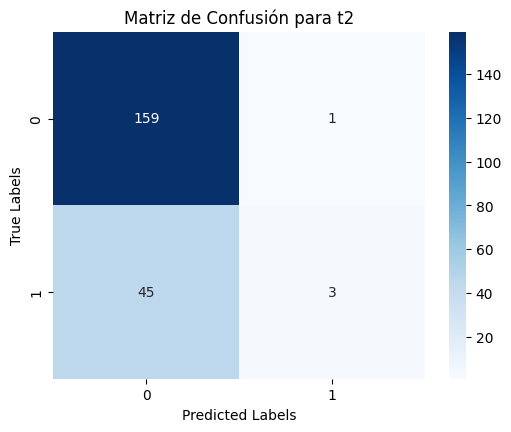

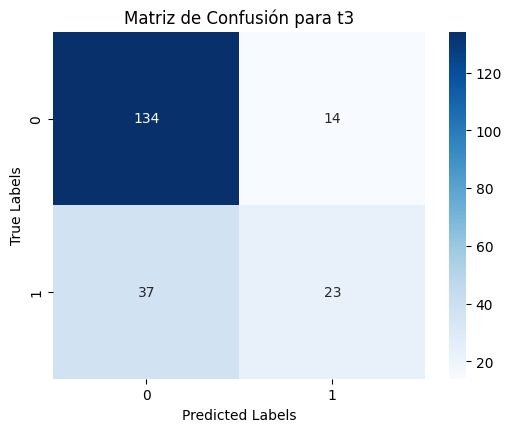

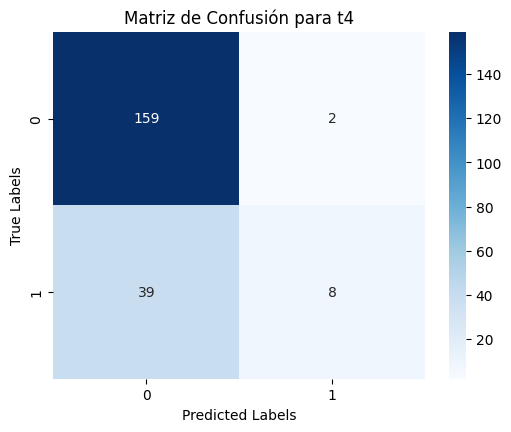

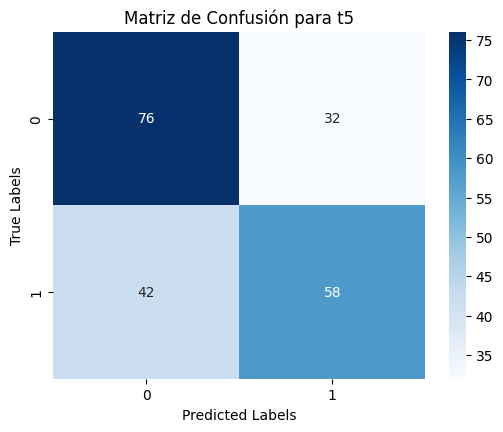

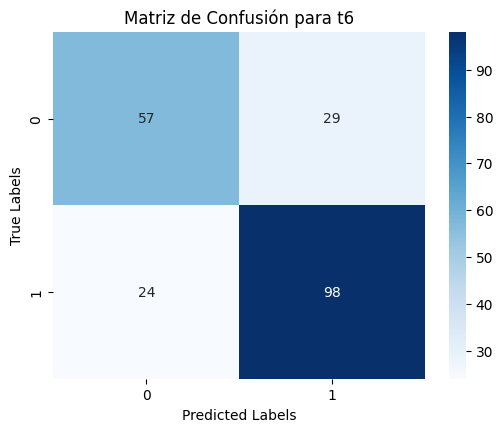

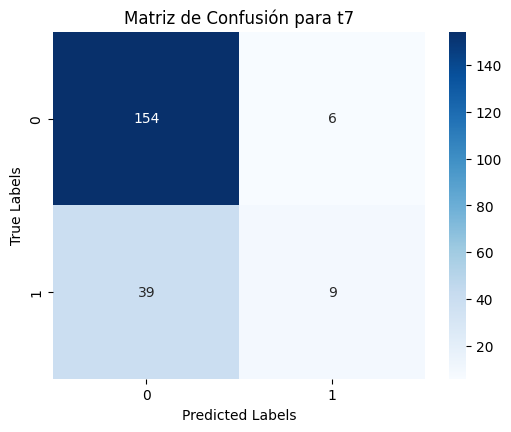

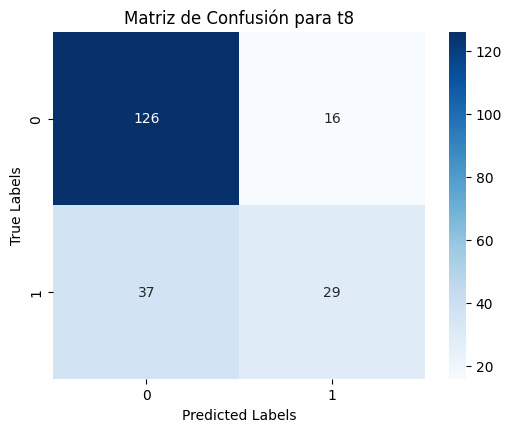

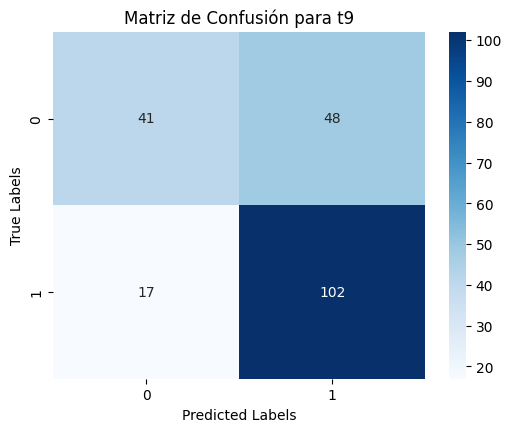

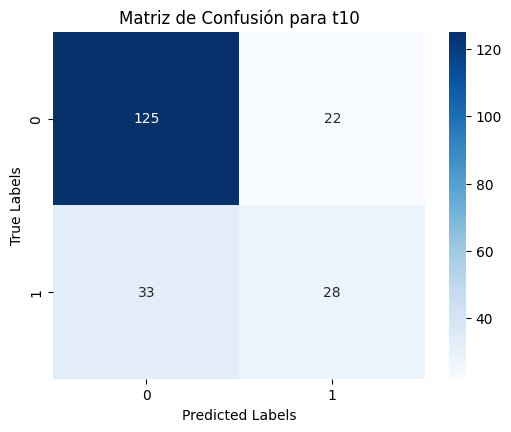

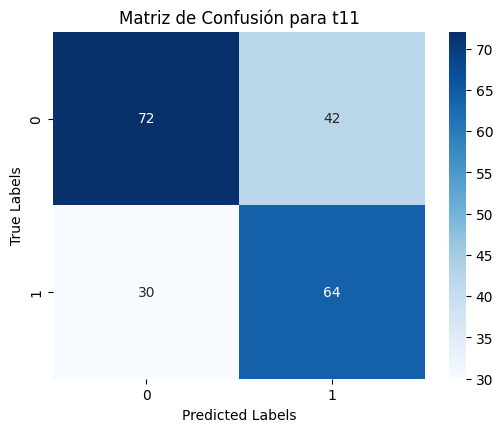

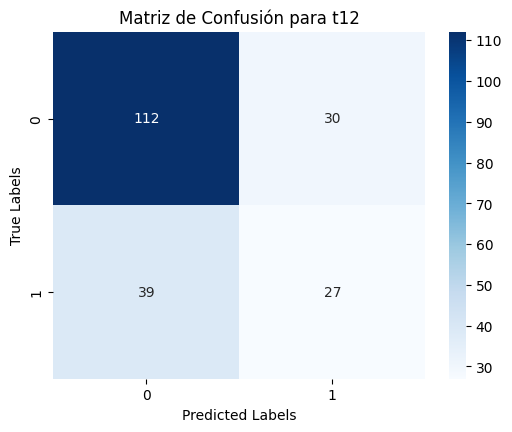

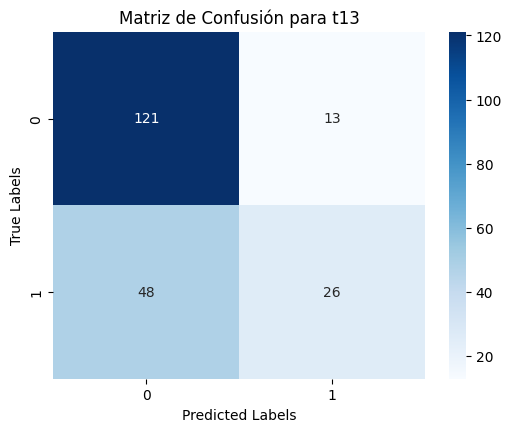

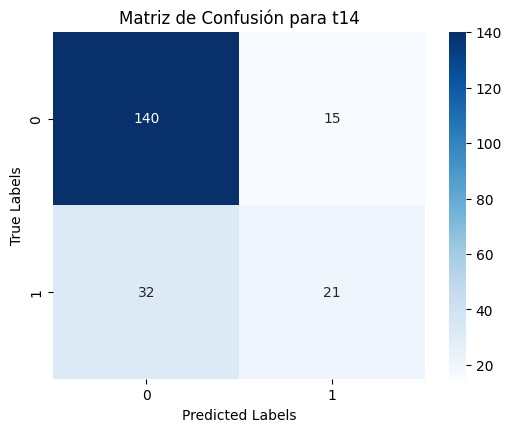

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

#### RandomForestClassifier

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_dist = {
    "n_estimators": [100, 200, 300, 500, 1000],  # Número de árboles
    "max_depth": [2, 3],  # Profundidad máxima de los árboles
    "min_samples_split": [5, 10, 20],  # Mínimas muestras para dividir
    "min_samples_leaf": [4, 5, 10],  # Mínimas muestras en hoja
    "max_features": ["sqrt", "log2"],  # Selección de características
    "bootstrap": [True, False],  # Muestreo con o sin reemplazo
}

# Definimos el modelo base
modelo = RandomForestClassifier(random_state=semilla)

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=15,  # Número de iteraciones aleatorias
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla
)

# Realizamos la búsqueda
random_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 3, 'bootstrap': True}
Best score: -0.29601863398847744


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.283
Hamming Loss test:  0.291


In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.015643802647412757
Score test: 0.019230769230769232


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.7172941378717552
Mean accuracy test: 0.7087912087912088


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.501
F1-score (macro): 0.338
F1-score (weighted): 0.411
F1-score (samples): 0.469

Test set F1-scores:
F1-score (micro): 0.483
F1-score (macro): 0.296
F1-score (weighted): 0.384
F1-score (samples): 0.445


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


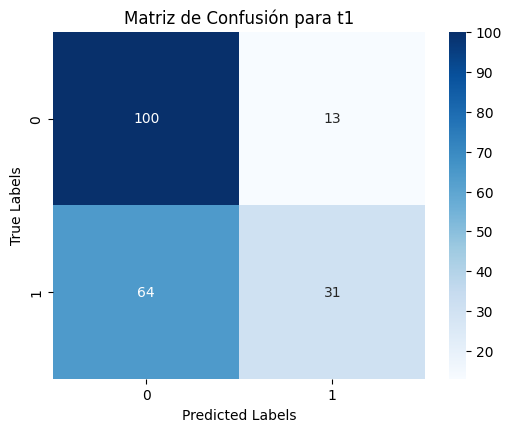

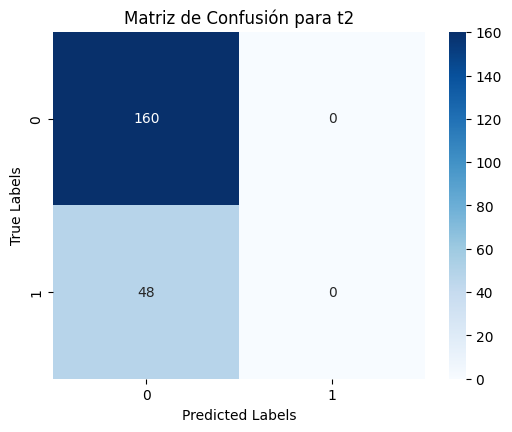

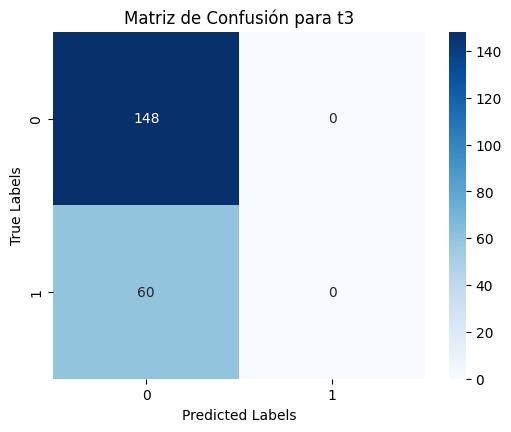

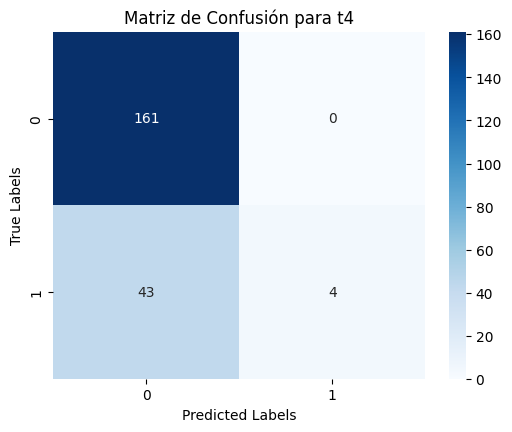

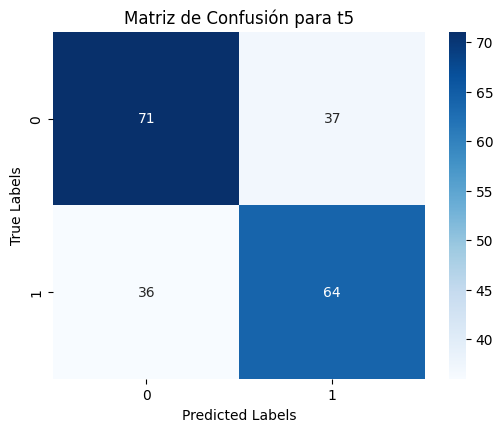

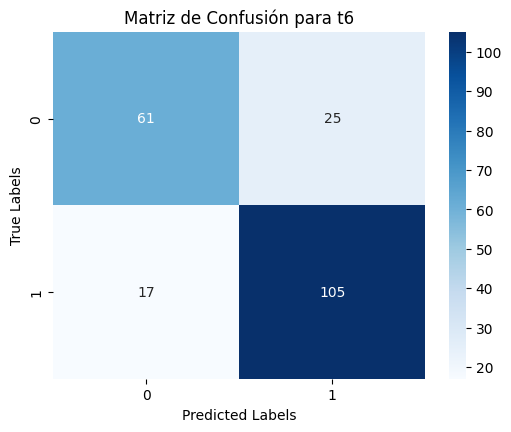

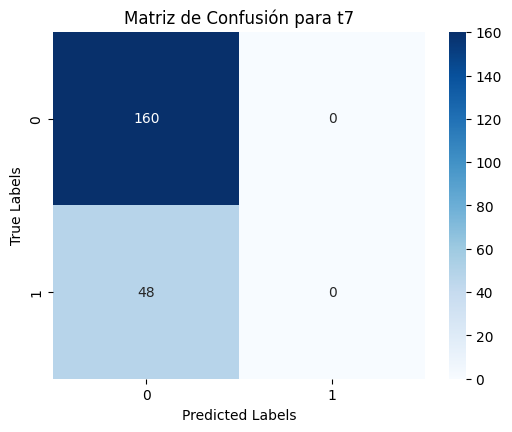

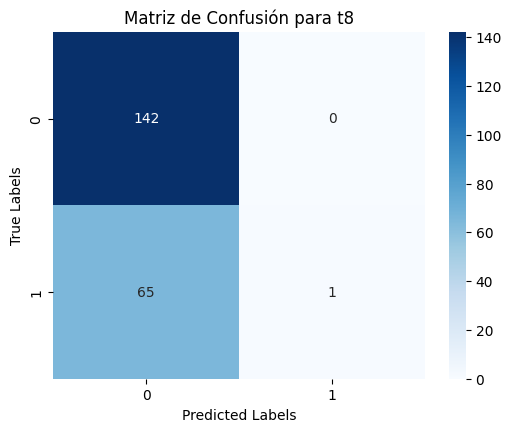

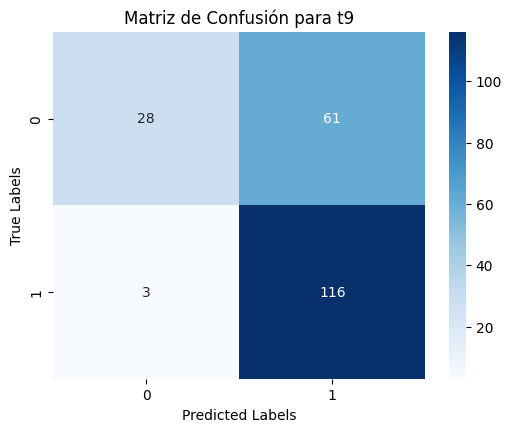

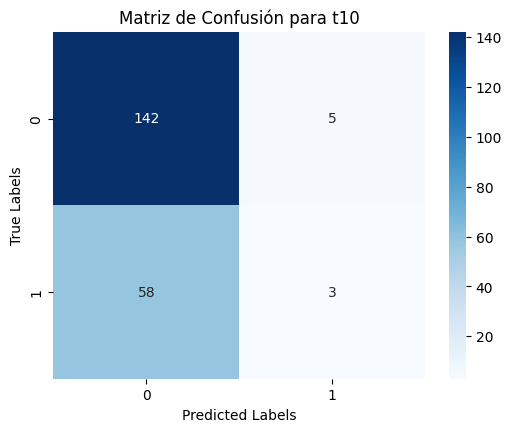

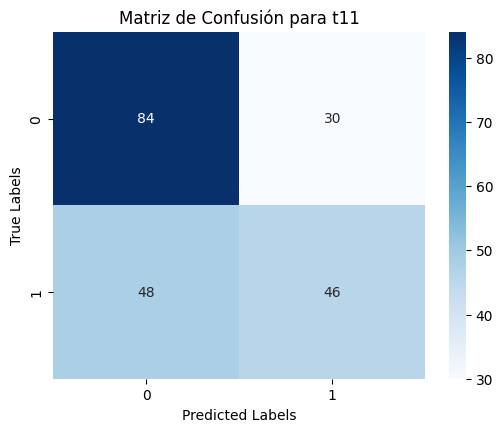

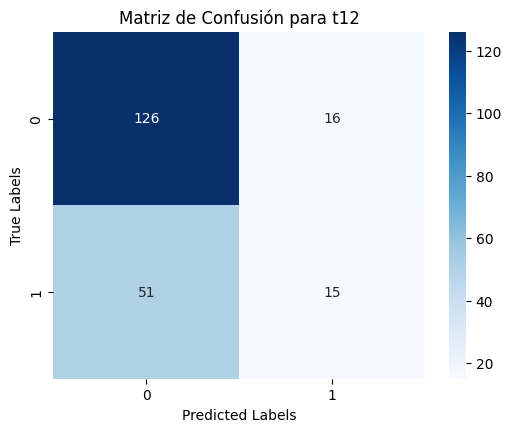

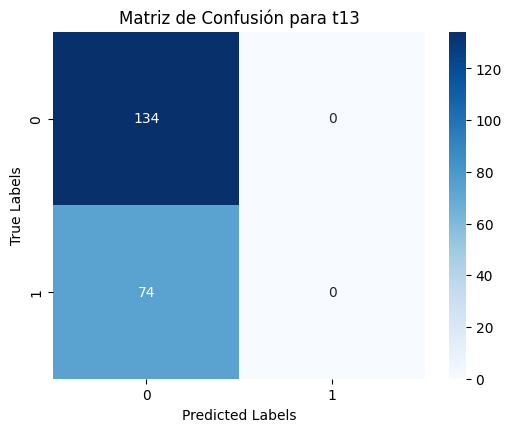

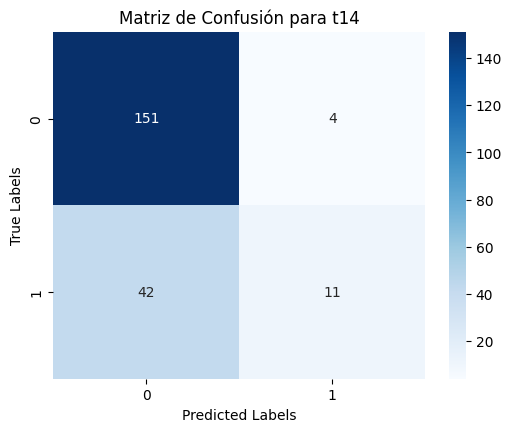

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

Al observar las matrices de confusión, vemos que los datos desbalanceados podrían estar perjudicando las predicciones, favoreciendo a la clase mayoritaria. Para evitar esto, podemos añadir el parámetro `class_weight='balanced'` al entrenar el modelo, ajustando el peso de cada muestra según la frecuencia de su clase.

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_dist = {
    "n_estimators": [100, 200, 300, 500, 1000],  # Número de árboles
    "max_depth": [2, 3],  # Profundidad máxima de los árboles
    "min_samples_split": [5, 10, 20],  # Mínimas muestras para dividir
    "min_samples_leaf": [4, 5, 10],  # Mínimas muestras en hoja
    "max_features": ["sqrt", "log2"],  # Selección de características
    "bootstrap": [True, False],  # Muestreo con o sin reemplazo
}

# Definimos el modelo base
modelo = RandomForestClassifier(random_state=semilla, class_weight='balanced')

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=15,  # Número de iteraciones aleatorias
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla
)

# Realizamos la búsqueda
random_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}
Best score: -0.41894111948220597


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.411
Hamming Loss test:  0.435


Los valores de Hamming Loss empeoran con respecto al anterior modelo, aunque toman valores muy similares en el conjunto de entrenamiento y en el de prueba, indicando que no hay overfitting y el modelo generaliza bien.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.0036101083032490976
Score test: 0.004807692307692308


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.5891352931064122
Mean accuracy test: 0.5652472527472528


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.602
F1-score (macro): 0.590
F1-score (weighted): 0.618
F1-score (samples): 0.575

Test set F1-scores:
F1-score (micro): 0.584
F1-score (macro): 0.567
F1-score (weighted): 0.606
F1-score (samples): 0.556


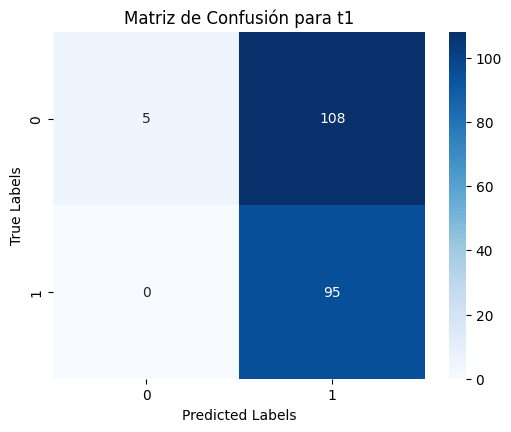

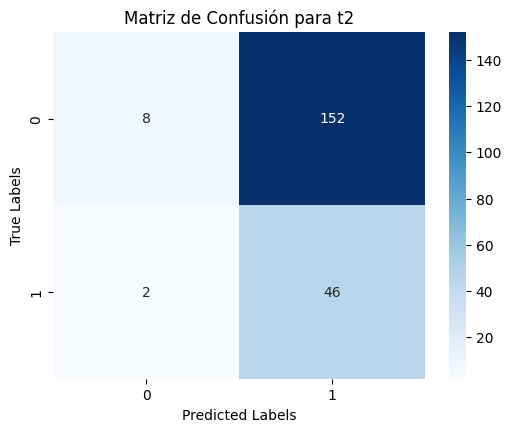

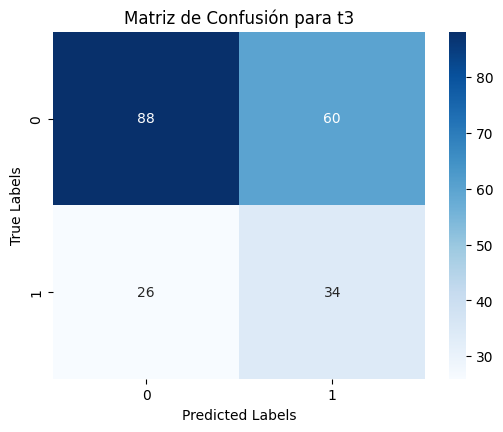

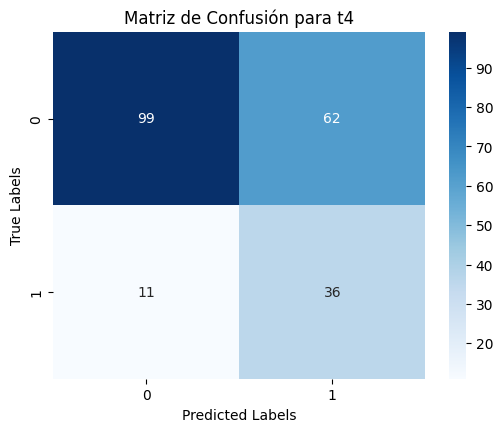

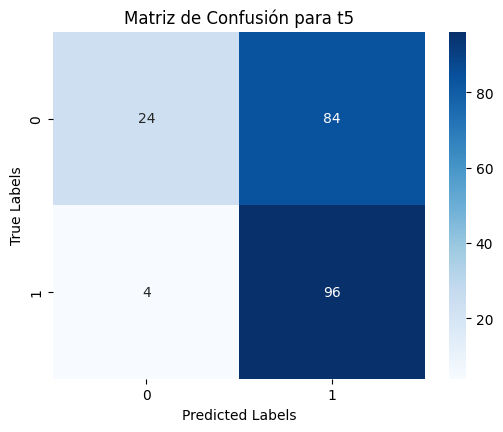

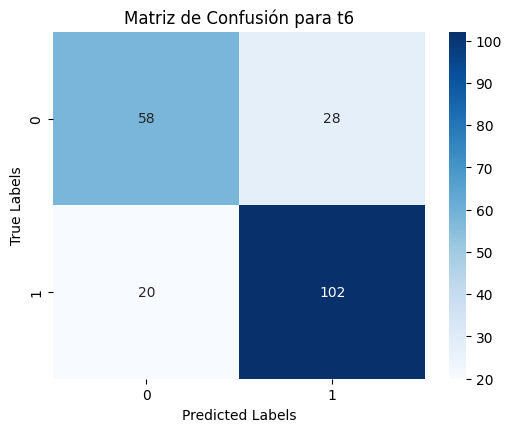

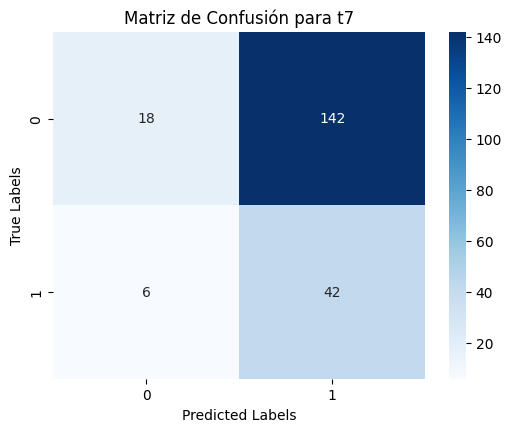

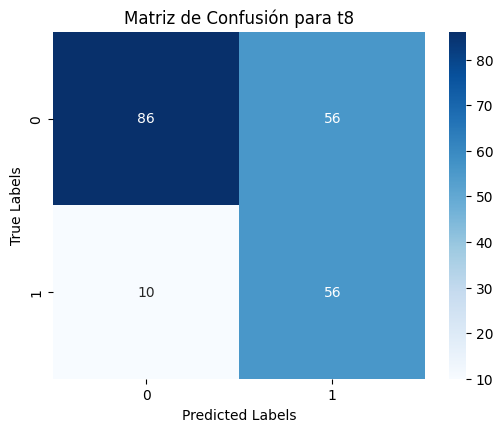

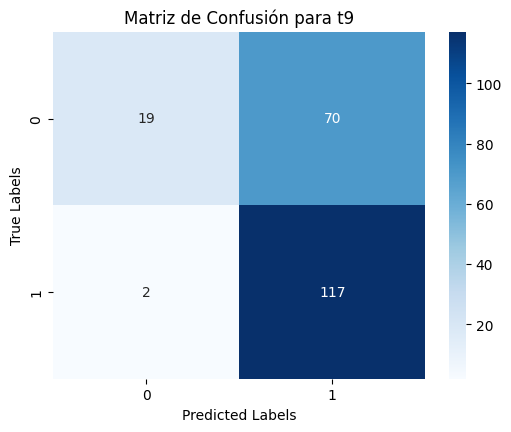

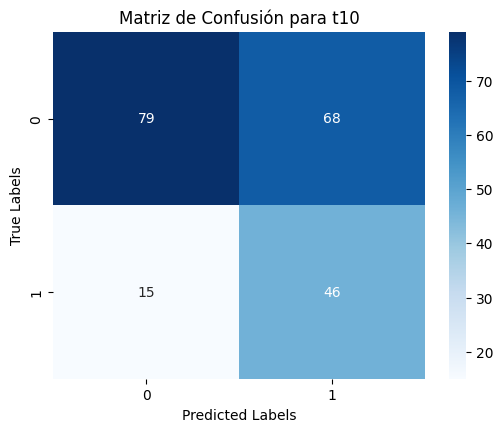

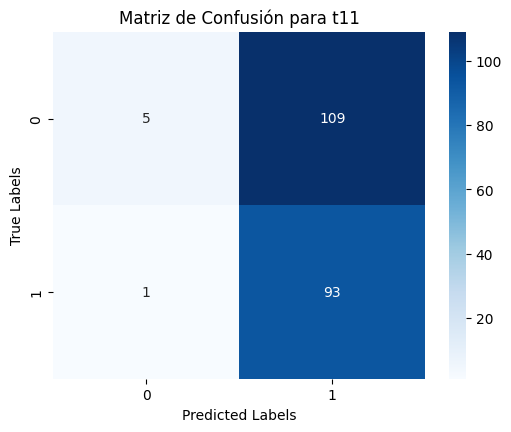

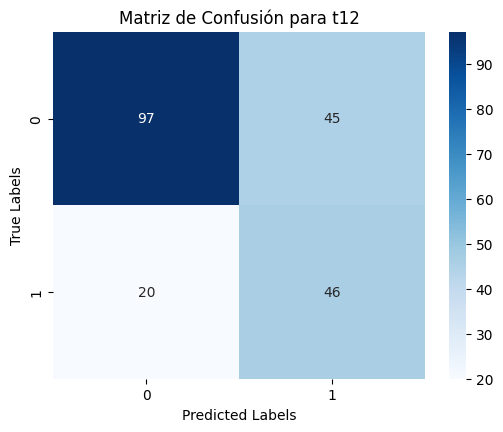

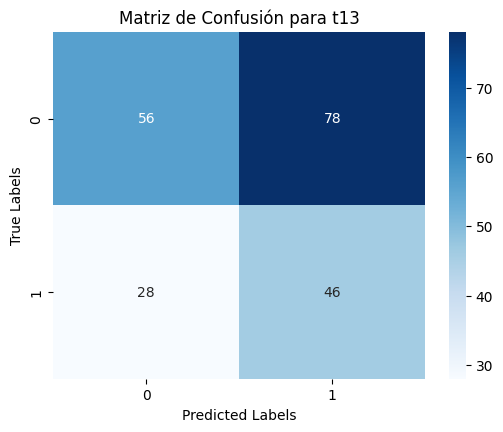

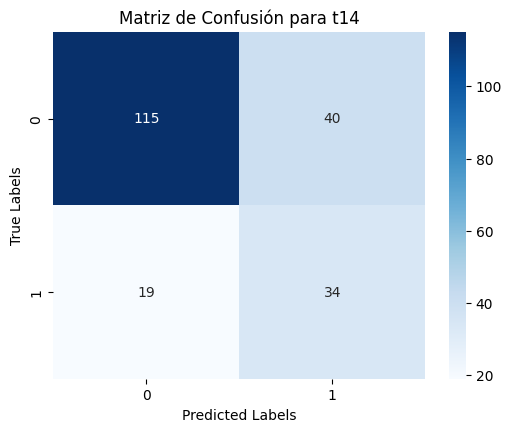

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

#### RidgeClassifierCV

El modelo `RidgeClassifierCV` está basado en la regresión lineal y utiliza regularización Ridge para evitar el sobreajuste. Como en este caso tenemos pocos parámetros entre los que buscar el modelo más óptimo, usamos `GridSearchCV`, que prueba todas las combinaciones posibles entre los parámetros.

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_grid = {
    "alphas": [[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]],  # Valores de regularización
    "scoring": ["f1_weighted", "f1_micro"],  # Métricas para selección interna
    "cv": [5],  # Validación cruzada dentro del modelo
}

# Definimos el modelo base
modelo = RidgeClassifierCV()

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos GridSearchCV
grid_cv = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1
)

# Realizamos la búsqueda
grid_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = grid_cv.best_estimator_
print("Best parameters:", grid_cv.best_params_)
print("Best score:", grid_cv.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'alphas': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'cv': 5, 'scoring': 'f1_weighted'}
Best score: -0.3006565182887238


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.285
Hamming Loss test:  0.289


Se obtienen valores relativamente bajos de Hamming Loss, y además toman valores muy similares en el conjunto de entrenamiento y en el de prueba, lo cual indica que el modelo no está sobreajustando.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.015643802647412757
Score test: 0.009615384615384616


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.7145435791645177
Mean accuracy test: 0.7108516483516483


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.524
F1-score (macro): 0.432
F1-score (weighted): 0.482
F1-score (samples): 0.483

Test set F1-scores:
F1-score (micro): 0.517
F1-score (macro): 0.409
F1-score (weighted): 0.470
F1-score (samples): 0.478


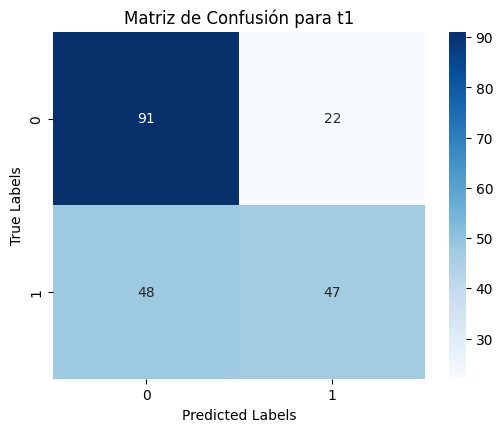

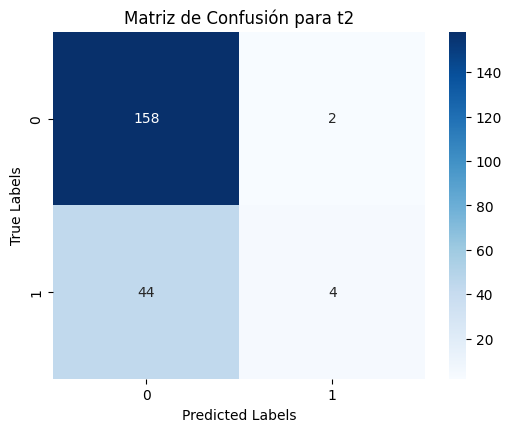

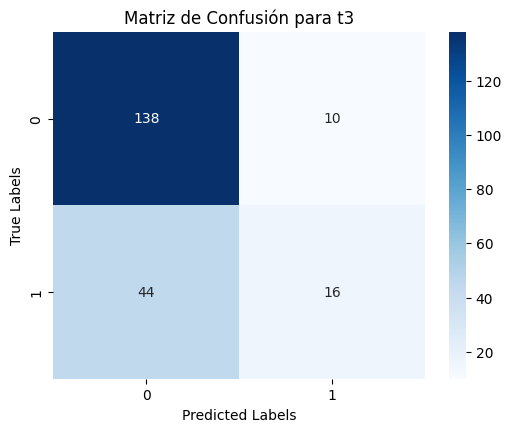

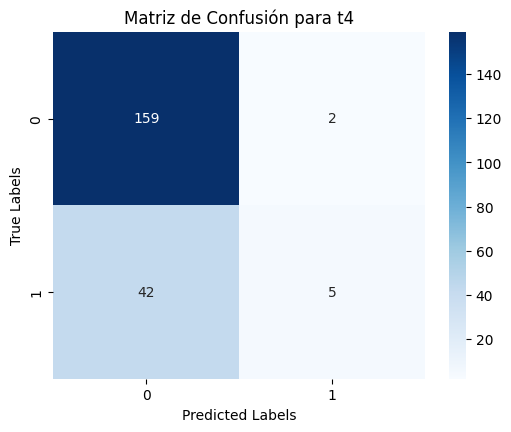

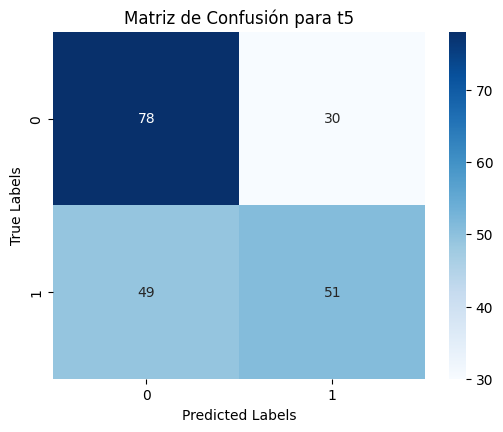

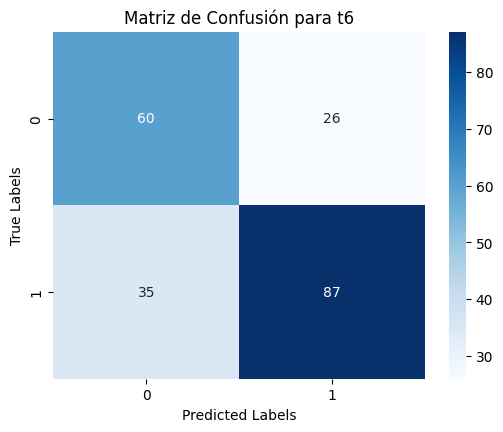

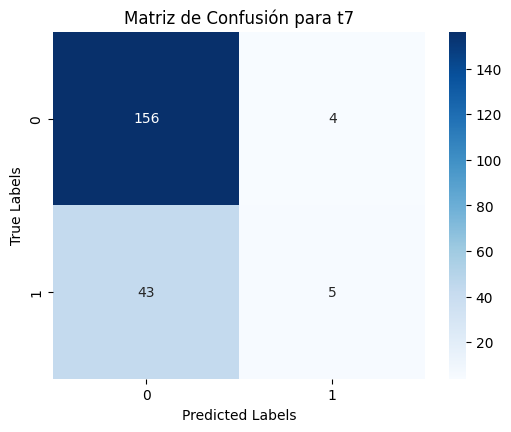

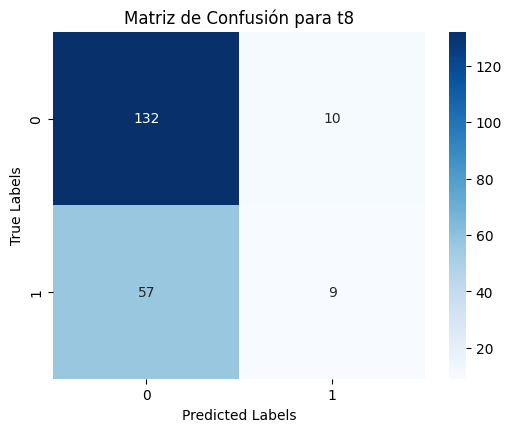

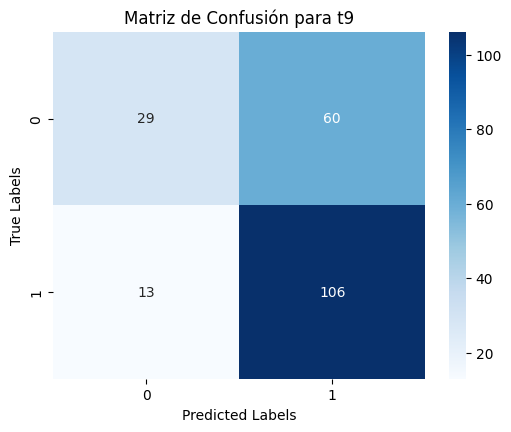

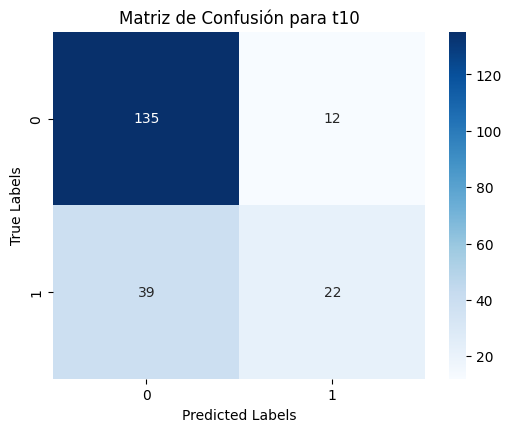

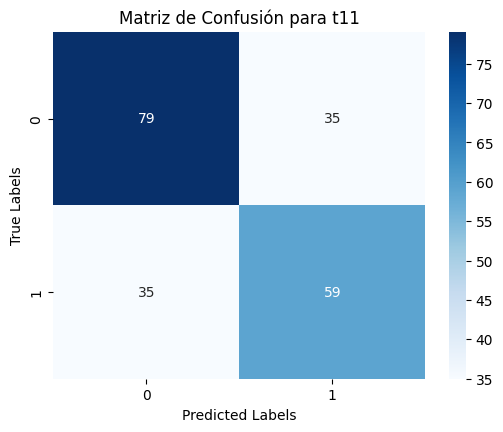

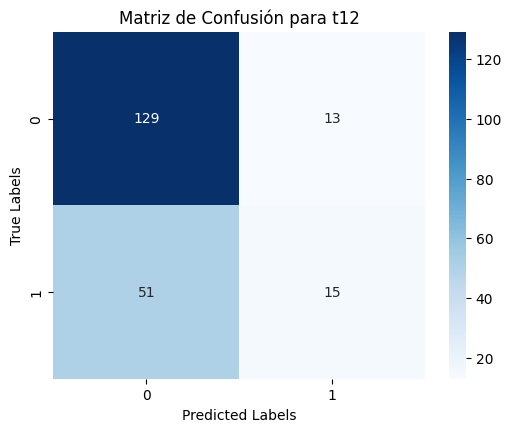

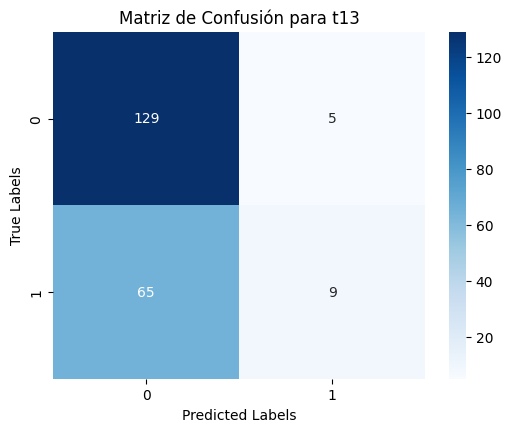

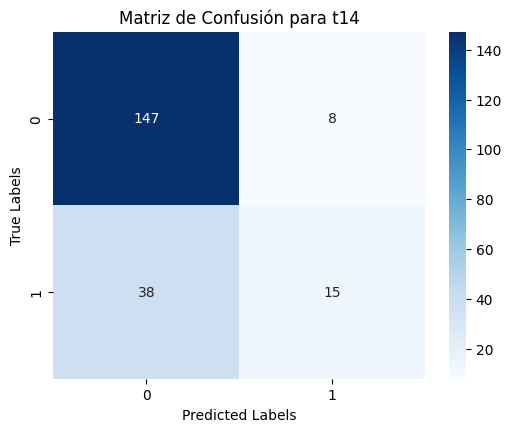

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

De nuevo, podemos volver a probar este mismo modelo pero usando el parámetro `class_weight='balanced'`, para tener en cuenta el desbalanceo que hay en los datos.

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_grid = {
    "alphas": [[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]],  # Valores de regularización
    "scoring": ["f1_weighted", "f1_micro"],  # Métricas para selección interna
    "cv": [5],  # Validación cruzada dentro del modelo
}

# Definimos el modelo base
modelo = RidgeClassifierCV(class_weight='balanced')

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos GridSearchCV
grid_cv = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1
)

# Realizamos la búsqueda
grid_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = grid_cv.best_estimator_
print("Best parameters:", grid_cv.best_params_)
print("Best score:", grid_cv.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'alphas': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'cv': 5, 'scoring': 'f1_weighted'}
Best score: -0.3929055829820565


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.38
Hamming Loss test:  0.4


En este caso, los valores de Hamming Loss empeoran con respecto al anterior modelo, aunque tampoco muestran overfitting.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.007220216606498195
Score test: 0.004807692307692308


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.6195633488052261
Mean accuracy test: 0.5995879120879122


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.592
F1-score (macro): 0.577
F1-score (weighted): 0.604
F1-score (samples): 0.562

Test set F1-scores:
F1-score (micro): 0.569
F1-score (macro): 0.554
F1-score (weighted): 0.584
F1-score (samples): 0.530


En este caso, al tener en cuenta el desbalanceo de las clases, la métrica F1-score mejora.

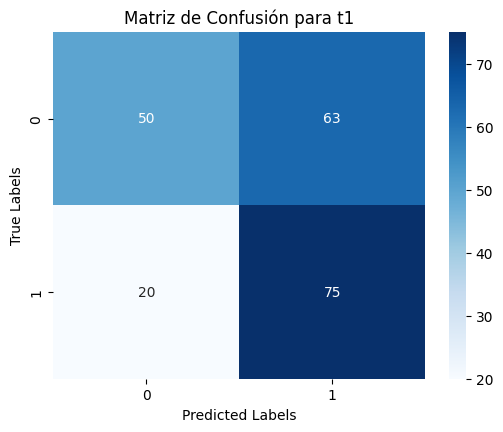

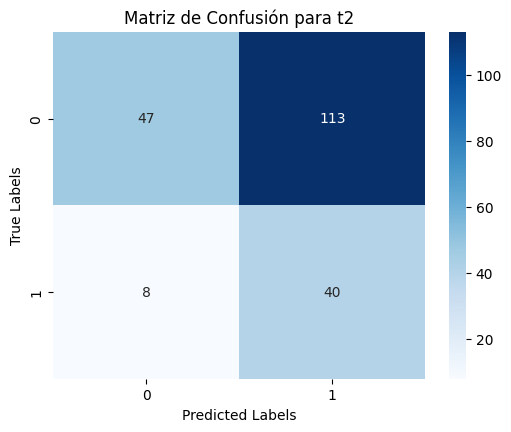

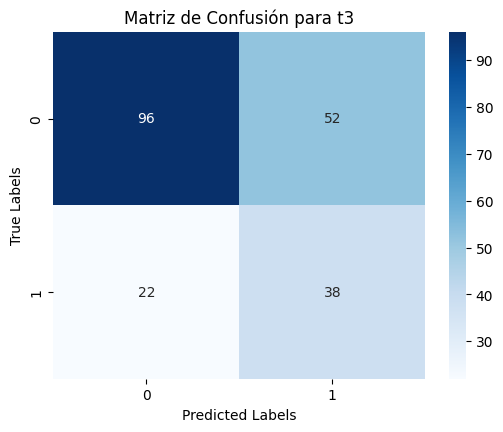

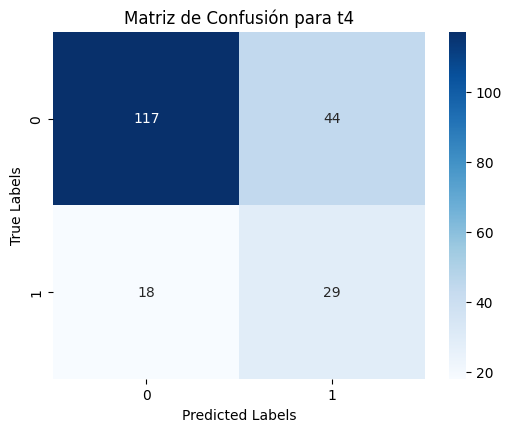

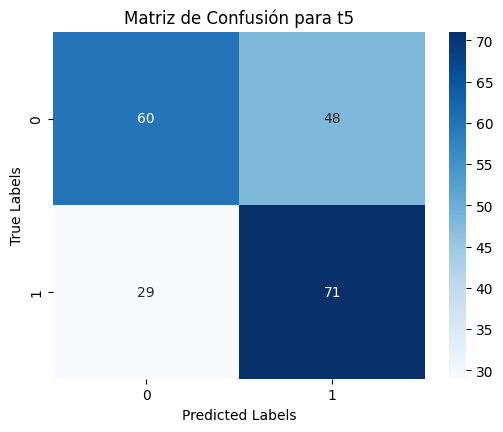

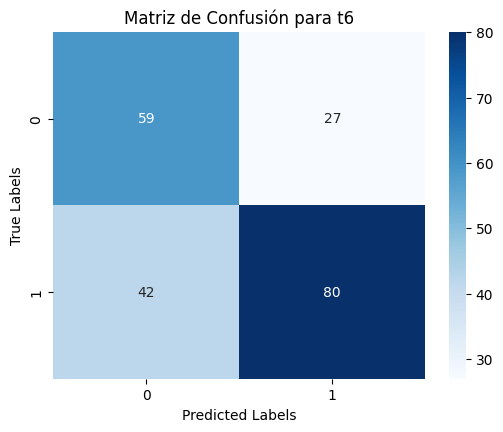

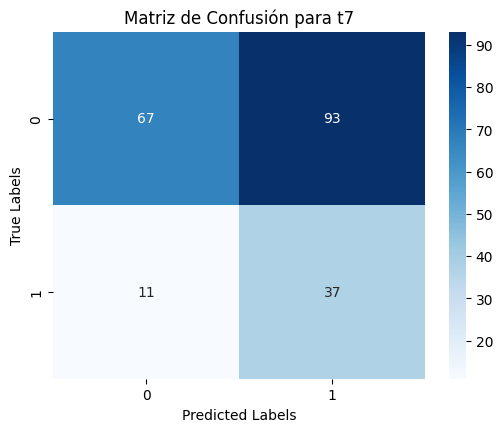

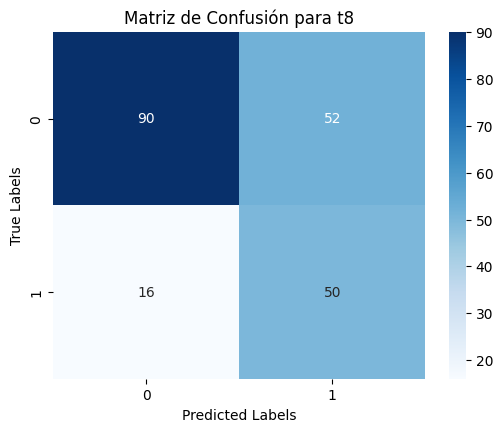

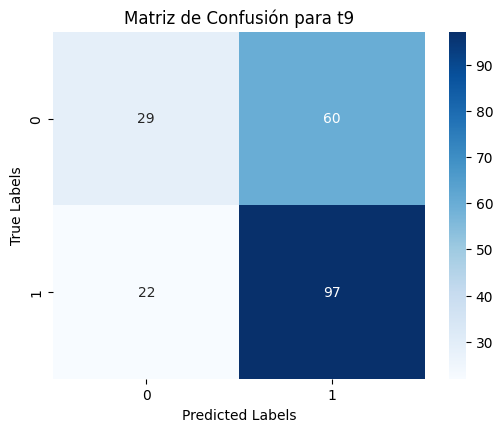

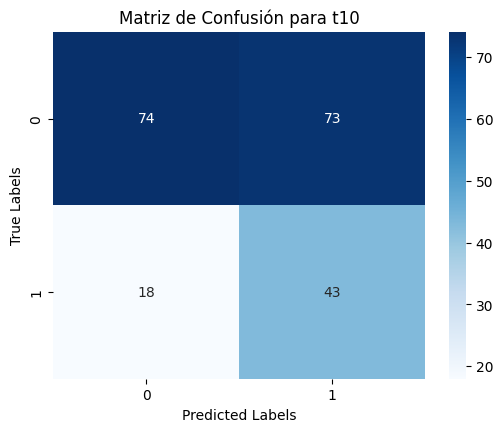

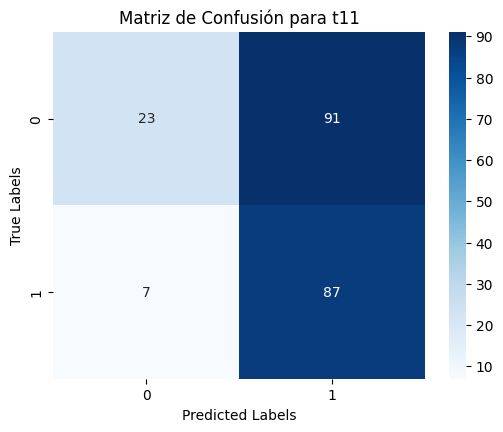

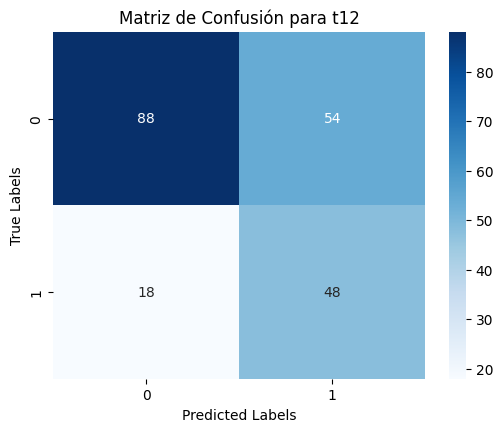

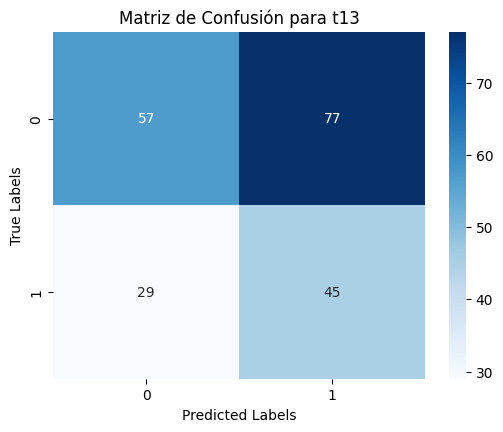

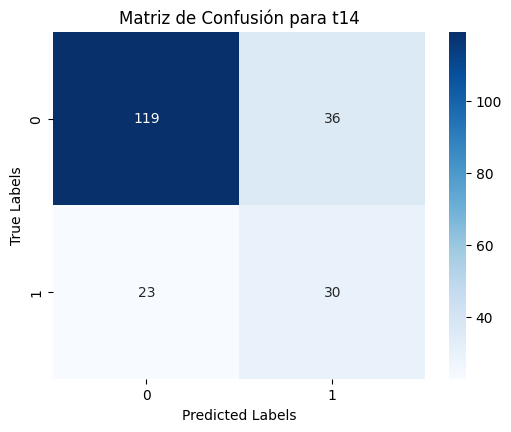

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

### Adaptación en Sklearn

Esta estrategia consiste en ajustar un clasificador por objetivo. Se trata de una estrategia sencilla para ampliar los clasificadores que no admiten de forma nativa la clasificación multi-etiqueta. Para ello, se usa la función `MultiOutputClassifier`

#### XGBClassifier

En primer lugar, vamos a probar a ampliar el modelo `XGBClassifier` para que se pueda usar como un modelo de clasificación con multi-etiqueta. Recordamos que XGBoost es un algortimo de boosting formado por una secuencia de árboles de decisión, donde cada árbol aprende de los errores cometidos por los árboles anteriores.

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
# Usamos el prefijo estimator__ para referirte a los parámetros del estimador interno (XGBClassifier)
param_dist = {
    "estimator__learning_rate": [0.01, 0.1, 0.3],  # Tasa de aprendizaje
    "estimator__n_estimators": [30, 50, 100],  # Número de estimadores (árboles)
    "estimator__max_depth": [2, 3],  # Profundidad máxima del árbol
    "estimator__subsample": [0.8, 1.0],  # Proporción de muestras para cada árbol
    "estimator__colsample_bytree": [0.8, 1.0],  # Proporción de columnas usadas por árbol
    "estimator__reg_alpha": [10, 15],  # Regularización L1 (Lasso)
    "estimator__reg_lambda": [10, 15],  # Regularización L2 (Ridge)
    "estimator__gamma": [0.1, 0.2, 0.3],  # Regularización para la reducción de la pérdida
}

# Definimos el modelo base: XGBClassifier
xgb_model = XGBClassifier()

# Envolvemos el clasificador en MultiOutputClassifier
multi_output_model = MultiOutputClassifier(xgb_model)

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=multi_output_model,
    param_distributions=param_dist,
    n_iter=20,  # Número de iteraciones aleatorias
    scoring=hamming_scorer,  # Métrica
    cv=5,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla
)

# Realizamos la búsqueda
random_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'estimator__subsample': 1.0, 'estimator__reg_lambda': 10, 'estimator__reg_alpha': 10, 'estimator__n_estimators': 50, 'estimator__max_depth': 3, 'estimator__learning_rate': 0.3, 'estimator__gamma': 0.3, 'estimator__colsample_bytree': 0.8}
Best score: -0.2843296195904233


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.243
Hamming Loss test:  0.28


Los valores obtenidos para el Hamming Loss son relativamente bajos, y además no distan mucho entre el conjunto de entrenamiento y el de prueba, por lo que el modelo no se está ajustando demasiado.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.030084235860409144
Score test: 0.014423076923076924


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.7567474643286918
Mean accuracy test: 0.720467032967033


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.607
F1-score (macro): 0.484
F1-score (weighted): 0.548
F1-score (samples): 0.579

Test set F1-scores:
F1-score (micro): 0.548
F1-score (macro): 0.405
F1-score (weighted): 0.483
F1-score (samples): 0.505


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Vemos que los valores del F1-score son algo elevados, aunque son un poco mayores en el conjunto de entrenamiento que en el de prueba. Sin embargo, esta diferencia no es demasiado grande, mostrando que no hay mucho overfitting.

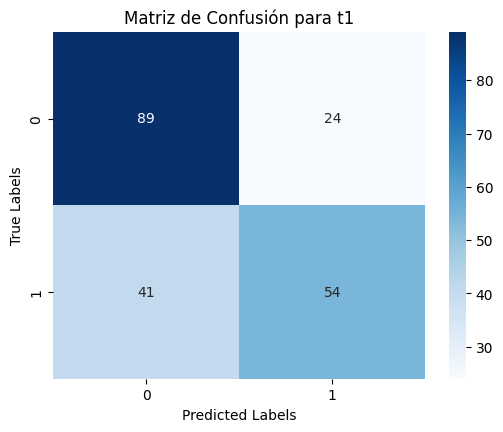

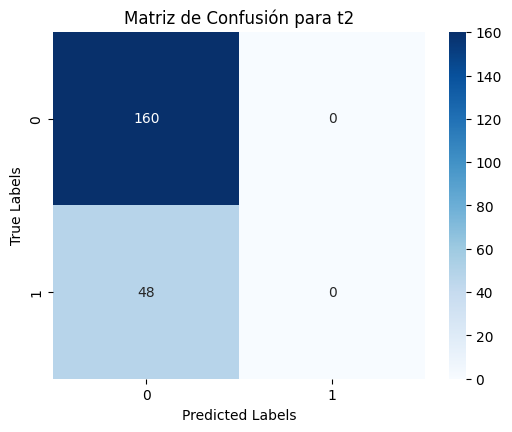

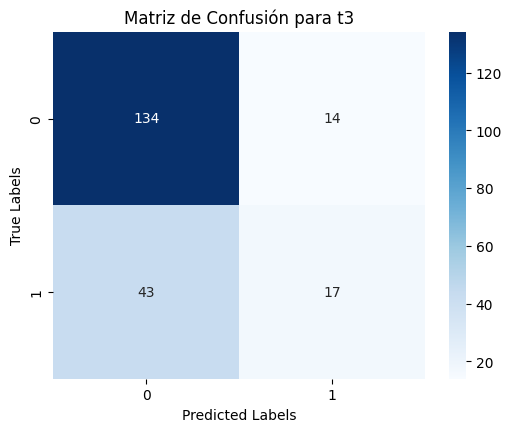

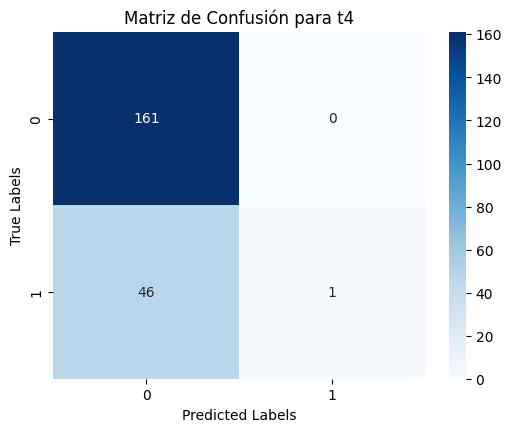

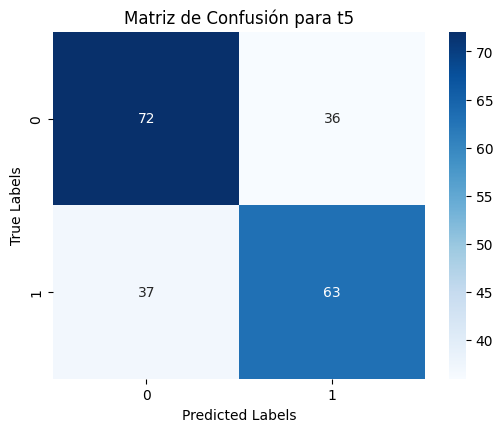

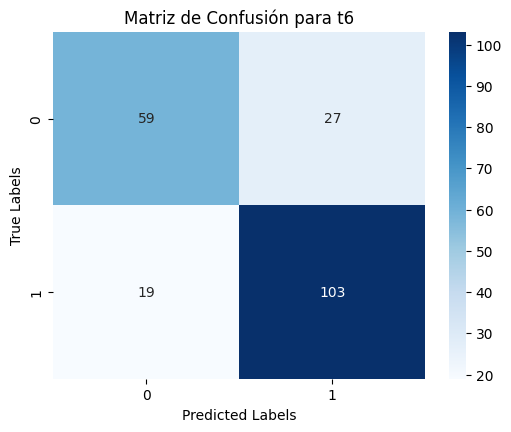

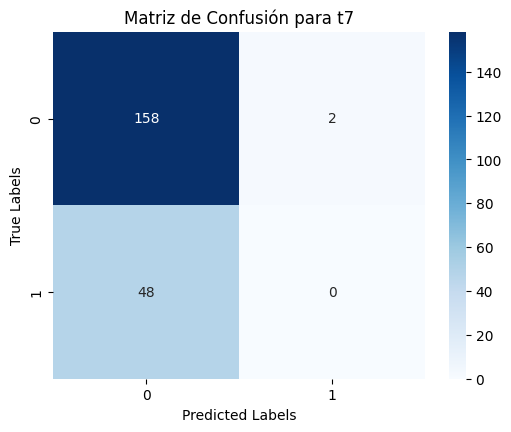

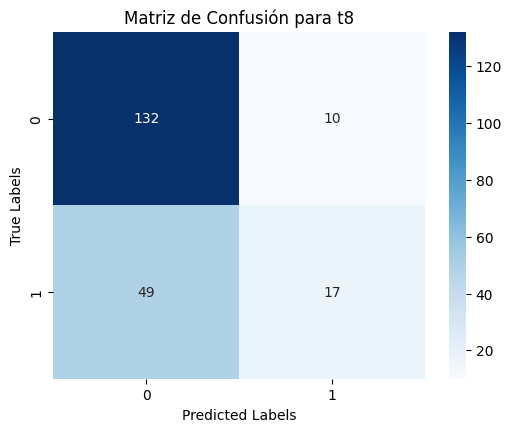

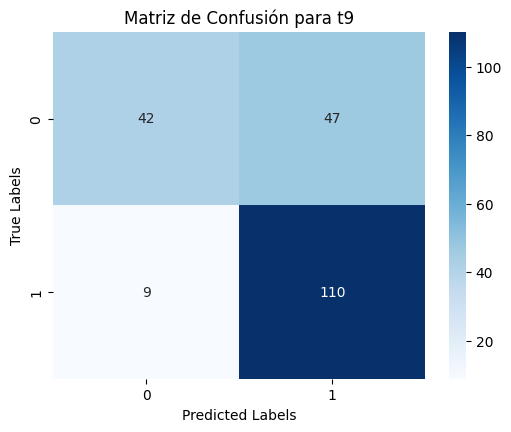

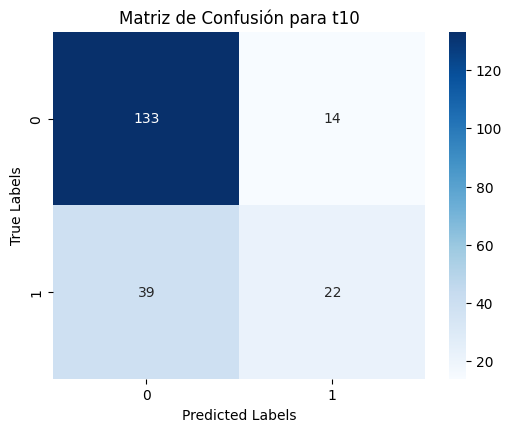

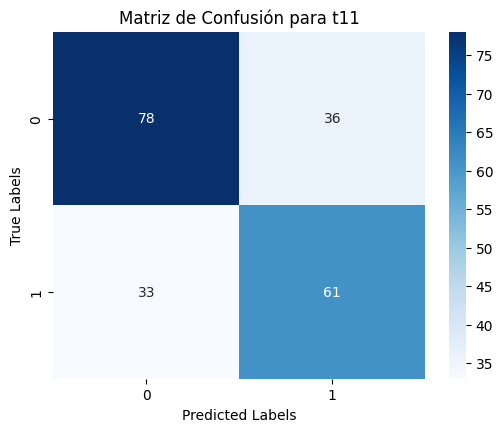

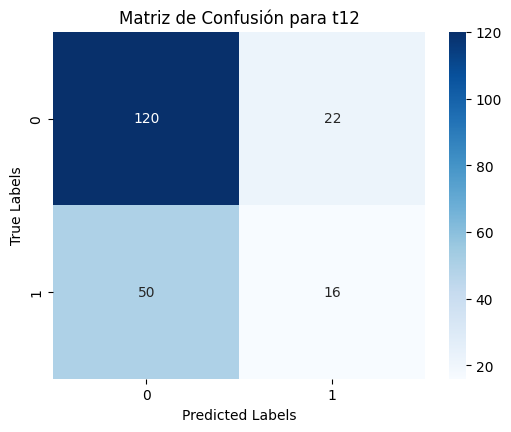

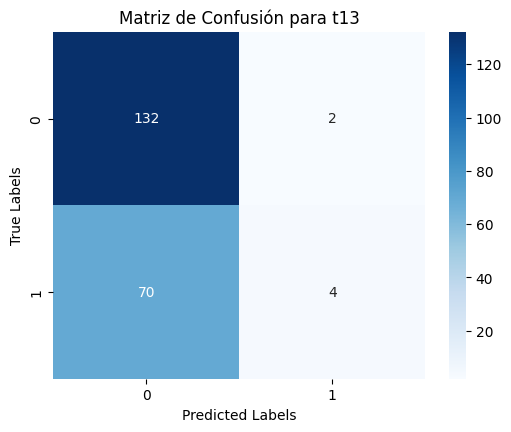

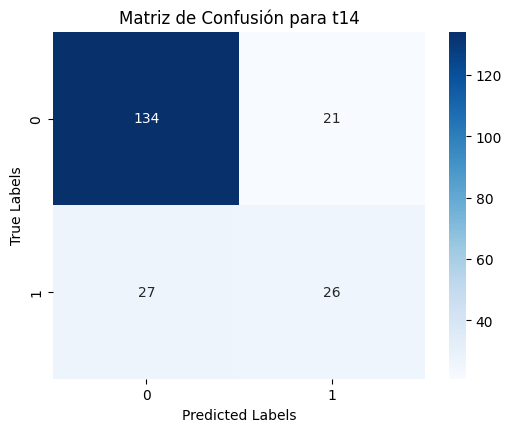

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

#### LinearSVC

A continuación vamos a probar a usar la función `MultiOutputClassifier` para poder aplicar el modelo `LinearSVC` con multi-etiqueta, ya que este modelo por defecto no permite hacer clasificación multi-label.

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_dist = {
    "estimator__C": [0.01, 0.1, 1, 10, 100],  # Coeficiente de regularización
    "estimator__loss": ["hinge", "squared_hinge"],  # Tipo de función de pérdida
    "estimator__tol": [1e-4, 1e-3, 1e-2],  # Tolerancia para la convergencia
    "estimator__max_iter": [1000, 5000, 10000],  # Número máximo de iteraciones
}

# Definimos el modelo base: LinearSVC
svc_model = LinearSVC()

# Envolvemos el clasificador en MultiOutputClassifier
multi_output_model = MultiOutputClassifier(svc_model)

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=multi_output_model,
    param_distributions=param_dist,
    n_iter=30,  # Número de iteraciones aleatorias
    scoring=hamming_scorer,  # Métrica personalizada
    cv=5,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla  # Semilla para reproducibilidad
)

# Realizamos la búsqueda
random_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best parameters: {'estimator__tol': 0.0001, 'estimator__max_iter': 1000, 'estimator__loss': 'squared_hinge', 'estimator__C': 0.01}
Best score: -0.297476990940666


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.284
Hamming Loss test:  0.292


Observamos que los valores de Hamming Loss no son muy elevados, y además no hay mucha diferencia entre el conjunto de entrenamiento y el de prueba, por lo que el modelo no sesobreajusta a los datos.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.015643802647412757
Score test: 0.014423076923076924


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.7156609936393331
Mean accuracy test: 0.707760989010989


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.529
F1-score (macro): 0.438
F1-score (weighted): 0.488
F1-score (samples): 0.493

Test set F1-scores:
F1-score (micro): 0.514
F1-score (macro): 0.408
F1-score (weighted): 0.469
F1-score (samples): 0.474


De nuevo, observamos que no hay overfitting, pues los valores del F1-score en el conjunto de entrenamiento no se diferencian mucho de los del conjunto de prueba.

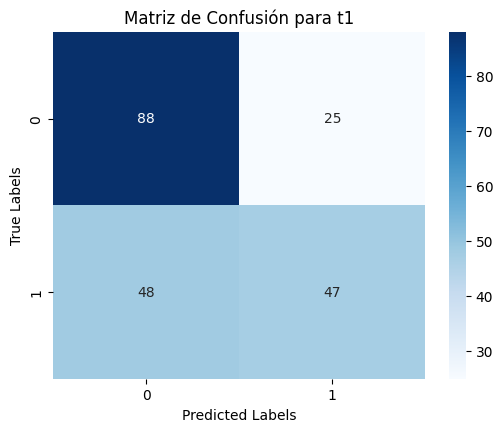

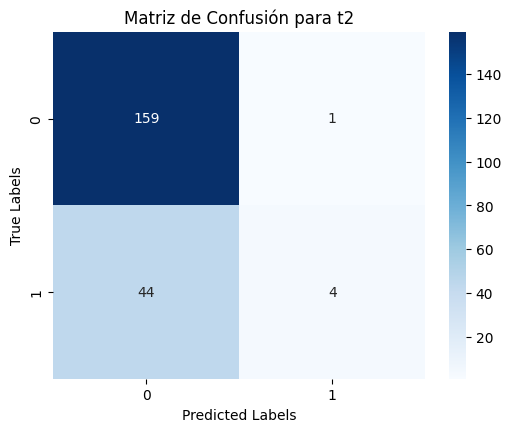

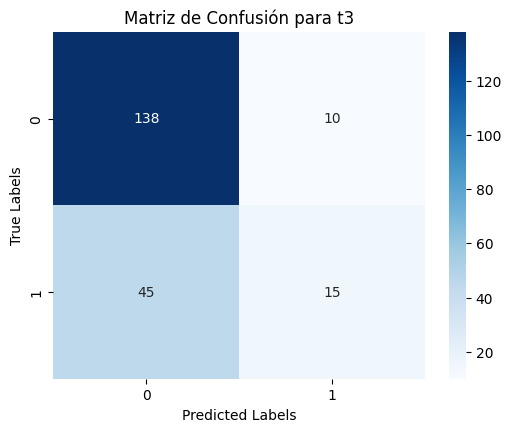

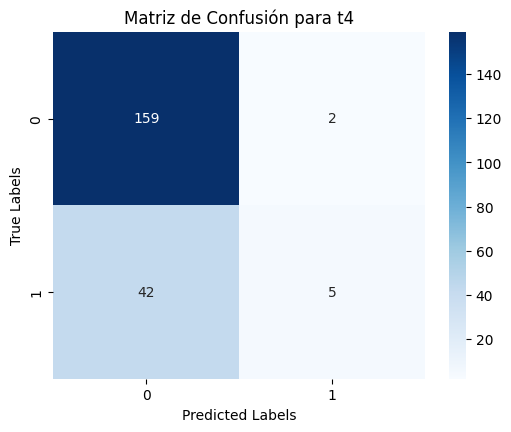

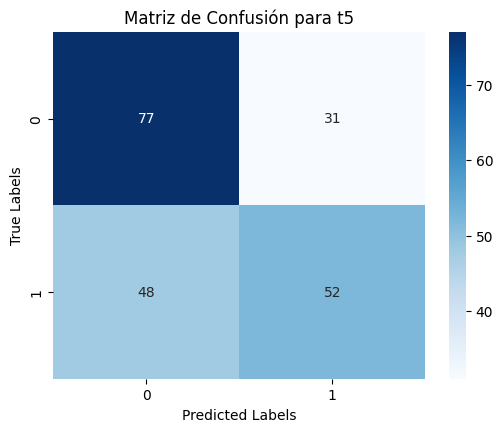

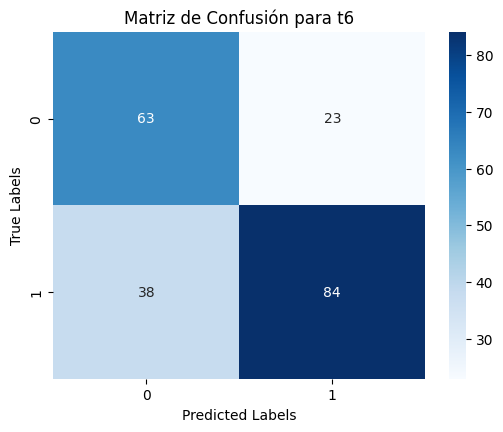

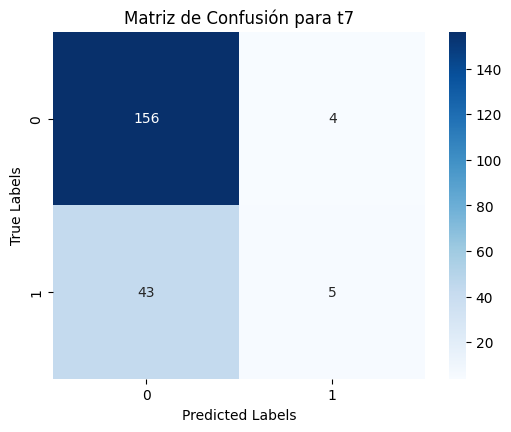

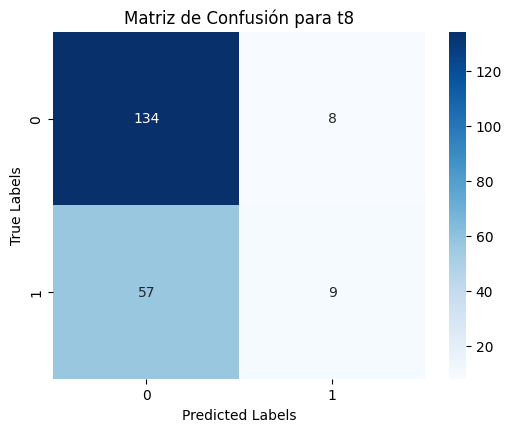

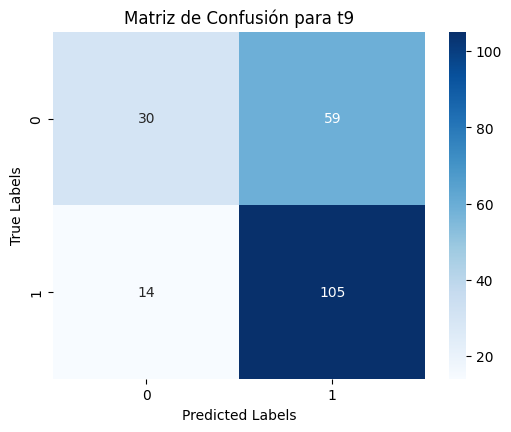

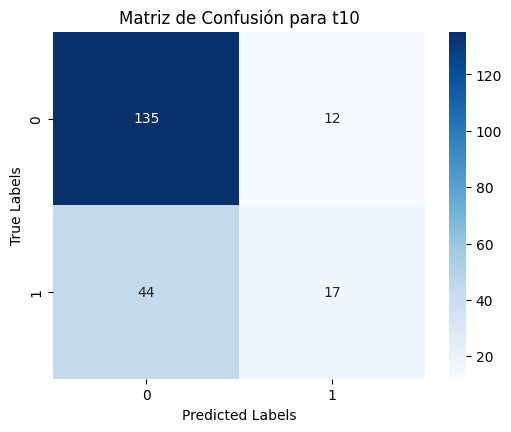

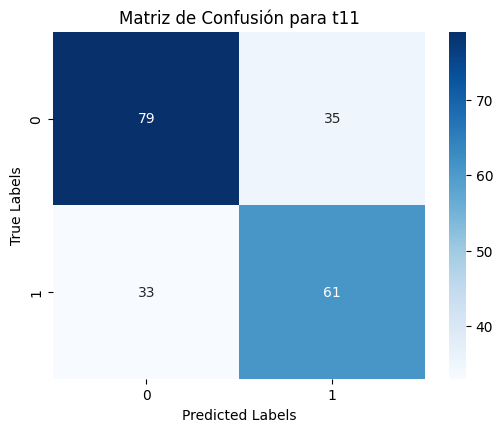

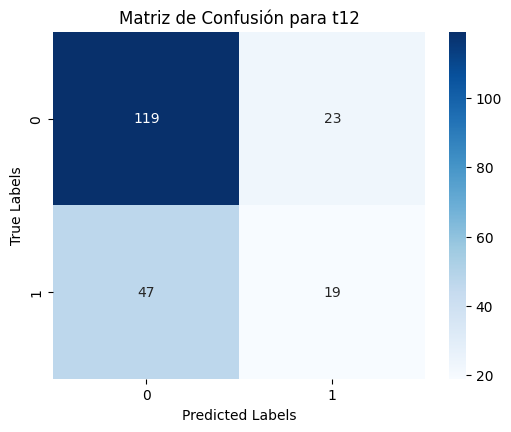

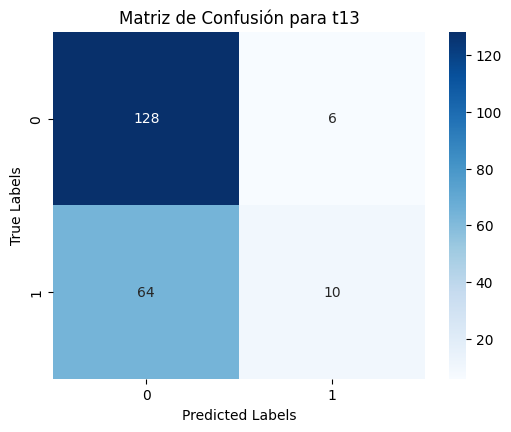

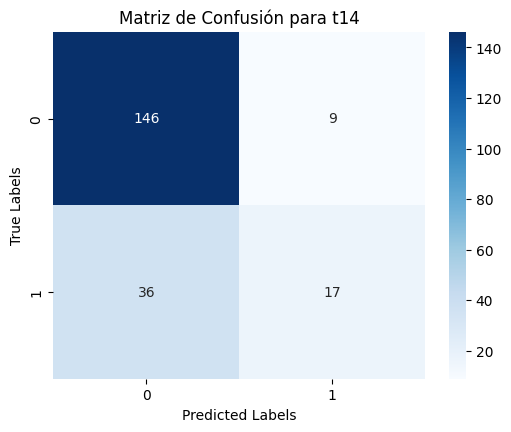

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

Probamos de nuevo, esta vez usando el parámetro `class_weight="balanced"` para que el modelo tenga en cuenta el desbalanceo de los datos.

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_dist = {
    "estimator__C": [0.01, 0.1, 1, 10, 100],  # Coeficiente de regularización
    "estimator__loss": ["hinge", "squared_hinge"],  # Tipo de función de pérdida
    "estimator__tol": [1e-4, 1e-3, 1e-2],  # Tolerancia para la convergencia
    "estimator__max_iter": [1000, 5000, 10000],  # Número máximo de iteraciones
}

# Definimos el modelo base: LinearSVC
svc_model = LinearSVC(class_weight="balanced")

# Envolvemos el clasificador en MultiOutputClassifier
multi_output_model = MultiOutputClassifier(svc_model)

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=multi_output_model,
    param_distributions=param_dist,
    n_iter=30,  # Número de iteraciones aleatorias
    scoring=hamming_scorer,  # Métrica personalizada
    cv=5,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla  # Semilla para reproducibilidad
)

# Realizamos la búsqueda
random_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best parameters: {'estimator__tol': 0.01, 'estimator__max_iter': 10000, 'estimator__loss': 'hinge', 'estimator__C': 10}
Best score: -0.3435487029383574


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
Y_train_pred = best_model.predict(X_train_scaled)
Y_test_pred = best_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.323
Hamming Loss test:  0.345


Los valores de Hamming Loss empeoran un poco respecto del modelo anterior, aunque tampoco parece que haya overfitting.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model.score(X_test_scaled, Y_test))

Score train: 0.012033694344163659
Score test: 0.004807692307692308


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.6766374419804022
Mean accuracy test: 0.6552197802197802


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.596
F1-score (macro): 0.583
F1-score (weighted): 0.604
F1-score (samples): 0.555

Test set F1-scores:
F1-score (micro): 0.572
F1-score (macro): 0.563
F1-score (weighted): 0.581
F1-score (samples): 0.524


Los valores de F1-score son algo mejores que en el anterior modelo, ya que al usar `class_weight="balanced"` se mejora el recall de las clases minoritarias sin sacrificar demasiado la precisión:
    
$$ F1 = 2 \cdot \frac{Precisión \cdot Recall}{Precisión + Recall} $$

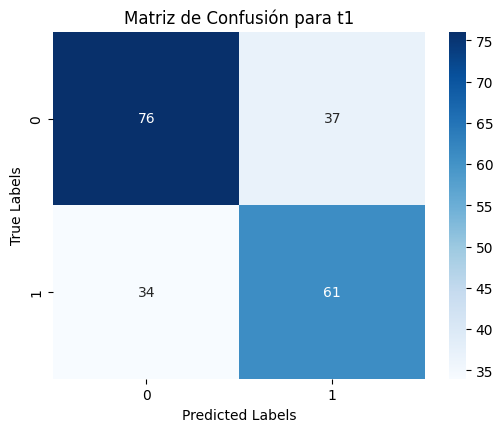

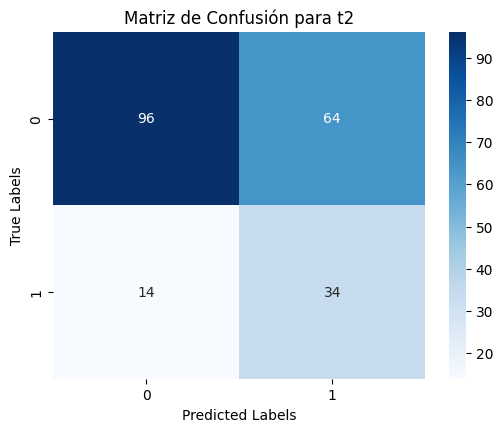

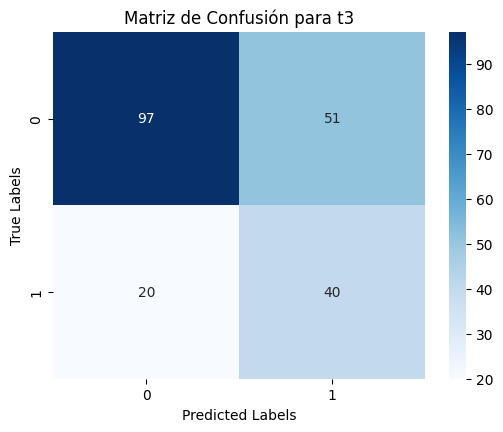

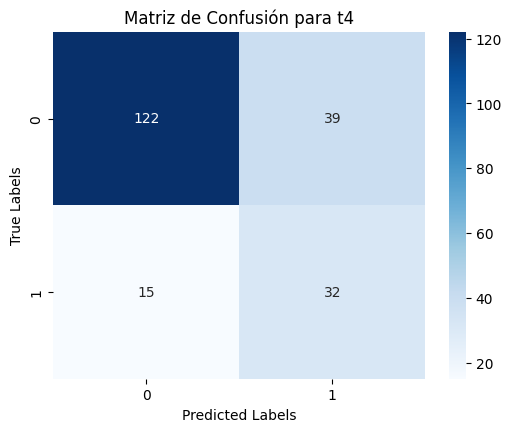

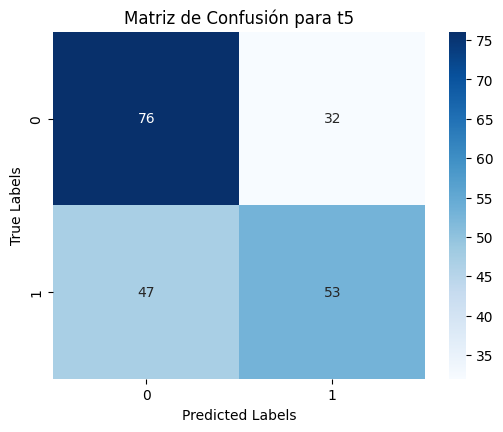

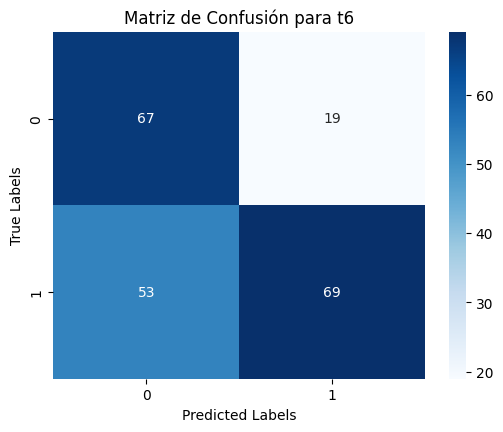

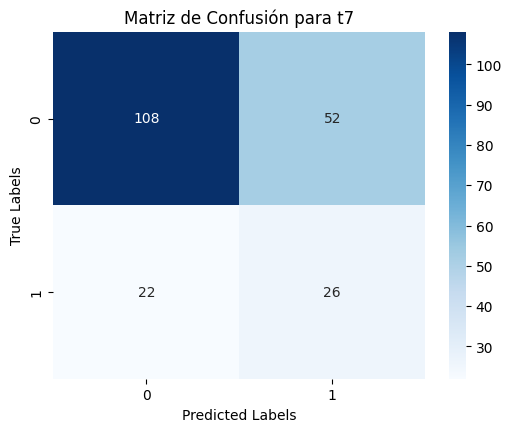

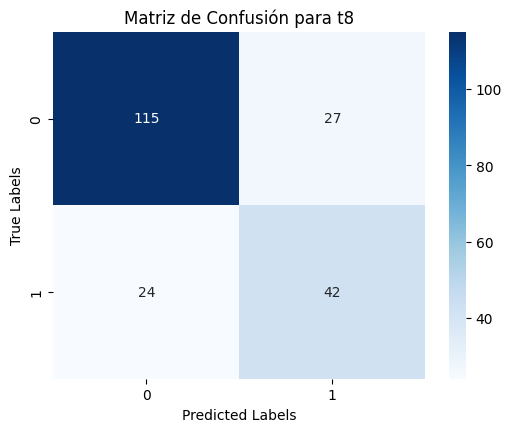

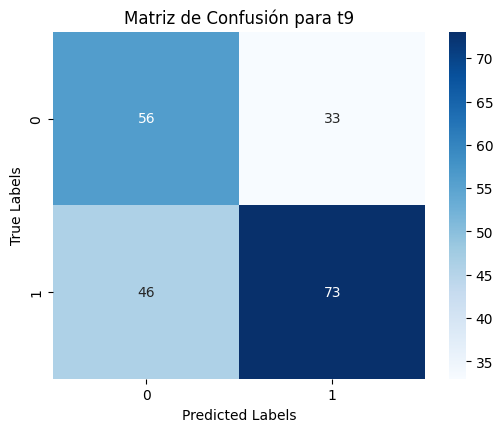

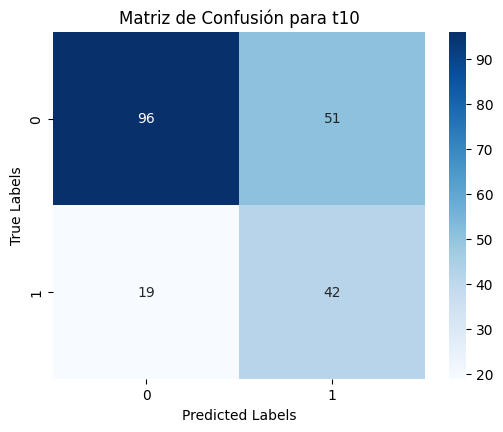

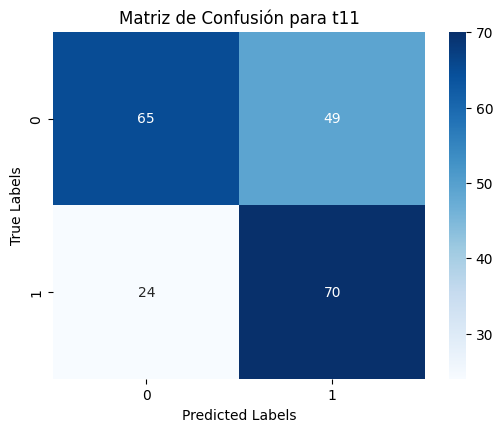

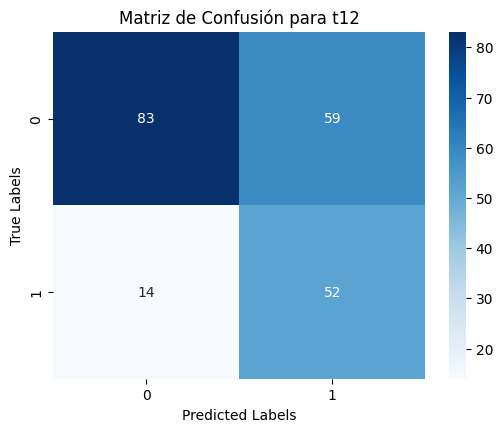

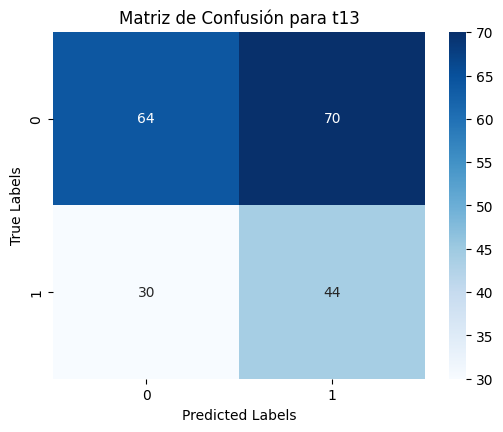

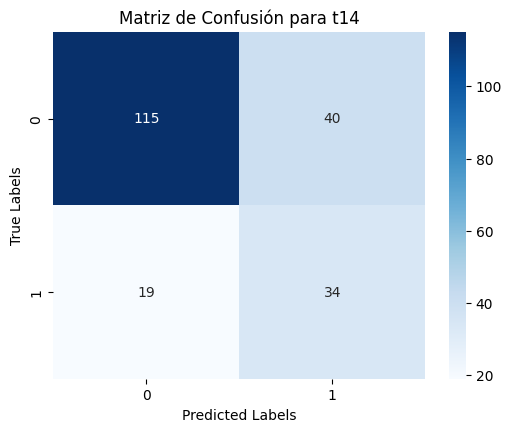

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

#### BaggingClassifier

A continuación, vamos a probar la función `MultiOutputClassifier` para poder utilizar el modelo `BaggingClassifier` en clasificación con multi-etiqueta. Tomamos una profundidad máxima de los árboles de $2$ para evitar el overfitting. Viendo que en los anteriores modelos con árboles de decisión nos ha perjudicado el hecho de que los datos estuvieran desbalanceados, en este caso vamos a usar directamente el parámetro `class_weight="balanced"`.

In [ ]:
# Definimos los rangos de los parámetros para la búsqueda aleatoria
param_dist = {
    "estimator__n_estimators": [30, 50, 100],  # Número de estimadores (árboles)
    "estimator__max_samples": [0.8, 1.0],  # Proporción de muestras para cada estimador
    "estimator__max_features": [0.8, 1.0],  # Proporción de características para cada estimador
    "estimator__bootstrap": [True, False],  # Si usar muestras con o sin reemplazo
    "estimator__n_jobs": [-1],  # Usar todos los núcleos disponibles
}

# Definimos el modelo base: DecisionTreeClassifier
tree_model = DecisionTreeClassifier(class_weight="balanced", max_depth=2)  # Puedes elegir otro clasificador

# Envolvemos el clasificador base en BaggingClassifier
bagging_model = BaggingClassifier(estimator=tree_model)

# Ahora lo envolvemos en MultiOutputClassifier para el caso de multi-etiqueta
multi_output_model = MultiOutputClassifier(bagging_model)

# Creamos un scoring personalizado con Hamming Loss (más adecuado para multi-label)
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Configuramos RandomizedSearchCV
random_cv = RandomizedSearchCV(
    estimator=multi_output_model,
    param_distributions=param_dist,
    n_iter=10,  # Número de iteraciones aleatorias
    scoring=hamming_scorer,  # Métrica personalizada
    cv=3,  # Número de particiones para validación cruzada
    verbose=1,
    random_state=semilla  # Semilla para reproducibilidad
)

# Realizamos la búsqueda
random_cv.fit(X_train_scaled, Y_train)

# Mejor modelo y parámetros
best_model_bag = random_cv.best_estimator_
print("Best parameters:", random_cv.best_params_)
print("Best score:", random_cv.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'estimator__n_jobs': -1, 'estimator__n_estimators': 100, 'estimator__max_samples': 0.8, 'estimator__max_features': 1.0, 'estimator__bootstrap': True}
Best score: -0.3396080453842187


In [ ]:
Y_train_pred = best_model_bag.predict(X_train_scaled)
Y_test_pred = best_model_bag.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.316
Hamming Loss test:  0.339


En base a los valores de Hamming Loss obtenidos, no parece haber overfitting, ya que son muy similares en el conjunto de entrenamiento y el de prueba.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", best_model_bag.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", best_model_bag.score(X_test_scaled, Y_test))

Score train: 0.013237063778580024
Score test: 0.004807692307692308


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train, Y_train_pred))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test, Y_test_pred))

Mean accuracy train: 0.6835138387484958
Mean accuracy test: 0.6610576923076923


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.634
F1-score (macro): 0.619
F1-score (weighted): 0.643
F1-score (samples): 0.607

Test set F1-scores:
F1-score (micro): 0.609
F1-score (macro): 0.583
F1-score (weighted): 0.620
F1-score (samples): 0.566


Con este modelo se obtienen valores relativamente elevados de F1-score, y además son muy similares en el conjunto de entrenamiento y en el de prueba, mostrando que no hay a penas overfitting.

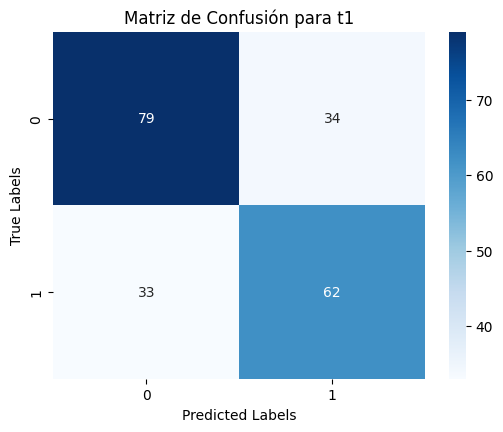

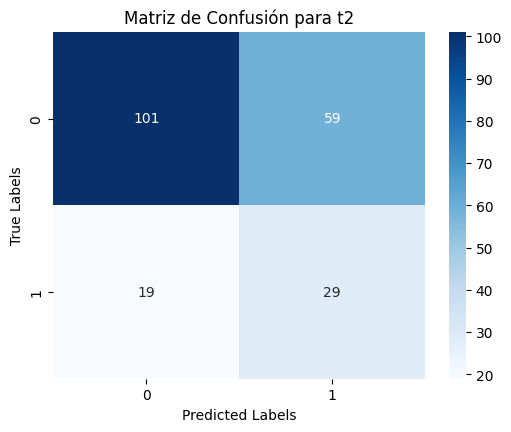

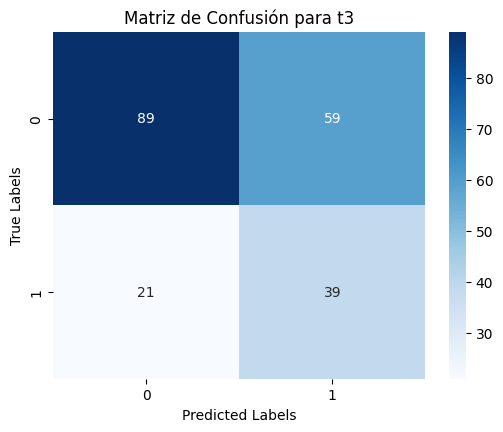

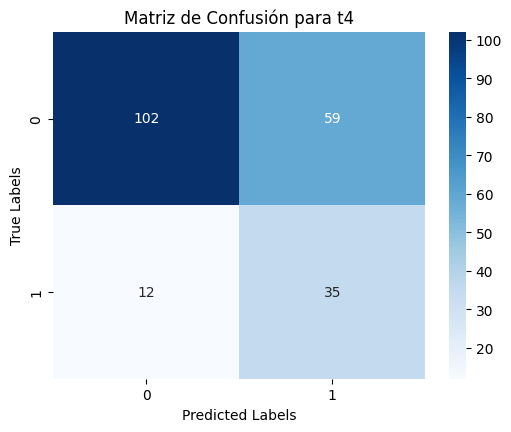

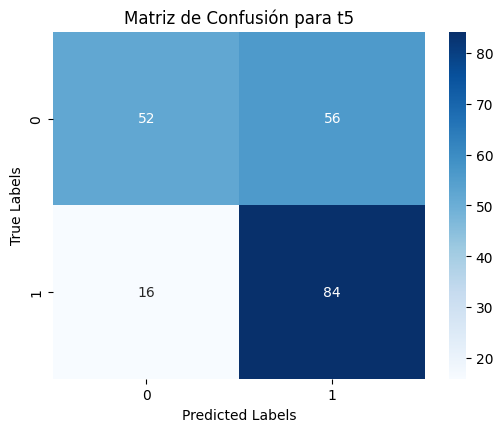

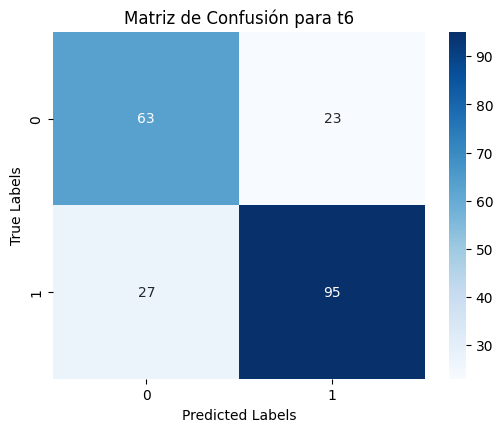

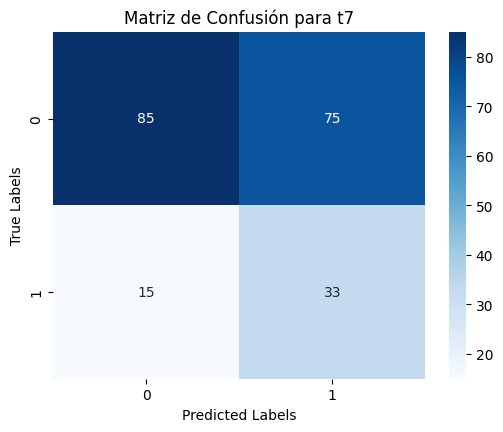

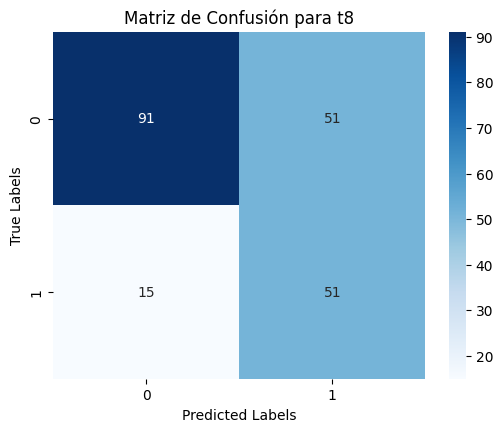

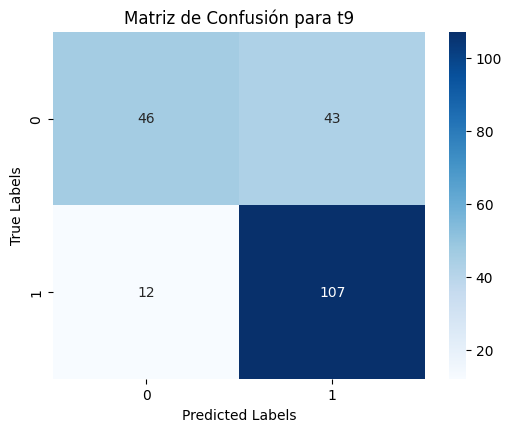

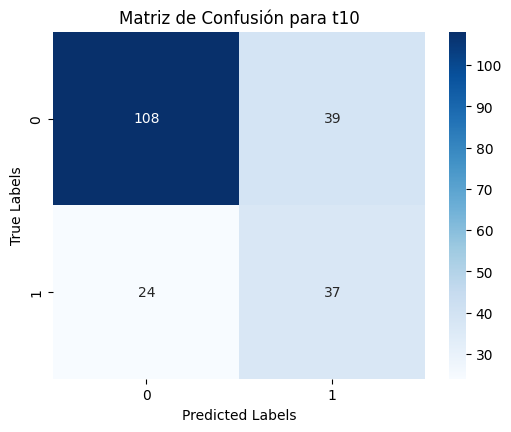

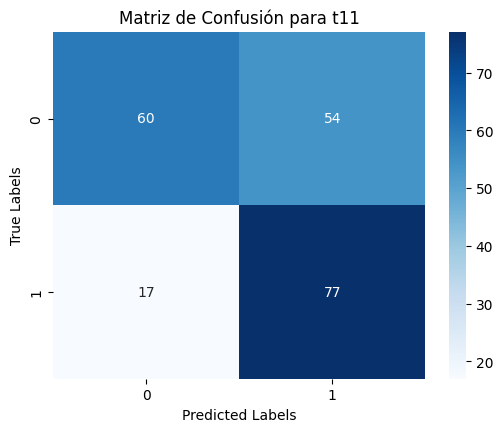

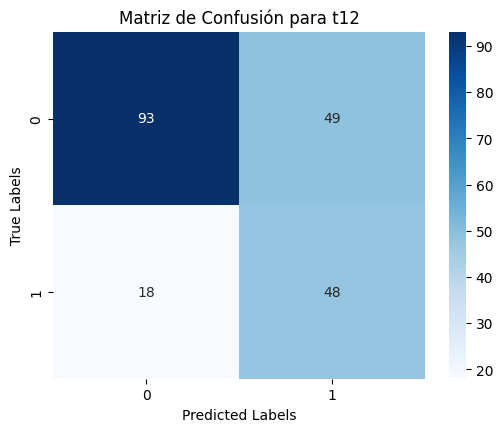

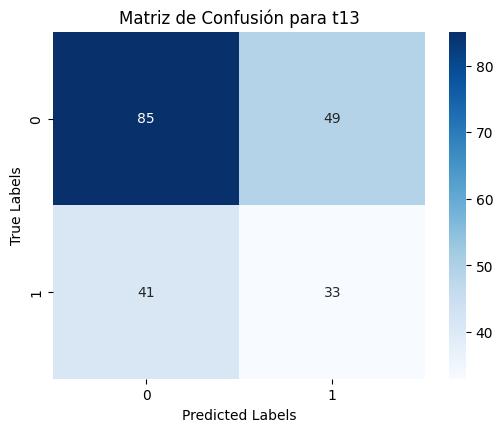

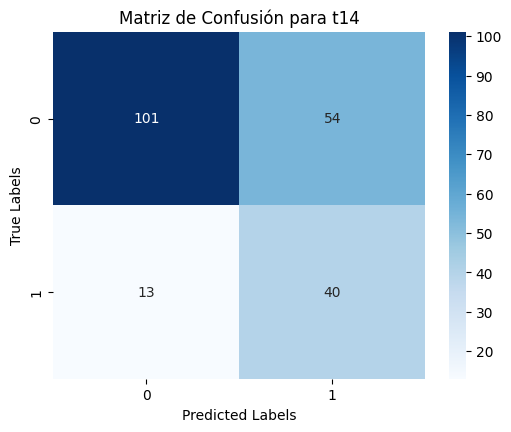

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

Mirando las matrices de confusión obtenidas, se observa que las predicciones de ambas clases no están demasiado desbalanceadas

### Enfoques de transformación

El enfoque de transformación de problemas para la clasificación multietiqueta convierte los problemas multietiqueta en problemas de etiqueta única: clase binaria o multiclase.

- BinaryRelevance: trata cada etiqueta como un problema de clasificación de clase única independiente
- ClassifierChain: trata cada etiqueta como parte de una cadena condicionada de problemas de clasificación de clase única
- LabelPowerset: trata cada combinación de etiquetas como una clase independiente con un problema de clasificación multiclase.

En los anteriores apartados, hemos visto que el modelo `ExtraTreesClassifier` con el parámetro `class_weight = 'balanced'` para manejar datos desbalanceados ha dado buenos resultados. Por ello, a continuación vamos a probar los distintos enfoques de transformación con este modelo.

In [ ]:
# Convertir DataFrame a numpy.ndarray (necesario con la libreria skmultilearn)
X_train_array = X_train_scaled.to_numpy()
Y_train_array = Y_train.to_numpy()
X_test_array = X_test_scaled.to_numpy()
Y_test_array = Y_test.to_numpy()

#### BinaryRelevance

Comenzamos aplicando la transformación `BinaryRelevance` al modelo `ExtraTreesClassifier`, modificando un poco los parámetros optimizados previamente durante la búsqueda de hiperparámetros para evitar overfitting, y ajustando el parámetro `class_weight = 'balanced'` para manejar desbalances en las clases.

In [ ]:
new_model_et = ExtraTreesClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 5,
                                    max_depth= 4, criterion= 'gini', class_weight = 'balanced', random_state = semilla)

# Envolvemos ExtraTreesClassifier en BinaryRelevance
br_model= BinaryRelevance(classifier=new_model_et, require_dense=[False, True])

# Entrenamos el modelo
br_model.fit(X_train_array, Y_train_array)

BinaryRelevance(classifier=ExtraTreesClassifier(class_weight='balanced',
                                                max_depth=4, min_samples_leaf=5,
                                                min_samples_split=10,
                                                random_state=123),
                require_dense=[False, True])

In [ ]:
Y_train_pred = br_model.predict(X_train_scaled)
Y_test_pred = br_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.304
Hamming Loss test:  0.343


El uso de `BinaryRelevance` mejora el rendimiento del modelo `ExtraTreesClassifier` al reducir la Hamming Loss tanto en el conjunto de entrenamiento como en el conjunto de prueba. Esto sugiere que la transformación `BinaryRelevance` ayuda a manejar mejor la clasificación multi-etiqueta, logrando una clasificación más precisa en ambas fases.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", br_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", br_model.score(X_test_scaled, Y_test))

Score train: 0.021660649819494584
Score test: 0.004807692307692308


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train_array, Y_train_pred.toarray()))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test_array, Y_test_pred.toarray()))

Mean accuracy train: 0.6958913529310641
Mean accuracy test: 0.6565934065934065


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.645
F1-score (macro): 0.630
F1-score (weighted): 0.651
F1-score (samples): 0.609

Test set F1-scores:
F1-score (micro): 0.603
F1-score (macro): 0.582
F1-score (weighted): 0.615
F1-score (samples): 0.554


El uso de `BinaryRelevance` mejora los F1-scores en el conjunto de prueba, lo que indica una mayor precisión y equilibrio en la clasificación de las etiquetas, a pesar de que en el conjunto de entrenamiento, los resultados son similares, lo que podría sugerir que este modelo presenta un menor sobreajuste que el modelo sin usar `BinaryRelevance`.

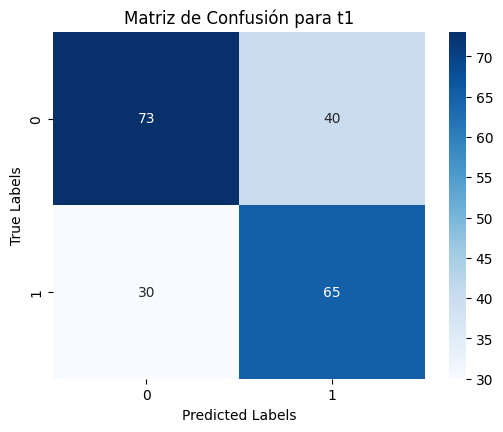

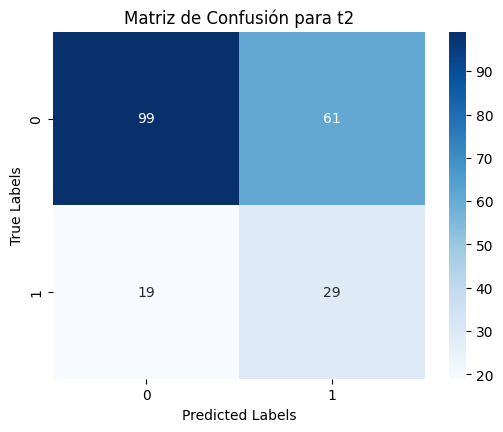

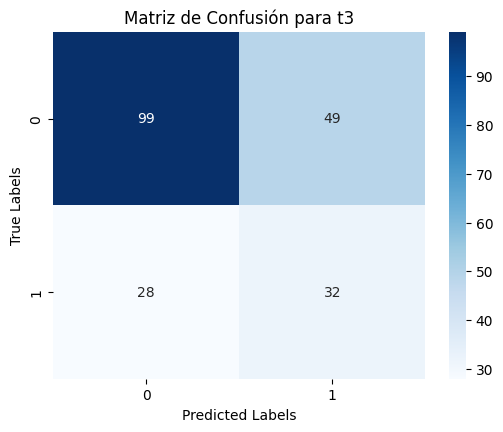

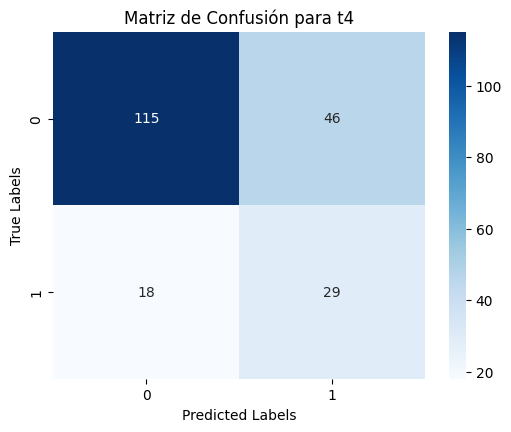

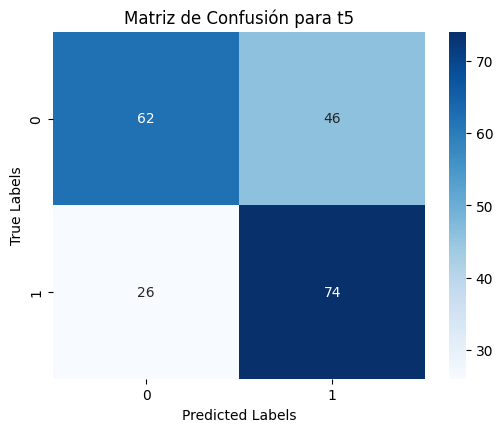

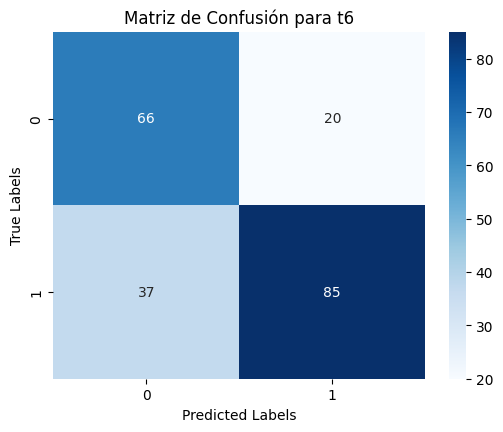

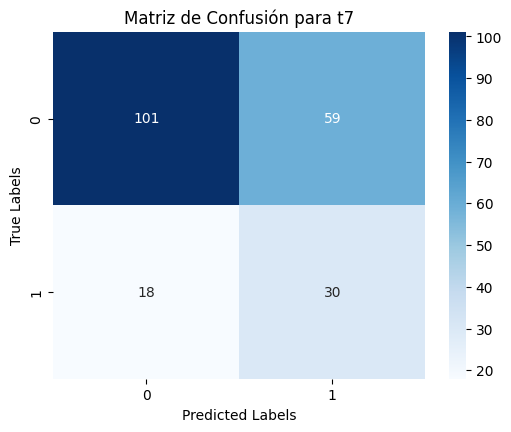

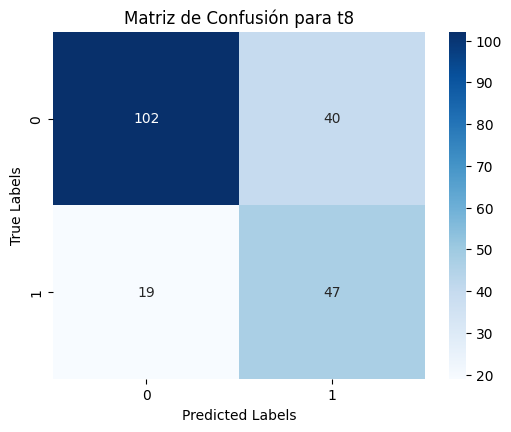

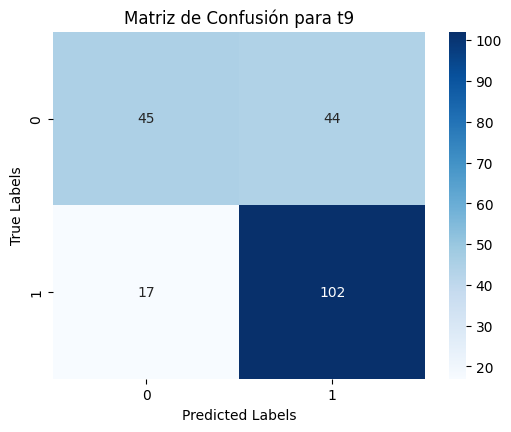

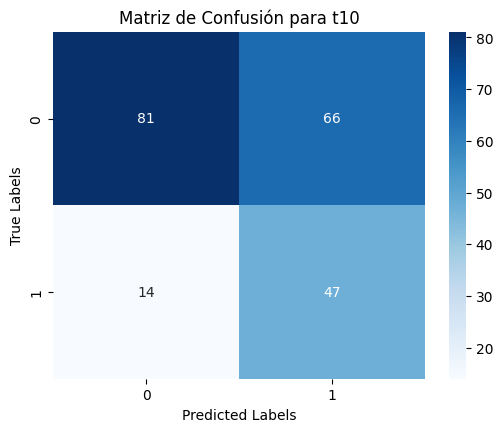

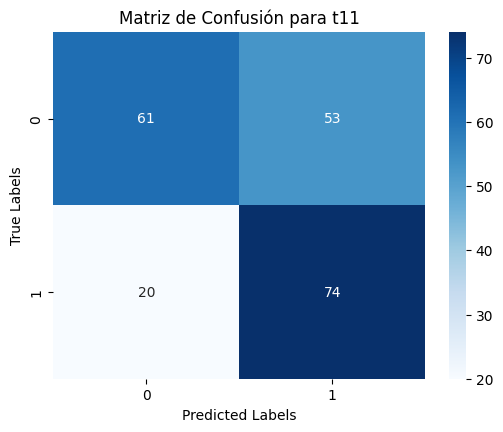

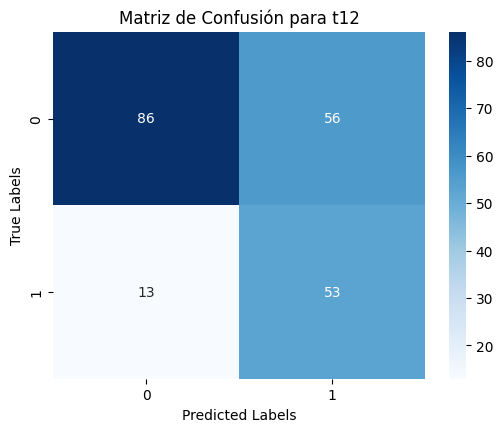

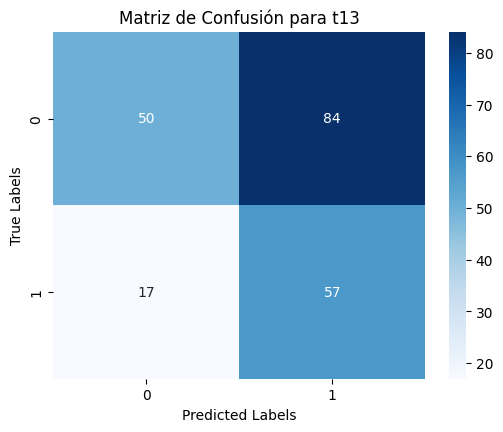

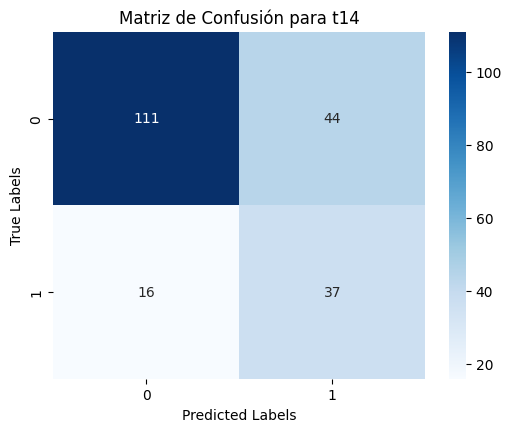

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred.toarray()[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

#### ClassifierChain

A continuación, aplicamos la transformación `ClassifierChain` al modelo `ExtraTreesClassifier`, modificando de nuevo los parámetros ya optimizados para evitar overfitting, y ajustando el parámetro `class_weight = 'balanced'` para manejar el desbalanceo de las clases.

In [ ]:
new_model_et = ExtraTreesClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2,
                                    max_depth= 4, criterion= 'gini', class_weight = 'balanced', random_state = semilla)

# Envolvemos ExtraTreesClassifier en ClassifierChain
cc_model = ClassifierChain(classifier=new_model_et, require_dense=[False, True])

# Entrenamos el modelo
cc_model.fit(X_train_array, Y_train_array)

ClassifierChain(classifier=ExtraTreesClassifier(class_weight='balanced',
                                                max_depth=4, min_samples_leaf=2,
                                                min_samples_split=10,
                                                random_state=123),
                require_dense=[False, True])

In [ ]:
Y_train_pred = cc_model.predict(X_train_scaled)
Y_test_pred = cc_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.347
Hamming Loss test:  0.369


Los valores obtenidos de Hamming Loss muestran que no hay mucho overfitting, y que mejoran un poco respecto de no usar `ClassifierChain`, especialmente en el conjunto de prueba.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", cc_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", cc_model.score(X_test_scaled, Y_test))

Score train: 0.02045728038507822
Score test: 0.004807692307692308


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train_array, Y_train_pred.toarray()))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test_array, Y_test_pred.toarray()))

Mean accuracy train: 0.6528279181708785
Mean accuracy test: 0.6308379120879122


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.609
F1-score (macro): 0.597
F1-score (weighted): 0.621
F1-score (samples): 0.567

Test set F1-scores:
F1-score (micro): 0.583
F1-score (macro): 0.566
F1-score (weighted): 0.597
F1-score (samples): 0.524


En este caso, al comparar el rendimiento de `ExtraTreesClassifier` con y sin `ClassifierChain`, se observa que la Hamming Loss del conjunto de entrenamiento empeora al utilizar `ClassifierChain`, pero mejora en el conjunto de prueba, lo cual es una indicación de que ha disminuido el overfitting.

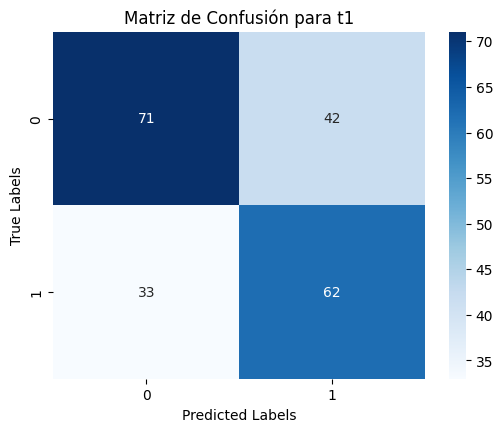

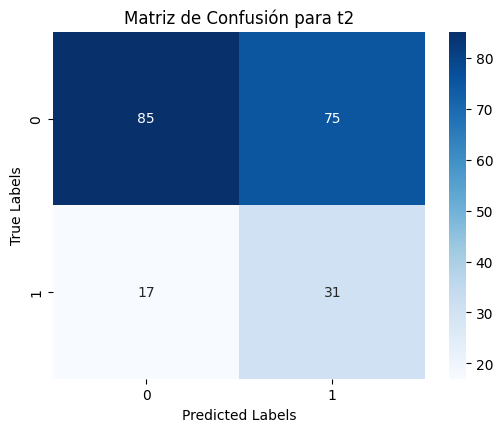

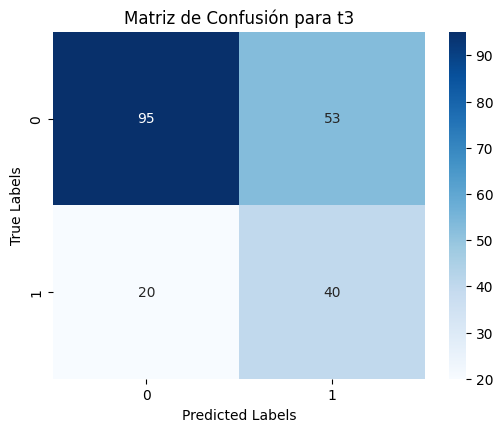

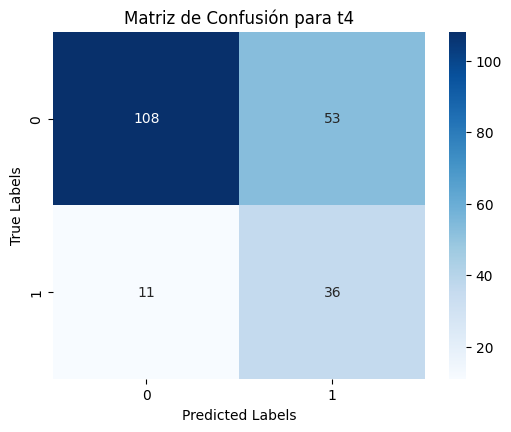

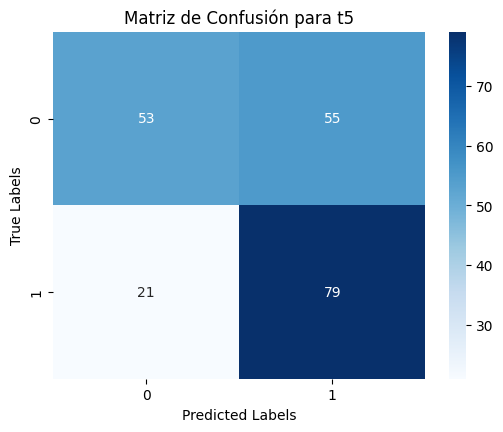

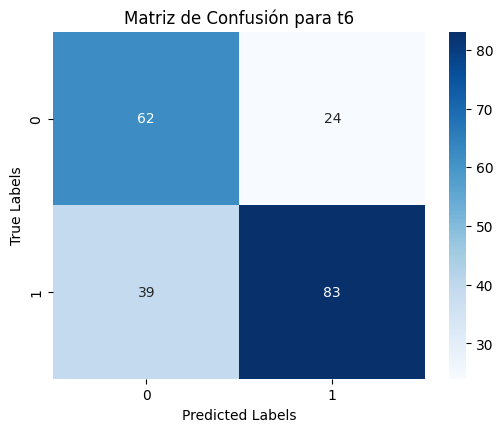

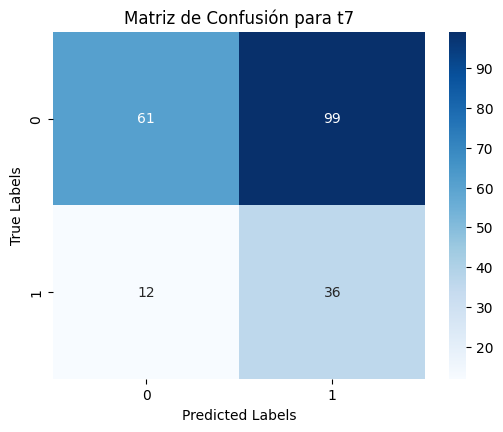

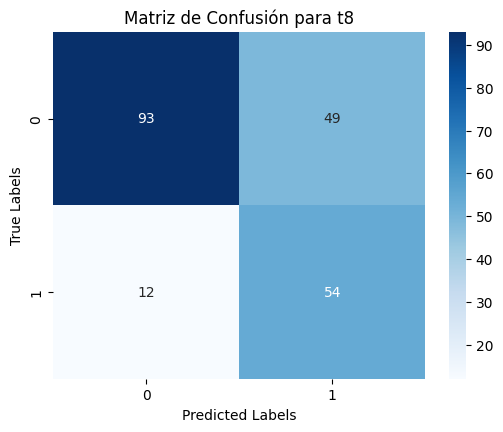

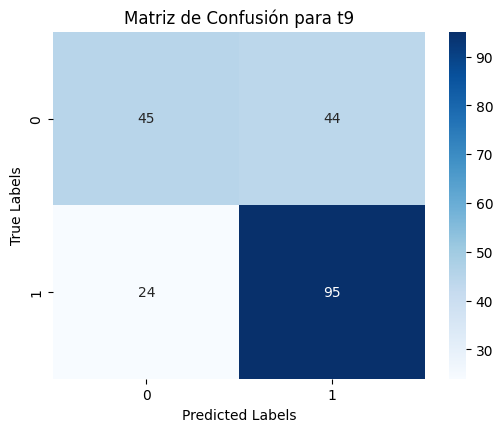

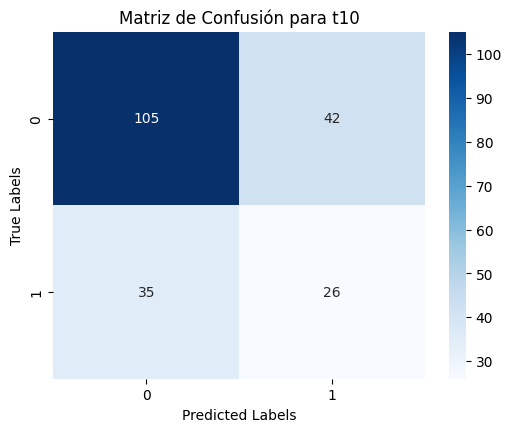

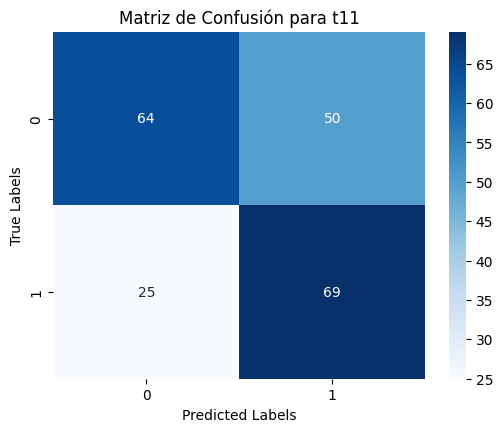

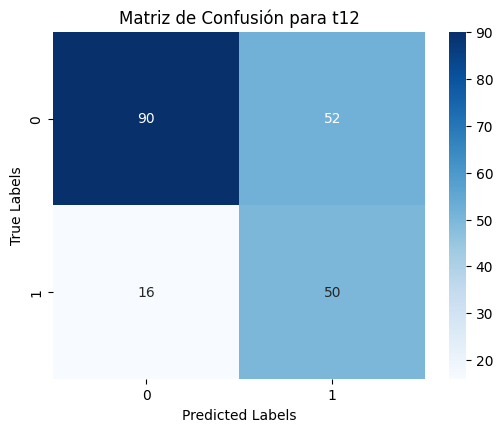

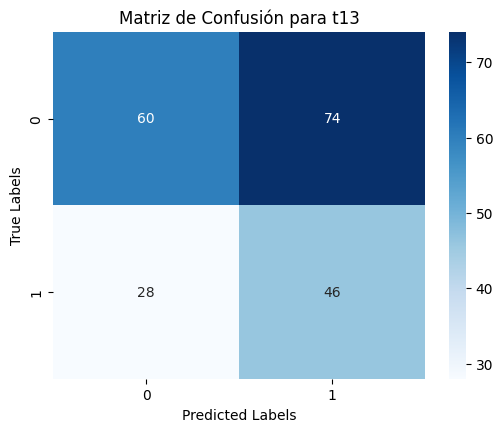

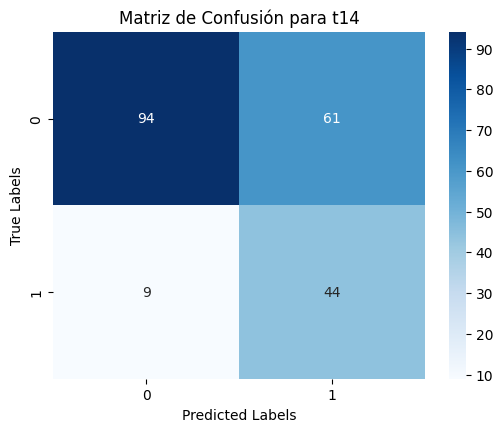

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred.toarray()[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

#### LabelPowerset

Finalmente, aplicamos la transformación `LabelPowerset` al modelo `ExtraTreesClassifier`, modificando de nuevo algunos de los parámetros optimizados previamente, y usando el parámetro `class_weight = 'balanced'` para manejar el desbalanceo de las clases.

In [ ]:
new_model_et = ExtraTreesClassifier(n_estimators= 12, min_samples_split= 10, min_samples_leaf= 1,
                                    max_depth= 3, criterion= 'gini', class_weight = 'balanced', random_state = semilla)

# Envolvemos ExtraTreesClassifier en LabelPowerset
lp_model = LabelPowerset(classifier=new_model_et, require_dense=[False, True])

# Entrenamos el modelo
lp_model.fit(X_train_array, Y_train_array)

LabelPowerset(classifier=ExtraTreesClassifier(class_weight='balanced',
                                              max_depth=3, min_samples_split=10,
                                              n_estimators=12,
                                              random_state=123),
              require_dense=[False, True])

In [ ]:
Y_train_pred = lp_model.predict(X_train_scaled)
Y_test_pred = lp_model.predict(X_test_scaled)

# Hamming Loss en conjunto de entrenamiento
print('Hamming Loss train: ', round(hamming_loss(Y_train, Y_train_pred),3))

# Hamming Loss en conjunto de prueba
print('Hamming Loss test: ', round(hamming_loss(Y_test, Y_test_pred),3))

Hamming Loss train:  0.394
Hamming Loss test:  0.42


En este caso no hay demasiado overfitting, como se puede observar con los valores que toma la Hamming Loss, muy similares en el conjunto de entrenamiento y en el de prueba. Sin embargo, estos valores son un poco peores de los que obteníamos sin usar `LabelPowerset`.

In [ ]:
# Evaluación en conjunto de entrenamiento
print("Score train:", lp_model.score(X_train_scaled, Y_train))

# Evaluación en conjunto de prueba
print("Score test:", lp_model.score(X_test_scaled, Y_test))

Score train: 0.11793020457280386
Score test: 0.0


In [ ]:
# Mean accuracy en conjunto de entrenamiento
print("Mean accuracy train:", mean_accuracy(Y_train_array, Y_train_pred.toarray()))

# Mean accuracy en conjunto de prueba
print("Mean accuracy test:", mean_accuracy(Y_test_array, Y_test_pred.toarray()))

Mean accuracy train: 0.6055526903902355
Mean accuracy test: 0.5800137362637362


In [ ]:
# Calcular F1-score en el conjunto de entrenamiento
f1_micro_train = f1_score(Y_train, Y_train_pred, average='micro')
f1_macro_train = f1_score(Y_train, Y_train_pred, average='macro')
f1_weighted_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_samples_train = f1_score(Y_train, Y_train_pred, average='samples')

# Calcular F1-score en el conjunto de prueba
f1_micro_test = f1_score(Y_test, Y_test_pred, average='micro')
f1_macro_test = f1_score(Y_test, Y_test_pred, average='macro')
f1_weighted_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_samples_test = f1_score(Y_test, Y_test_pred, average='samples')

# Imprimir los resultados para el conjunto de entrenamiento
print("Train set F1-scores:")
print(f"F1-score (micro): {f1_micro_train:.3f}")
print(f"F1-score (macro): {f1_macro_train:.3f}")
print(f"F1-score (weighted): {f1_weighted_train:.3f}")
print(f"F1-score (samples): {f1_samples_train:.3f}")

# Imprimir los resultados para el conjunto de prueba
print("\nTest set F1-scores:")
print(f"F1-score (micro): {f1_micro_test:.3f}")
print(f"F1-score (macro): {f1_macro_test:.3f}")
print(f"F1-score (weighted): {f1_weighted_test:.3f}")
print(f"F1-score (samples): {f1_samples_test:.3f}")

Train set F1-scores:
F1-score (micro): 0.546
F1-score (macro): 0.517
F1-score (weighted): 0.551
F1-score (samples): 0.520

Test set F1-scores:
F1-score (micro): 0.518
F1-score (macro): 0.481
F1-score (weighted): 0.524
F1-score (samples): 0.488


De nuevo, los valores de F1-score tanto del conjunto de entrenamiento como en el de prueba son peores que cuando no usábamos `LabelPowerset`.

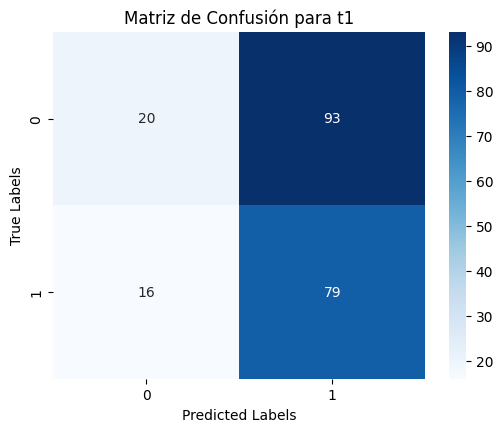

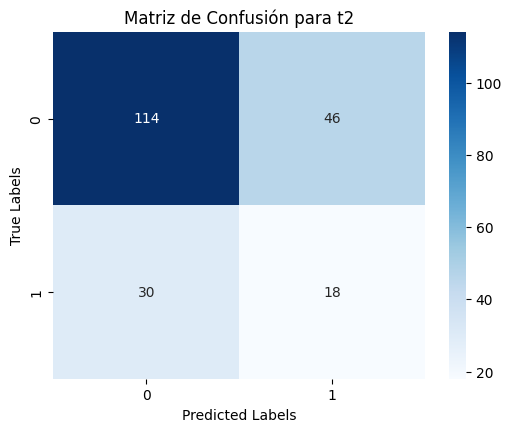

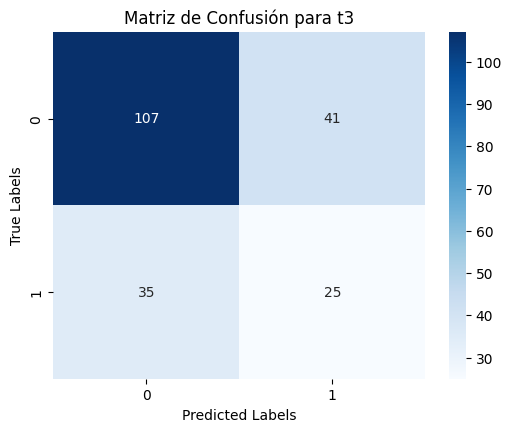

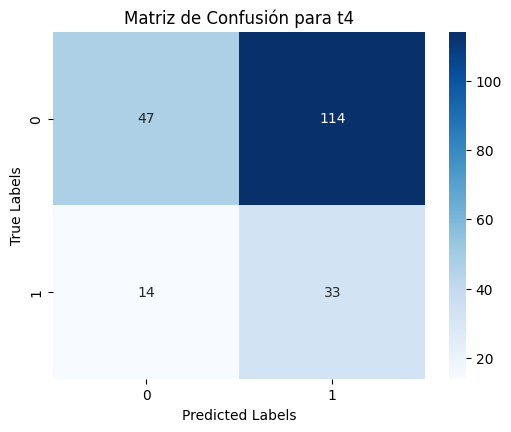

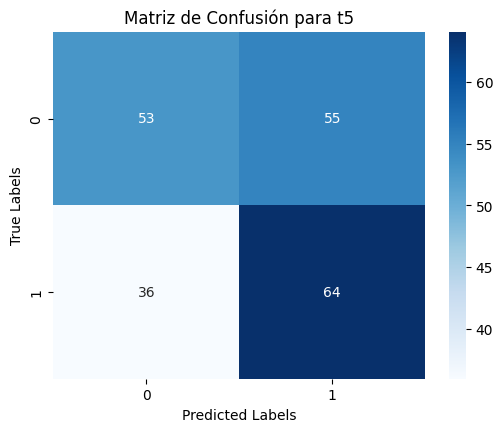

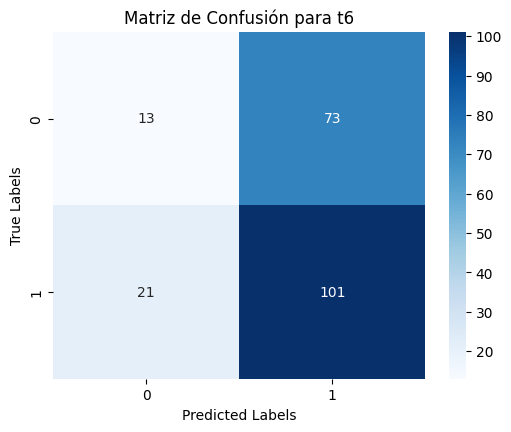

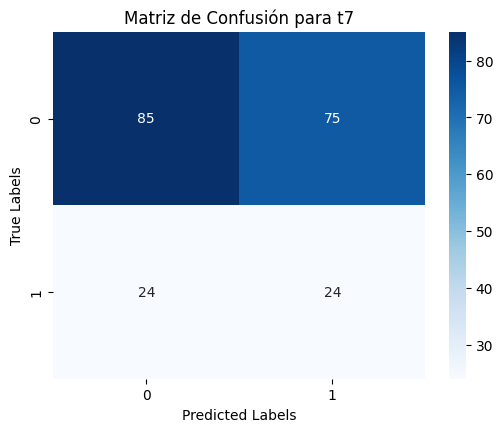

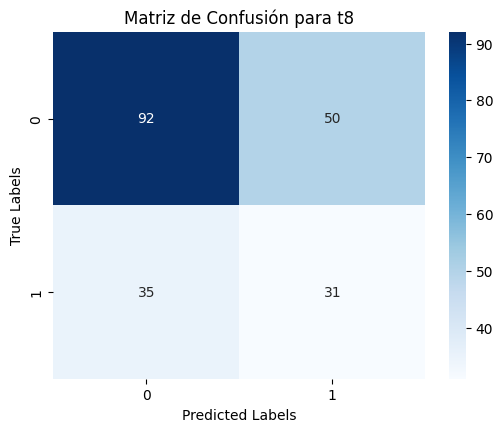

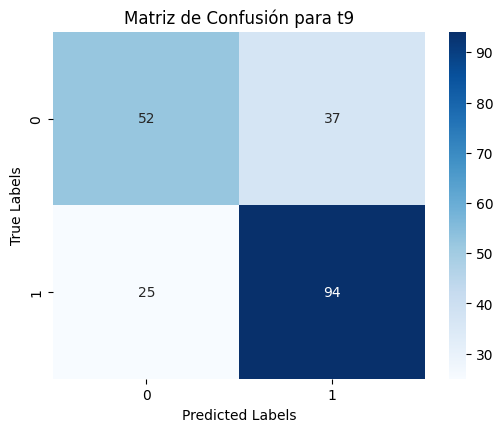

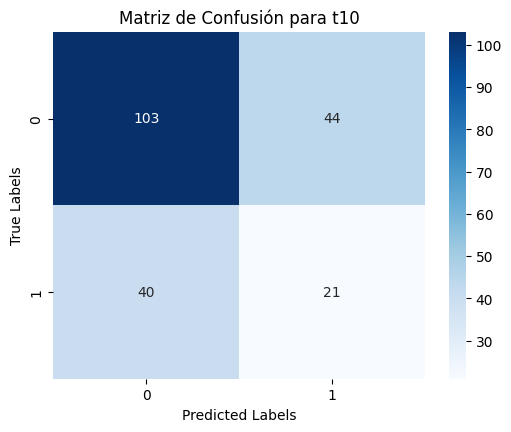

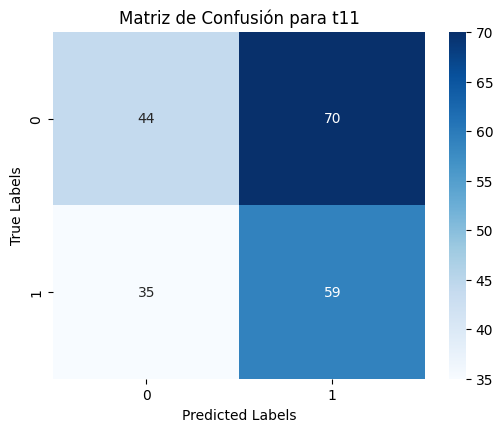

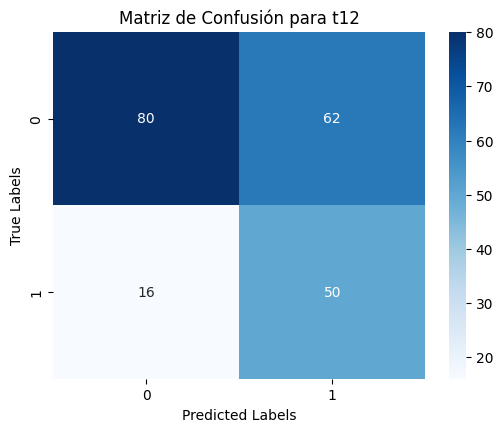

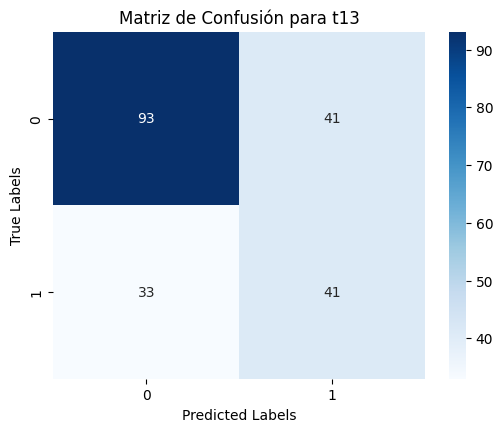

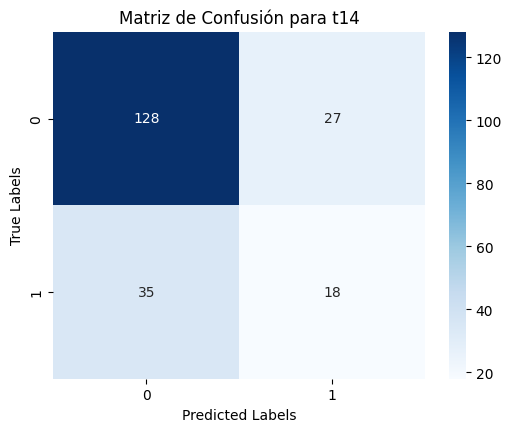

In [ ]:
Y_test_array = Y_test.to_numpy()  # Convierte el DataFrame en un array de Numpy

for i in range(0, 14):
    cm_yi = confusion_matrix(Y_test_array[:,i], Y_test_pred.toarray()[:,i])
    plt.figure(figsize=(6, 4.5))
    sns.heatmap(cm_yi, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Matriz de Confusión para t{i+1}')
    plt.show()

## Mejores modelos

En esta sección, se presentan los modelos con mejor desempeño obtenidos. La selección se basó en métricas clave, como Hamming Loss y F1-score (en sus variantes micro, macro, weighted y samples), evaluadas tanto en el conjunto de entrenamiento como en el de prueba. De esta forma, los modelos seleccionados, con mejor balance entre Hamming Loss y F1-score son:

- `ExtraTreesClassifier` (con el parámetro `class_weight = 'balanced'`)
- `BaggingClassifier` (con  el parámetro `class_weight = 'balanced'`)
- `ExtraTreesClassifier` (con  el parámetro `class_weight = 'balanced'`) con `BinaryRelevance`

Una vez identificados los mejores modelos, procedemos a validar su consistencia y capacidad de generalización mediante validación cruzada. Este enfoque permite evaluar el rendimiento de los modelos en diferentes particiones de los datos, asegurando que los resultados obtenidos no dependan de una división específica del conjunto de datos y garantizando la robustez de las soluciones propuestas. Como ya tenemos un conjunto de entrenamiento y otro de prueba separados, realizaremos la validación cruzada únicamente en los datos de entrenamiento.

#### ExtraTreesClassifier

In [ ]:
# Métricas personalizadas
scoring = {
    'hamming_loss': make_scorer(hamming_loss),
    'mean_accuracy': make_scorer(mean_accuracy),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'f1_samples': make_scorer(f1_score, average='samples')
}

# Validación cruzada
cv_results = cross_validate(
    best_model_et,
    X_train_scaled,
    Y_train,
    cv=5,  # Número de folds
    scoring=scoring,
    return_train_score=True
)

# Imprimir resultados
for metric in scoring.keys():
    print(f"{metric}:")
    print(f"  Train: {np.mean(cv_results[f'train_{metric}'])} ± {np.std(cv_results[f'train_{metric}'])}")
    print(f"  Test: {np.mean(cv_results[f'test_{metric}'])} ± {np.std(cv_results[f'test_{metric}'])}")

hamming_loss:
  Train: 0.3310134523054625 ± 0.006095560044080885
  Test: 0.38902882702752845 ± 0.004372889882153635
mean_accuracy:
  Train: 0.6689865476945375 ± 0.006095560044080885
  Test: 0.6109711729724717 ± 0.0043728898821536
f1_micro:
  Train: 0.6552556088317345 ± 0.005894726403616736
  Test: 0.5981189268072884 ± 0.0040989078408917275
f1_macro:
  Train: 0.6409158541361464 ± 0.004801635194828755
  Test: 0.5760303726244728 ± 0.002969307222674704
f1_weighted:
  Train: 0.6650770142605915 ± 0.0052118100262253065
  Test: 0.6098107785086438 ± 0.006830665798997067
f1_samples:
  Train: 0.6252044988850214 ± 0.00578032749290058
  Test: 0.5721135360837087 ± 0.006200440411217278


En general, `ExtraTreesClassifier` muestra un buen desempeño tanto en el conjunto de entrenamiento como en el de prueba. Las diferencias en las métricas entre ambos conjuntos son pequeñas, lo que sugiere que el modelo es relativamente robusto y no está sobreajustando a los datos de entrenamiento.

#### BaggingClassifier

In [ ]:
# Métricas personalizadas
scoring = {
    'hamming_loss': make_scorer(hamming_loss),
    'mean_accuracy': make_scorer(mean_accuracy),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'f1_samples': make_scorer(f1_score, average='samples')
}

# Validación cruzada
cv_results = cross_validate(
    best_model_bag,
    X_train_scaled,
    Y_train,
    cv=5,  # Número de folds
    scoring=scoring,
    return_train_score=True
)

# Imprimir resultados
for metric in scoring.keys():
    print(f"{metric}:")
    print(f"  Train: {np.mean(cv_results[f'train_{metric}'])} ± {np.std(cv_results[f'train_{metric}'])}")
    print(f"  Test: {np.mean(cv_results[f'test_{metric}'])} ± {np.std(cv_results[f'test_{metric}'])}")

hamming_loss:
  Train: 0.3059765377298668 ± 0.005189248924446474
  Test: 0.34063301967493587 ± 0.011258678777009428
mean_accuracy:
  Train: 0.6940234622701332 ± 0.0051892489244464955
  Test: 0.6593669803250641 ± 0.011258678777009458
f1_micro:
  Train: 0.6433937466517771 ± 0.0019050532024078393
  Test: 0.6016981411729974 ± 0.00786124535430242
f1_macro:
  Train: 0.6285738252251606 ± 0.0020364609724471063
  Test: 0.5836797294529774 ± 0.007849719358226485
f1_weighted:
  Train: 0.6520375603773728 ± 0.002073831424509272
  Test: 0.611731533417812 ± 0.0085275928453989
f1_samples:
  Train: 0.6148869785729356 ± 0.003079256470891163
  Test: 0.574149761418005 ± 0.008280774976607917


El `BaggingClassifier` tiene un rendimiento razonablemente bueno en términos de generalización. Parece ser robusto y no presentar un elevado sobreajuste, ya que la diferencia entre el rendimiento en los conjuntos de entrenamiento y prueba es pequeño. Sin embargo, el modelo sigue teniendo un Hamming Loss algo elevado, lo que indica que, en promedio, hay un número considerable de errores en la predicción de las etiquetas.

#### BinaryRelevance

Debido a incompatibilidades con la librería skmultilearn, en este caso no vamos a poder usar el mismo código que en los dos casos anteriores para realizar la validación cruzada. Por ello, hacemos la validación cruzada manualmente.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, hamming_loss
import numpy as np

# Crear el objeto KFold para validación cruzada (sin estratificación)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar listas para almacenar los resultados
hamming_losses_train = []
hamming_losses_test = []
f1_micro_train = []
f1_micro_test = []
f1_macro_train = []
f1_macro_test = []
f1_weighted_train = []
f1_weighted_test = []
f1_samples_train = []
f1_samples_test = []
mean_accuracy_train = []
mean_accuracy_test = []

# Realizar validación cruzada
for train_index, test_index in cv.split(X_train_scaled, Y_train):
    # Dividir los datos en conjunto de entrenamiento y prueba usando .iloc para acceder correctamente
    X_train_fold, X_test_fold = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    Y_train_fold, Y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Ajustar el modelo en el conjunto de entrenamiento
    br_model.fit(X_train_fold, Y_train_fold)

    # Predecir en los conjuntos de entrenamiento y prueba
    Y_train_pred = br_model.predict(X_train_fold)
    Y_test_pred = br_model.predict(X_test_fold)

    # Calcular Hamming Loss
    hamming_losses_train.append(hamming_loss(Y_train_fold, Y_train_pred))
    hamming_losses_test.append(hamming_loss(Y_test_fold, Y_test_pred))

    # Calcular Mean Accuracy
    mean_accuracy_train.append(mean_accuracy(Y_train_fold, Y_train_pred.toarray()))
    mean_accuracy_test.append(mean_accuracy(Y_test_fold, Y_test_pred.toarray()))

    # Calcular F1-score (micro, macro, weighted, samples) en entrenamiento
    f1_micro_train.append(f1_score(Y_train_fold, Y_train_pred, average='micro'))
    f1_macro_train.append(f1_score(Y_train_fold, Y_train_pred, average='macro'))
    f1_weighted_train.append(f1_score(Y_train_fold, Y_train_pred, average='weighted'))
    f1_samples_train.append(f1_score(Y_train_fold, Y_train_pred, average='samples'))

    # Calcular F1-score (micro, macro, weighted, samples) en prueba
    f1_micro_test.append(f1_score(Y_test_fold, Y_test_pred, average='micro'))
    f1_macro_test.append(f1_score(Y_test_fold, Y_test_pred, average='macro'))
    f1_weighted_test.append(f1_score(Y_test_fold, Y_test_pred, average='weighted'))
    f1_samples_test.append(f1_score(Y_test_fold, Y_test_pred, average='samples'))

# Imprimir los resultados promedio y desviación estándar de cada métrica
print("Hamming Loss train:", np.mean(hamming_losses_train), "±", np.std(hamming_losses_train))
print("Hamming Loss test:", np.mean(hamming_losses_test), "±", np.std(hamming_losses_test), "\n")

print("Mean accuracy train:", np.mean(mean_accuracy_train), "±", np.std(mean_accuracy_train))
print("Mean accuracy test:", np.mean(mean_accuracy_test), "±", np.std(mean_accuracy_test), "\n")

print("F1 Micro train:", np.mean(f1_micro_train), "±", np.std(f1_micro_train))
print("F1 Micro test:", np.mean(f1_micro_test), "±", np.std(f1_micro_test), "\n")

print("F1 Macro train:", np.mean(f1_macro_train), "±", np.std(f1_macro_train))
print("F1 Macro test:", np.mean(f1_macro_test), "±", np.std(f1_macro_test), "\n")

print("F1 Weighted train:", np.mean(f1_weighted_train), "±", np.std(f1_weighted_train))
print("F1 Weighted test:", np.mean(f1_weighted_test), "±", np.std(f1_weighted_test), "\n")

print("F1 Samples train:", np.mean(f1_samples_train), "±", np.std(f1_samples_train))
print("F1 Samples test:", np.mean(f1_samples_test), "±", np.std(f1_samples_test))

Hamming Loss train: 0.29835055582156766 ± 0.002938915666572023
Hamming Loss test: 0.34253506755851465 ± 0.007466334980337149 

Mean accuracy train: 0.7016494441784322 ± 0.002938915666572042
Mean accuracy test: 0.6574649324414853 ± 0.0074663349803371516 

F1 Micro train: 0.6514480717384066 ± 0.0017896925766038982
F1 Micro test: 0.6004706682358251 ± 0.014421526525866387 

F1 Macro train: 0.6359613782167708 ± 0.002299286533244869
F1 Macro test: 0.5815886995301522 ± 0.016230794631924134 

F1 Weighted train: 0.6578619959375943 ± 0.0014920675442002531
F1 Weighted test: 0.6084226803672981 ± 0.01409591694108554 

F1 Samples train: 0.6173358659499509 ± 0.004647642391304291
F1 Samples test: 0.5643963539735779 ± 0.018050365565510425


En general, el modelo muestra un buen desempeño en el conjunto de entrenamiento, y no se muestra una gran diferencia entre las métricas en el conjunto de entrenamiento y el de prueba, lo cual indica que no hay una gran overfitting.

### Conclusión Final

Para comparar los tres modelos seleccionados, analicemos las métricas y veamos el desempeño de cada uno:

1. Hamming Loss: `BinaryRelevance` tiene el menor Hamming Loss en el conjunto de prueba, y por tanto el mejor.
2. Mean Accuracy: `BinaryRelevance` tiene el mayor Mean Accuracy en el conjunto de prueba, y por tanto el mejor.
3. F1 Micro: `BinaryRelevance` tiene el mayor F1 Micro en el conjunto de prueba, y por tanto el mejor.
4. F1 Macro: `BinaryRelevance` y `BaggingClassifier` tienen resultados similares en el conjunto de prueba.
5. F1 Weighted: `ExtraTreesClassifier` tiene un valor de F1 Weighted ligeramente superior en el conjunto de prueba.
6. F1 Samples: `ExtraTreesClassifier` tiene un valor de F1 Samples ligeramente superior en el conjunto de prueba.

`BinaryRelevance` es el mejor modelo, especialmente por su rendimiento en Hamming Loss, Mean Accuracy y F1 Micro en el conjunto de prueba. Estos resultados indican que tiene un balance sólido entre precisión y capacidad de generalización. Aunque los otros modelos tienen un rendimiento competitivo en algunas métricas, `BinaryRelevance` sobresale en las más importantes para este tipo de problema.

## Pregunta

¿Es posible trabajar con datasets multi-etiqueta, con técnicas que no trabajan con multi-etiqueta?

Sí, es posible, pero es necesario aplicar transformaciones al dataset o al enfoque del modelo. Por ejemplo, algunas de las transformaciones que hemos visto en esta práctica que permiten trabajar con técnicas que no permiten multi-etiqueta son Binary Relevance, Classifier Chain y Label Powerset. Estas técnicas de transformación convierten los problemas multietiqueta en problemas de etiqueta única: clase binaria o multiclase.